In [68]:
import requests
from bs4 import BeautifulSoup
import time
from langdetect import detect
import csv

# I. Data Collection 

## 1.1 Crawl data from http://quotes.toscrape.com/ and save to kq.txt

In [69]:
def scrape_one_page(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  quotes = soup.find_all('div', class_='quote')
  return quotes

def craw_data(base_url, output_file_name):
  page_number = 1
  all_quotes = []
  while True:
    url = f"{base_url}/page/{page_number}/"
    quotes = scrape_one_page(url)
    if len(quotes) == 0:
      break
    all_quotes.extend(quotes)
    page_number += 1
  with open(output_file_name, 'w') as f:
    for quote in all_quotes:
      f.write(str(quote) + '\n')
  print('done')

craw_data('https://quotes.toscrape.com', 'kq.txt')

done


### 1.2.a Read all the html tags (div) with the class "quote" and save it in the variable "result", display the value of the variable "result" on the screen?

In [70]:
with open('kq.txt', 'r', encoding='utf-8') as f:
  html_data = f.read()

soup = BeautifulSoup(html_data, 'html.parser')
result = soup.find_all('div', class_='quote')
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

### 1.2.b Find in the variable 'result', the data containing the label "small" with the class "author" and print the results on the screen

In [71]:
def extract_author_info(quotes):
    authors = []
    for quote in quotes:
        author = quote.find('small', class_='author')
        if author:
            authors.append(author.get_text(strip=True))
    return authors

authors = extract_author_info(result)
for author in authors:
    print(author)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin
Marilyn Monroe
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
Douglas Adams
Elie Wiesel
Friedrich Nietzsche
Mark Twain
Allen Saunders
Pablo Neruda
Ralph Waldo Emerson
Mother Teresa
Garrison Keillor
Jim Henson
Dr. Seuss
Albert Einstein
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
J.K. Rowling
Bob Marley
Mother Teresa
J.K. Rowling
Charles M. Schulz
William Nicholson
Albert Einstein
Jorge Luis Borges
George Eliot
George R.R. Martin
C.S. Lewis
Marilyn Monroe
Marilyn Monroe
Albert Einstein
Marilyn Monroe
Marilyn Monroe
Martin Luther King Jr.
J.K. Rowling
James Baldwin
Jane Austen
Eleanor Roosevelt
Marilyn Monroe
Albert Einstein
Haruki Murakami
Alexandre Dumas fils
Stephenie Meyer
Ernest Hemingway
Helen Keller
George Bernard Shaw
Charles Bukowski
Suzanne Collins
Suzanne Collins
C.S. Lewis
J.R.R. Tolkien
J.K. Rowling
Ernest Hemingway
Ralph 

### 1.2.c Write the function authorLink() to get the content of each author.

In [72]:
def authorLink(quotes):
  author_dictionary = {}
  for quote in quotes:
    text = quote.find('span', class_='text').get_text()
    text = text.strip("“”\"") 
    author = quote.find('small', class_='author').get_text()
    if author not in author_dictionary:
      author_dictionary[author] = {}
      author_link = f"https://quotes.toscrape.com{quote.find('a')['href']}"
      get_author_infor = requests.get(author_link)
      author_soup = BeautifulSoup(get_author_infor.text, 'html.parser')
      dob = author_soup.find('span', class_='author-born-date').get_text()
      author_dictionary[author]['dob'] = dob
      author_dictionary[author]['link'] = author_link
      author_dictionary[author]['quotes'] = []

    author_dictionary[author]['quotes'].append(text)
  return author_dictionary

author_dictionary = authorLink(result)

In [73]:
for author, infor in author_dictionary.items():
  print(f"Author: {author}")
  print(f"Date of Birth: {infor['dob']}")
  print(f"Link: {infor['link']}")
  print("Quotes:")
  for quote in infor['quotes']:
    print(f"- {quote}")
  print()

Author: Albert Einstein
Date of Birth: March 14, 1879
Link: https://quotes.toscrape.com/author/Albert-Einstein
Quotes:
- The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
- There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
- Try not to become a man of success. Rather become a man of value.
- If you can't explain it to a six year old, you don't understand it yourself.
- If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.
- Logic will get you from A to Z; imagination will get you everywhere.
- Any fool can know. The point is to understand.
- Life is like riding a bicycle. To keep your balance, you must keep moving.
- If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.
- 

### 1.2.d Save the result in question c into the corresponding Quote.csv file

In [74]:
import csv

def save_to_csv(author_dictionary, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Author Name', 'Date of Birth', 'Author Link', 'Famous Quotes'])
        for author, info in author_dictionary.items():
            quotes = ', '.join([f"'{quote}'" for quote in info['quotes']])
            writer.writerow([author, info['dob'], info['link'], quotes])

save_to_csv(author_dictionary, 'Quote.csv')

In [75]:
import pandas as pd
df = pd.read_csv('Quote.csv')
df.head()

,Author Name,Date of Birth,Author Link,Famous Quotes
0,Albert Einstein,"March 14, 1879",https://quotes.toscrape.com/author/Albert-Eins...,'The world as we have created it is a process ...
1,J.K. Rowling,"July 31, 1965",https://quotes.toscrape.com/author/J-K-Rowling,"'It is our choices, Harry, that show what we t..."
2,Jane Austen,"December 16, 1775",https://quotes.toscrape.com/author/Jane-Austen,"'The person, be it gentleman or lady, who has ..."
3,Marilyn Monroe,"June 01, 1926",https://quotes.toscrape.com/author/Marilyn-Monroe,"'Imperfection is beauty, madness is genius and..."
4,André Gide,"November 22, 1869",https://quotes.toscrape.com/author/Andre-Gide,'It is better to be hated for what you are tha...


# II. Data Mining

### 2.1.a  Some values of the Date of Birth field are not available, please suggest how to fill them in? 

In [81]:
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime

def extract_date(text):
    date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2})')
    match = date_pattern.search(text)
    if match:
        return match.group(0)
    return None

def get_wikipedia_info(author_name):
  url = f"https://en.wikipedia.org/wiki/{author_name}"
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  #find born date and death date if any
  infobox = soup.find('table', class_='infobox')
  if infobox:
    born_th = infobox.find('th', string='Born')
    if born_th:
        born_date = born_th.find_next_sibling('td').get_text(strip=True)
        born_date = extract_date(born_date)
    else:
        born_date = None

    # Find the death date, if available
    death_th = infobox.find('th', string='Died')
    if death_th:
        death_date = death_th.find_next_sibling('td').get_text(strip=True)
        death_date = extract_date(death_date)
    else:
        death_date = None
    return born_date, death_date
  return None, None

In [85]:
for author, infor in author_dictionary.items():
  born_date, death_date = get_wikipedia_info(author)
  dob = infor['dob']
  dob_date = datetime.strptime(dob, '%B %d, %Y')
  if not death_date:
    today = datetime.now()
    age = today.year - dob_date.year - ((today.month, today.day) < (dob_date.month, dob_date.day))
  else:
    death_date = datetime.strptime(death_date, '%Y-%m-%d')
    dob_date = datetime.strptime(dob, '%B %d, %Y')
    age = death_date.year - dob_date.year - ((death_date.month, death_date.day) < (dob_date.month, dob_date.day))

  author_dictionary[author]['age'] = int(age)
  df.loc[df['Author Name'] == author, 'age'] = int(age)

In [87]:
df.head()

,Author Name,Date of Birth,Author Link,Famous Quotes,age
0,Albert Einstein,"March 14, 1879",https://quotes.toscrape.com/author/Albert-Eins...,'The world as we have created it is a process ...,76.0
1,J.K. Rowling,"July 31, 1965",https://quotes.toscrape.com/author/J-K-Rowling,"'It is our choices, Harry, that show what we t...",59.0
2,Jane Austen,"December 16, 1775",https://quotes.toscrape.com/author/Jane-Austen,"'The person, be it gentleman or lady, who has ...",41.0
3,Marilyn Monroe,"June 01, 1926",https://quotes.toscrape.com/author/Marilyn-Monroe,"'Imperfection is beauty, madness is genius and...",36.0
4,André Gide,"November 22, 1869",https://quotes.toscrape.com/author/Andre-Gide,'It is better to be hated for what you are tha...,81.0


### 2.1.b  Please add the Age field and suggest how to fill in the age of the authors? 

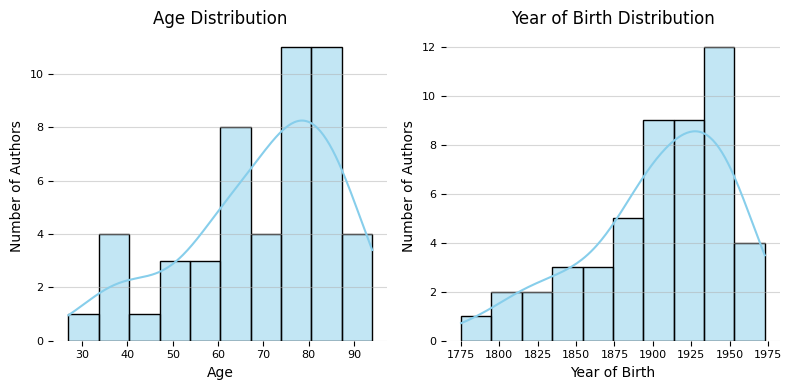

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(attrs, x, y="Authors"):
  num_plots = len(attrs)
  fig, axes = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4))

  for i, (attr, title) in enumerate(zip(attrs, x)):
    ax = axes[i] if num_plots > 1 else axes
    sns.histplot(attr, bins=10, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'{title} Distribution', fontsize=12)
    ax.set_xlabel(f'{title}', fontsize=10)
    ax.set_ylabel(f'Number of {y}', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(axis='y', alpha=0.5)
    sns.despine(ax=ax, left=True, bottom=True)

  plt.tight_layout()
  plt.show()

ages = [infor['age'] for infor in author_dictionary.values()]
yob = [int(infor['dob'][-4:]) for infor in author_dictionary.values()]
plot_distributions([ages, yob], ['Age', 'Year of Birth'])

## 2.2. Data Exploration

### Since the number of quotes crawled from *Quotes to Scrape* is limited, I will enrich the dataset by crawling additional data from *Goodreads.com* for more comprehensive data exploration and future data mining.

In [54]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
NUM_QUOTES_PER_AUTHOR = 1000

def get_quotes(author_name):
    base_url = "https://www.goodreads.com/quotes/search"
    quotes = set()
    page = 1
    formatted_author = author_name.replace(" ", "+")
    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    while len(quotes) < NUM_QUOTES_PER_AUTHOR:
        url = f"{base_url}?q={formatted_author}&page={page}"
        response = requests.get(url, headers=headers)
        
        if response.status_code != 200:
            print(f"Crawling author {author} but unable to access page: {url}")
            break
        
        soup = BeautifulSoup(response.content, 'html.parser')

        quote_divs = soup.find_all('div', class_='quoteDetails')
        if not quote_divs:
            print(f"Crawling author {author} reached the end of available pages or no quotes found.")
            break

        for div in quote_divs:
            author_span = div.find('span', class_='authorOrTitle')
            if author_span and author_name in author_span.get_text(strip=True):
                quote_text_div = div.find('div', class_='quoteText')
                if quote_text_div:
                    for br in quote_text_div.find_all('br'):
                        br.extract()
                    quote_text = quote_text_div.get_text(strip=True).split("―")[0]
                    quote_text = quote_text.strip("“”\"") 
                    try:
                        if detect(quote_text) == 'en':
                            quotes.add(quote_text)
                    except:
                        continue
                    
                    if len(quotes) >= NUM_QUOTES_PER_AUTHOR:
                        return list(quotes)
        
        if len(quote_divs) == 0:
            print("No more quotes found, stopping.")
            break
        
        page += 1
        time.sleep(0.0005)

    return list(quotes)

In [ ]:
author_quote = defaultdict()
for author in author_dictionary.keys():
    author_quote[author] = get_quotes(author)
    print(f"Done {author}, num quotes = {len(author_quote[author])}")

def save_quotes_to_json(author_quote, filename="quotes.json"):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(author_quote, f, ensure_ascii=False, indent=4)
    print(f"Quotes have been saved to {filename}")

In [90]:
with open('quotes.json', 'r', encoding='utf-8') as f:
    quotes_data = json.load(f)
for author, data in quotes_data.items():
    if author in author_dictionary:
        author_dictionary[author]['quotes'] = data

### Statistics about the authors and famous quotes in the dataset

In [43]:
print(f"Number of authors: {len(author_dictionary)}")

Number of authors: 50


In [44]:
print(f"Total number of quotes: {sum(len(infor['quotes']) for infor in author_dictionary.values())}")

Total number of quotes: 31323


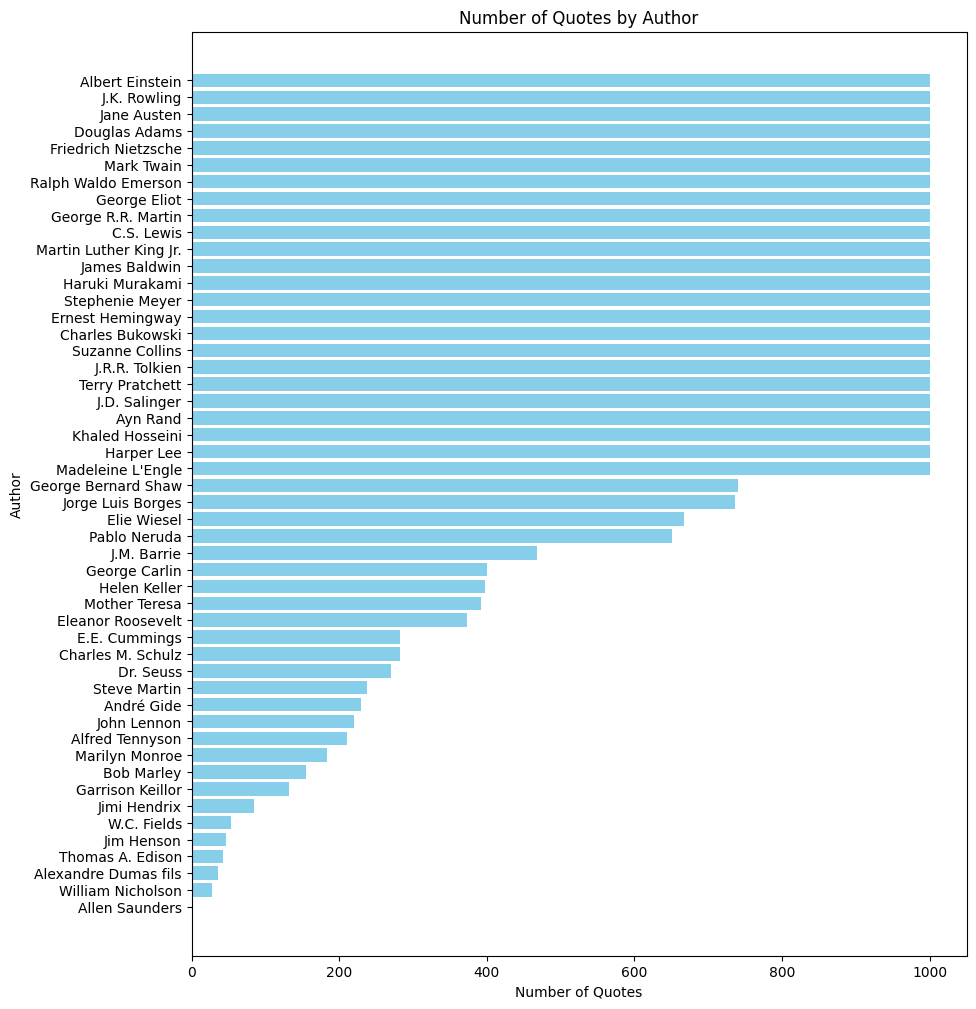

In [92]:
sorted_author_dictionary = dict(sorted(author_dictionary.items(), key=lambda x: len(x[1]['quotes']), reverse=True))
authors = list(sorted_author_dictionary.keys())
num_quotes = [len(info['quotes']) for info in sorted_author_dictionary.values()]

plt.figure(figsize=(10, 12))
plt.barh(authors, num_quotes, color='skyblue')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.title('Number of Quotes by Author')
plt.gca().invert_yaxis()
plt.savefig("m.png")
plt.show()

### Statistics about the year of birth and age of the authors

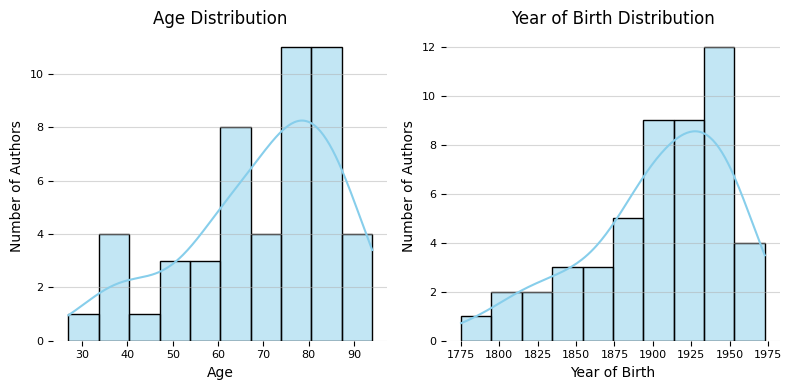

In [97]:
def plot_distributions(attrs, x, y="Authors"):
  num_plots = len(attrs)
  fig, axes = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4))

  for i, (attr, title) in enumerate(zip(attrs, x)):
    ax = axes[i] if num_plots > 1 else axes
    sns.histplot(attr, bins=10, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'{title} Distribution', fontsize=12)
    ax.set_xlabel(f'{title}', fontsize=10)
    ax.set_ylabel(f'Number of {y}', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(axis='y', alpha=0.5)
    sns.despine(ax=ax, left=True, bottom=True)

  plt.tight_layout()
  plt.show()

ages = [infor['age'] for infor in author_dictionary.values()]
yob = [int(infor['dob'][-4:]) for infor in author_dictionary.values()]
plot_distributions([ages, yob], ['Age', 'Year of Birth'])

### Statistics about famous quotes such as: longest, shortest, number of words, ...

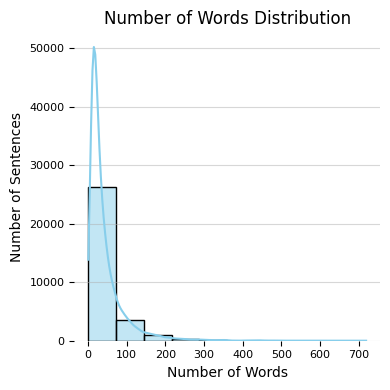

In [93]:
num_words_per_quote = []
all_quotes = ''
for author, info in author_dictionary.items():
    for quote in info['quotes']:
        num_words_per_quote.append(len(quote.split()))
        all_quotes += quote + ' '

plot_distributions([num_words_per_quote], ['Number of Words'], y="Sentences")

In [94]:
print(f"Longest sentence's length: {max(num_words_per_quote)}")
print(f"Shortest sentence's length: {min(num_words_per_quote)}")

Longest sentence's length: 719
Shortest sentence's length: 1


### Statistics about the words used in the quotes

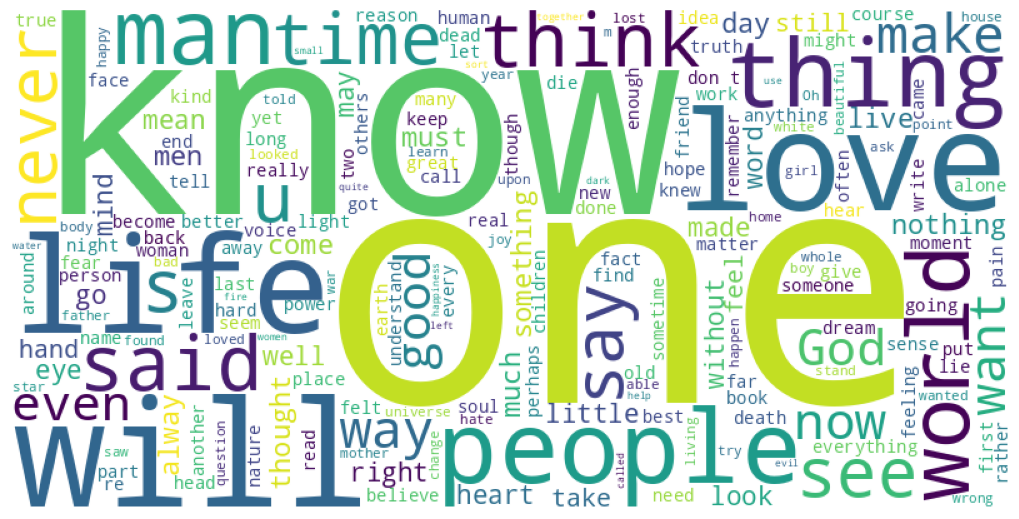

In [96]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_quotes)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

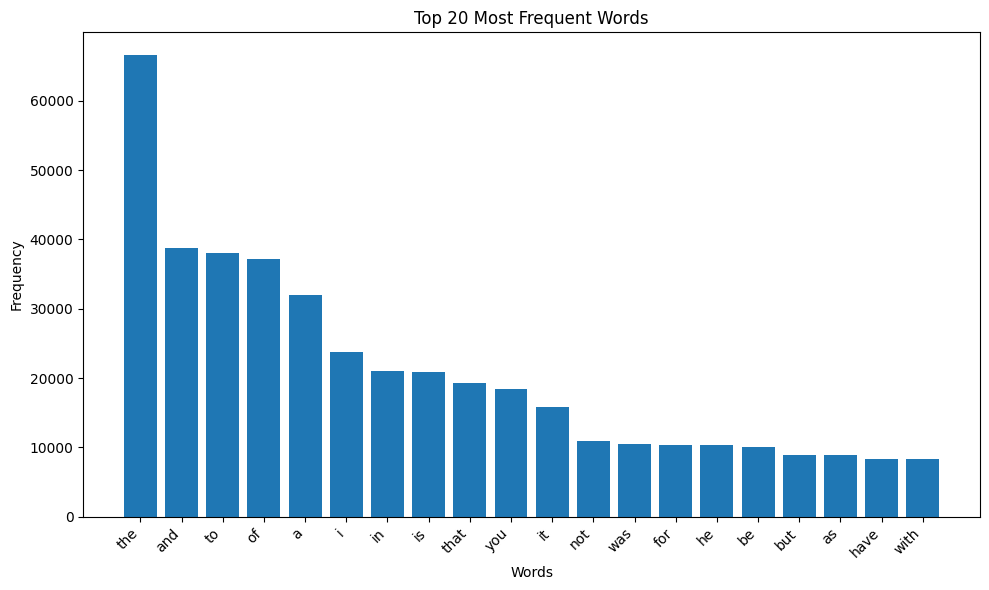

In [98]:
from collections import Counter

def plot_most_frequent_words(text, num_words=10):
    words = text.lower().split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num_words)

    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top {num_words} Most Frequent Words")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_most_frequent_words(all_quotes, 20)

### Analyze, visualize the relationship between the authors and famous quotes

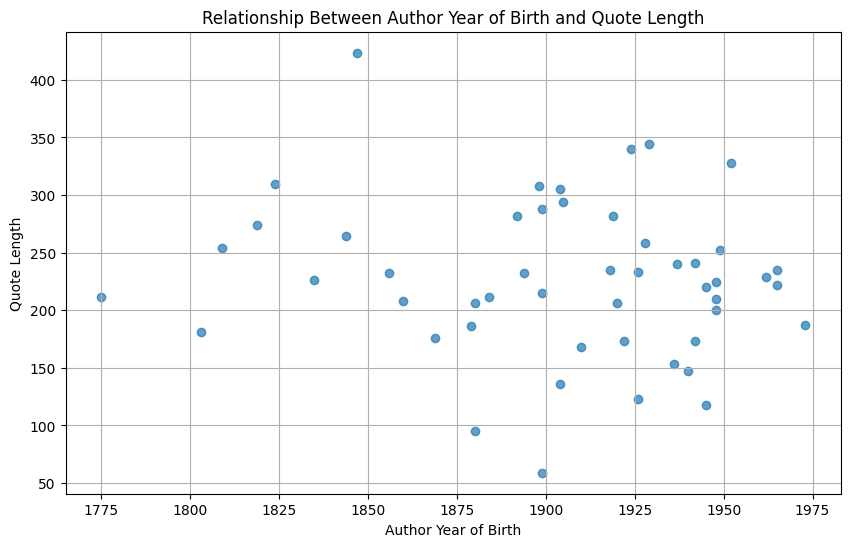

In [99]:
author_yob = []
quote_lengths = []

for author, info in author_dictionary.items():
    yob = int(info['dob'][-4:])
    author_yob.append(yob)
    avg_length = sum(len(quote) for quote in info['quotes']) / len(info['quotes'])
    quote_lengths.append(avg_length)

plt.figure(figsize=(10, 6))
plt.scatter(author_yob, quote_lengths, alpha=0.7)
plt.xlabel("Author Year of Birth")
plt.ylabel("Quote Length")
plt.title("Relationship Between Author Year of Birth and Quote Length")
plt.grid(True)
plt.show()

### Analyze, visualize the relationship between the authors with each other

##  2.3 Feature Extraction: Suggest a way to extract features from the given dataset, provide reasons and explain your approach. 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertModel, BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### First way: TF-IDF

In [28]:
def read_quotes_from_json(filename="quotes.json"):
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
    quotes = []
    authors = []
    
    for author, author_quotes in data.items():
        quotes.extend(author_quotes)
        authors.extend([author] * len(author_quotes))
    
    return quotes, authors

quotes, authors = read_quotes_from_json()
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(quotes)

In [22]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

def get_bert_embeddings_batch(texts, batch_size=4):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)
        all_embeddings.append(embeddings.numpy())
    return np.vstack(all_embeddings)

X_bert = get_bert_embeddings_batch(quotes, batch_size=4)

In [29]:
# Label Encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(authors)

# Train/Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, labels_encoded, test_size=0.2, random_state=42)
X_train_bert, X_test_bert = train_test_split(X_bert, test_size=0.2, random_state=42)

# SVM
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train)

svm_bert = SVC(kernel='linear')
svm_bert.fit(X_train_bert, y_train)

y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
print("SVM Model Evaluation (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

y_pred_bert = svm_bert.predict(X_test_bert)
print("SVM Model Evaluation (BERT):")
print(classification_report(y_test, y_pred_bert))


SVM Model Evaluation (TF-IDF):
              precision    recall  f1-score   support

           0       0.34      0.60      0.43       178
           1       0.00      0.00      0.00        10
           2       0.43      0.09      0.15        34
           4       0.60      0.06      0.11        48
           5       0.48      0.54      0.51       174
           6       0.70      0.21      0.33        33
           7       0.49      0.46      0.48       216
           8       0.28      0.51      0.36       197
           9       0.87      0.23      0.37        56
          10       0.57      0.56      0.57       202
          11       0.72      0.31      0.43        58
          12       0.74      0.24      0.36        59
          13       0.63      0.40      0.49        80
          14       0.69      0.53      0.60       129
          15       0.37      0.48      0.42       195
          16       0.41      0.54      0.47       200
          17       1.00      0.13      0.23       

/opt/anaconda3/envs/abc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/abc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/abc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Model Evaluation (BERT):
              precision    recall  f1-score   support

           0       0.40      0.54      0.46       178
           1       0.00      0.00      0.00        10
           2       0.35      0.53      0.42        34
           4       0.26      0.25      0.25        48
           5       0.46      0.55      0.50       174
           6       0.28      0.33      0.30        33
           7       0.39      0.40      0.40       216
           8       0.41      0.52      0.46       197
           9       0.35      0.43      0.38        56
          10       0.53      0.59      0.56       202
          11       0.44      0.47      0.45        58
          12       0.46      0.44      0.45        59
          13       0.38      0.41      0.40        80
          14       0.60      0.54      0.57       129
          15       0.43      0.43      0.43       195
          16       0.39      0.47      0.42       200
          17       0.08      0.09      0.08        2

In [30]:
print(accuracy_score(y_test, y_pred_tfidf))

0.5023144453312051


### Second way: BERT

In [31]:
print(accuracy_score(y_test, y_pred_bert))

0.48954509177972866


In [48]:
quotes, authors = read_quotes_from_json()
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(authors)
quotes_train, quotes_test, labels_train, labels_test = train_test_split(
    quotes, labels, test_size=0.2, random_state=42
)

train_dataset = Dataset.from_dict({'text': quotes_train, 'label': labels_train})
test_dataset = Dataset.from_dict({'text': quotes_test, 'label': labels_test})

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(labels)))

def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=1) 
    accuracy = accuracy_score(labels, preds)  
    return {'eval_accuracy': accuracy}

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch", 
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    greater_is_better=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

Map: 100%|██████████| 6265/6265 [00:02<00:00, 2777.95 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/abc/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_1625910/7800192.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
  0%|          | 12/9399 [00:00<08:21, 18.73it/s]

{'loss': 3.9144, 'grad_norm': 10.67206859588623, 'learning_rate': 4.994680285136717e-05, 'epoch': 0.0}


  0%|          | 22/9399 [00:01<08:21, 18.68it/s]

{'loss': 3.9221, 'grad_norm': 7.911452770233154, 'learning_rate': 4.989360570273434e-05, 'epoch': 0.01}


  0%|          | 32/9399 [00:01<08:22, 18.65it/s]

{'loss': 3.8604, 'grad_norm': 7.58345365524292, 'learning_rate': 4.9840408554101503e-05, 'epoch': 0.01}


  0%|          | 42/9399 [00:02<08:20, 18.71it/s]

{'loss': 3.7606, 'grad_norm': 7.514730453491211, 'learning_rate': 4.978721140546867e-05, 'epoch': 0.01}


  1%|          | 52/9399 [00:02<08:19, 18.70it/s]

{'loss': 3.7912, 'grad_norm': 16.017770767211914, 'learning_rate': 4.973401425683584e-05, 'epoch': 0.02}


  1%|          | 62/9399 [00:03<08:18, 18.72it/s]

{'loss': 3.7814, 'grad_norm': 7.995382308959961, 'learning_rate': 4.9680817108203004e-05, 'epoch': 0.02}


  1%|          | 72/9399 [00:03<08:21, 18.60it/s]

{'loss': 3.7493, 'grad_norm': 8.150466918945312, 'learning_rate': 4.962761995957017e-05, 'epoch': 0.02}


  1%|          | 82/9399 [00:04<08:19, 18.67it/s]

{'loss': 3.6894, 'grad_norm': 7.2938714027404785, 'learning_rate': 4.957442281093734e-05, 'epoch': 0.03}


  1%|          | 92/9399 [00:04<08:20, 18.61it/s]

{'loss': 3.6939, 'grad_norm': 7.699089050292969, 'learning_rate': 4.9521225662304505e-05, 'epoch': 0.03}


  1%|          | 102/9399 [00:05<08:20, 18.57it/s]

{'loss': 3.7004, 'grad_norm': 7.402875900268555, 'learning_rate': 4.946802851367167e-05, 'epoch': 0.03}


  1%|          | 112/9399 [00:06<08:22, 18.47it/s]

{'loss': 3.5527, 'grad_norm': 11.453058242797852, 'learning_rate': 4.941483136503884e-05, 'epoch': 0.04}


  1%|▏         | 122/9399 [00:06<08:24, 18.39it/s]

{'loss': 3.607, 'grad_norm': 7.919685363769531, 'learning_rate': 4.9361634216406006e-05, 'epoch': 0.04}


  1%|▏         | 132/9399 [00:07<08:24, 18.36it/s]

{'loss': 3.5782, 'grad_norm': 9.960099220275879, 'learning_rate': 4.930843706777317e-05, 'epoch': 0.04}


  2%|▏         | 142/9399 [00:07<08:20, 18.49it/s]

{'loss': 3.6227, 'grad_norm': 8.31334114074707, 'learning_rate': 4.9255239919140336e-05, 'epoch': 0.04}


  2%|▏         | 152/9399 [00:08<08:18, 18.53it/s]

{'loss': 3.5157, 'grad_norm': 7.614841461181641, 'learning_rate': 4.92020427705075e-05, 'epoch': 0.05}


  2%|▏         | 162/9399 [00:08<08:21, 18.43it/s]

{'loss': 3.3589, 'grad_norm': 7.92185115814209, 'learning_rate': 4.9148845621874665e-05, 'epoch': 0.05}


  2%|▏         | 172/9399 [00:09<08:17, 18.56it/s]

{'loss': 3.5872, 'grad_norm': 7.9038238525390625, 'learning_rate': 4.909564847324184e-05, 'epoch': 0.05}


  2%|▏         | 182/9399 [00:09<08:15, 18.59it/s]

{'loss': 3.6613, 'grad_norm': 9.245018005371094, 'learning_rate': 4.9042451324609e-05, 'epoch': 0.06}


  2%|▏         | 192/9399 [00:10<08:15, 18.58it/s]

{'loss': 3.4514, 'grad_norm': 8.30124282836914, 'learning_rate': 4.8989254175976166e-05, 'epoch': 0.06}


  2%|▏         | 202/9399 [00:10<08:17, 18.47it/s]

{'loss': 3.4195, 'grad_norm': 10.697626113891602, 'learning_rate': 4.893605702734334e-05, 'epoch': 0.06}


  2%|▏         | 212/9399 [00:11<08:17, 18.48it/s]

{'loss': 3.4041, 'grad_norm': 14.88266658782959, 'learning_rate': 4.88828598787105e-05, 'epoch': 0.07}


  2%|▏         | 222/9399 [00:11<08:16, 18.47it/s]

{'loss': 3.4563, 'grad_norm': 9.913772583007812, 'learning_rate': 4.882966273007767e-05, 'epoch': 0.07}


  2%|▏         | 232/9399 [00:12<08:17, 18.43it/s]

{'loss': 3.408, 'grad_norm': 10.268126487731934, 'learning_rate': 4.877646558144484e-05, 'epoch': 0.07}


  3%|▎         | 242/9399 [00:13<08:13, 18.55it/s]

{'loss': 3.276, 'grad_norm': 10.401667594909668, 'learning_rate': 4.8723268432812004e-05, 'epoch': 0.08}


  3%|▎         | 252/9399 [00:13<08:15, 18.46it/s]

{'loss': 3.2141, 'grad_norm': 8.374961853027344, 'learning_rate': 4.867007128417917e-05, 'epoch': 0.08}


  3%|▎         | 262/9399 [00:14<08:16, 18.41it/s]

{'loss': 3.3131, 'grad_norm': 8.978283882141113, 'learning_rate': 4.861687413554633e-05, 'epoch': 0.08}


  3%|▎         | 272/9399 [00:14<08:13, 18.50it/s]

{'loss': 3.2306, 'grad_norm': 9.414264678955078, 'learning_rate': 4.8563676986913505e-05, 'epoch': 0.09}


  3%|▎         | 282/9399 [00:15<08:14, 18.45it/s]

{'loss': 3.2378, 'grad_norm': 7.875213623046875, 'learning_rate': 4.851047983828067e-05, 'epoch': 0.09}


  3%|▎         | 292/9399 [00:15<08:15, 18.39it/s]

{'loss': 3.1851, 'grad_norm': 12.069948196411133, 'learning_rate': 4.8457282689647834e-05, 'epoch': 0.09}


  3%|▎         | 302/9399 [00:16<08:15, 18.35it/s]

{'loss': 3.196, 'grad_norm': 9.557455062866211, 'learning_rate': 4.8404085541015006e-05, 'epoch': 0.1}


  3%|▎         | 312/9399 [00:16<08:15, 18.33it/s]

{'loss': 3.2894, 'grad_norm': 9.267871856689453, 'learning_rate': 4.835088839238217e-05, 'epoch': 0.1}


  3%|▎         | 322/9399 [00:17<08:10, 18.49it/s]

{'loss': 3.1233, 'grad_norm': 10.062121391296387, 'learning_rate': 4.8297691243749335e-05, 'epoch': 0.1}


  4%|▎         | 332/9399 [00:17<08:11, 18.45it/s]

{'loss': 3.1479, 'grad_norm': 9.067251205444336, 'learning_rate': 4.8244494095116507e-05, 'epoch': 0.11}


  4%|▎         | 342/9399 [00:18<08:09, 18.50it/s]

{'loss': 3.2564, 'grad_norm': 12.972158432006836, 'learning_rate': 4.819129694648367e-05, 'epoch': 0.11}


  4%|▎         | 352/9399 [00:19<08:13, 18.35it/s]

{'loss': 3.1007, 'grad_norm': 15.779892921447754, 'learning_rate': 4.8138099797850836e-05, 'epoch': 0.11}


  4%|▍         | 362/9399 [00:19<08:09, 18.47it/s]

{'loss': 3.1104, 'grad_norm': 9.557124137878418, 'learning_rate': 4.808490264921801e-05, 'epoch': 0.11}


  4%|▍         | 372/9399 [00:20<08:08, 18.46it/s]

{'loss': 3.1301, 'grad_norm': 20.68964195251465, 'learning_rate': 4.803170550058517e-05, 'epoch': 0.12}


  4%|▍         | 382/9399 [00:20<08:08, 18.46it/s]

{'loss': 2.9789, 'grad_norm': 11.975839614868164, 'learning_rate': 4.797850835195234e-05, 'epoch': 0.12}


  4%|▍         | 392/9399 [00:21<08:07, 18.48it/s]

{'loss': 2.9876, 'grad_norm': 11.101841926574707, 'learning_rate': 4.792531120331951e-05, 'epoch': 0.12}


  4%|▍         | 402/9399 [00:21<08:06, 18.50it/s]

{'loss': 2.9655, 'grad_norm': 8.362299919128418, 'learning_rate': 4.787211405468667e-05, 'epoch': 0.13}


  4%|▍         | 412/9399 [00:22<08:07, 18.45it/s]

{'loss': 3.3313, 'grad_norm': 14.272651672363281, 'learning_rate': 4.781891690605384e-05, 'epoch': 0.13}


  4%|▍         | 422/9399 [00:22<08:11, 18.26it/s]

{'loss': 2.8472, 'grad_norm': 20.600921630859375, 'learning_rate': 4.776571975742101e-05, 'epoch': 0.13}


  5%|▍         | 432/9399 [00:23<08:06, 18.43it/s]

{'loss': 2.8353, 'grad_norm': 11.939432144165039, 'learning_rate': 4.7712522608788174e-05, 'epoch': 0.14}


  5%|▍         | 442/9399 [00:23<08:01, 18.60it/s]

{'loss': 2.9305, 'grad_norm': 11.151901245117188, 'learning_rate': 4.765932546015534e-05, 'epoch': 0.14}


  5%|▍         | 452/9399 [00:24<08:02, 18.55it/s]

{'loss': 2.9138, 'grad_norm': 9.577251434326172, 'learning_rate': 4.7606128311522504e-05, 'epoch': 0.14}


  5%|▍         | 462/9399 [00:24<08:03, 18.50it/s]

{'loss': 3.0381, 'grad_norm': 17.189069747924805, 'learning_rate': 4.755293116288967e-05, 'epoch': 0.15}


  5%|▌         | 472/9399 [00:25<08:01, 18.54it/s]

{'loss': 2.947, 'grad_norm': 8.211602210998535, 'learning_rate': 4.749973401425683e-05, 'epoch': 0.15}


  5%|▌         | 482/9399 [00:26<08:01, 18.52it/s]

{'loss': 2.9109, 'grad_norm': 10.655445098876953, 'learning_rate': 4.7446536865624005e-05, 'epoch': 0.15}


  5%|▌         | 492/9399 [00:26<08:04, 18.40it/s]

{'loss': 2.8524, 'grad_norm': 10.658672332763672, 'learning_rate': 4.739333971699117e-05, 'epoch': 0.16}


  5%|▌         | 502/9399 [00:27<08:05, 18.34it/s]

{'loss': 2.7186, 'grad_norm': 9.626202583312988, 'learning_rate': 4.7340142568358334e-05, 'epoch': 0.16}


  5%|▌         | 512/9399 [00:27<08:03, 18.39it/s]

{'loss': 2.7698, 'grad_norm': 11.230184555053711, 'learning_rate': 4.7286945419725506e-05, 'epoch': 0.16}


  6%|▌         | 522/9399 [00:28<08:02, 18.40it/s]

{'loss': 2.8175, 'grad_norm': 14.6697416305542, 'learning_rate': 4.723374827109267e-05, 'epoch': 0.17}


  6%|▌         | 532/9399 [00:28<08:00, 18.44it/s]

{'loss': 2.8106, 'grad_norm': 12.1632661819458, 'learning_rate': 4.7180551122459835e-05, 'epoch': 0.17}


  6%|▌         | 542/9399 [00:29<08:01, 18.41it/s]

{'loss': 2.8833, 'grad_norm': 14.305410385131836, 'learning_rate': 4.712735397382701e-05, 'epoch': 0.17}


  6%|▌         | 552/9399 [00:29<08:00, 18.42it/s]

{'loss': 2.7567, 'grad_norm': 14.567325592041016, 'learning_rate': 4.707415682519417e-05, 'epoch': 0.18}


  6%|▌         | 562/9399 [00:30<08:02, 18.33it/s]

{'loss': 2.7975, 'grad_norm': 11.310399055480957, 'learning_rate': 4.7020959676561336e-05, 'epoch': 0.18}


  6%|▌         | 572/9399 [00:30<07:59, 18.42it/s]

{'loss': 2.9514, 'grad_norm': 12.023900985717773, 'learning_rate': 4.696776252792851e-05, 'epoch': 0.18}


  6%|▌         | 582/9399 [00:31<08:01, 18.33it/s]

{'loss': 2.898, 'grad_norm': 10.55433177947998, 'learning_rate': 4.691456537929567e-05, 'epoch': 0.19}


  6%|▋         | 592/9399 [00:32<07:57, 18.45it/s]

{'loss': 2.819, 'grad_norm': 13.4526948928833, 'learning_rate': 4.686136823066284e-05, 'epoch': 0.19}


  6%|▋         | 602/9399 [00:32<07:59, 18.36it/s]

{'loss': 2.6173, 'grad_norm': 14.310468673706055, 'learning_rate': 4.680817108203001e-05, 'epoch': 0.19}


  7%|▋         | 612/9399 [00:33<07:58, 18.37it/s]

{'loss': 2.6735, 'grad_norm': 21.935548782348633, 'learning_rate': 4.6754973933397174e-05, 'epoch': 0.19}


  7%|▋         | 622/9399 [00:33<07:58, 18.33it/s]

{'loss': 2.8461, 'grad_norm': 23.658376693725586, 'learning_rate': 4.670177678476434e-05, 'epoch': 0.2}


  7%|▋         | 632/9399 [00:34<07:57, 18.36it/s]

{'loss': 2.8469, 'grad_norm': 23.776304244995117, 'learning_rate': 4.66485796361315e-05, 'epoch': 0.2}


  7%|▋         | 642/9399 [00:34<07:55, 18.43it/s]

{'loss': 2.8476, 'grad_norm': 12.624868392944336, 'learning_rate': 4.6595382487498675e-05, 'epoch': 0.2}


  7%|▋         | 652/9399 [00:35<07:58, 18.30it/s]

{'loss': 2.6489, 'grad_norm': 10.633493423461914, 'learning_rate': 4.654218533886584e-05, 'epoch': 0.21}


  7%|▋         | 662/9399 [00:35<07:56, 18.32it/s]

{'loss': 2.5544, 'grad_norm': 10.982418060302734, 'learning_rate': 4.6488988190233004e-05, 'epoch': 0.21}


  7%|▋         | 672/9399 [00:36<07:55, 18.34it/s]

{'loss': 2.8599, 'grad_norm': 25.840940475463867, 'learning_rate': 4.6435791041600176e-05, 'epoch': 0.21}


  7%|▋         | 682/9399 [00:36<07:54, 18.39it/s]

{'loss': 2.8373, 'grad_norm': 11.236370086669922, 'learning_rate': 4.638259389296734e-05, 'epoch': 0.22}


  7%|▋         | 692/9399 [00:37<08:02, 18.03it/s]

{'loss': 2.6514, 'grad_norm': 15.003530502319336, 'learning_rate': 4.6329396744334505e-05, 'epoch': 0.22}


  7%|▋         | 702/9399 [00:37<07:53, 18.36it/s]

{'loss': 2.8384, 'grad_norm': 10.460378646850586, 'learning_rate': 4.6276199595701677e-05, 'epoch': 0.22}


  8%|▊         | 712/9399 [00:38<07:51, 18.44it/s]

{'loss': 2.6656, 'grad_norm': 16.225419998168945, 'learning_rate': 4.622300244706884e-05, 'epoch': 0.23}


  8%|▊         | 722/9399 [00:39<07:48, 18.50it/s]

{'loss': 2.5797, 'grad_norm': 31.03588104248047, 'learning_rate': 4.6169805298436006e-05, 'epoch': 0.23}


  8%|▊         | 732/9399 [00:39<07:51, 18.38it/s]

{'loss': 2.8854, 'grad_norm': 12.875421524047852, 'learning_rate': 4.611660814980318e-05, 'epoch': 0.23}


  8%|▊         | 742/9399 [00:40<07:48, 18.46it/s]

{'loss': 2.8073, 'grad_norm': 12.057866096496582, 'learning_rate': 4.6063411001170335e-05, 'epoch': 0.24}


  8%|▊         | 752/9399 [00:40<07:47, 18.48it/s]

{'loss': 2.8038, 'grad_norm': 16.18447494506836, 'learning_rate': 4.601021385253751e-05, 'epoch': 0.24}


  8%|▊         | 762/9399 [00:41<07:48, 18.45it/s]

{'loss': 2.6488, 'grad_norm': 22.427005767822266, 'learning_rate': 4.595701670390467e-05, 'epoch': 0.24}


  8%|▊         | 772/9399 [00:41<07:46, 18.48it/s]

{'loss': 2.956, 'grad_norm': 14.338470458984375, 'learning_rate': 4.5903819555271836e-05, 'epoch': 0.25}


  8%|▊         | 782/9399 [00:42<07:44, 18.55it/s]

{'loss': 2.8434, 'grad_norm': 13.705724716186523, 'learning_rate': 4.5850622406639e-05, 'epoch': 0.25}


  8%|▊         | 792/9399 [00:42<07:47, 18.39it/s]

{'loss': 2.8322, 'grad_norm': 11.567138671875, 'learning_rate': 4.579742525800617e-05, 'epoch': 0.25}


  9%|▊         | 802/9399 [00:43<07:46, 18.42it/s]

{'loss': 2.5087, 'grad_norm': 12.582846641540527, 'learning_rate': 4.574422810937334e-05, 'epoch': 0.26}


  9%|▊         | 812/9399 [00:43<07:46, 18.39it/s]

{'loss': 2.7053, 'grad_norm': 11.523171424865723, 'learning_rate': 4.56910309607405e-05, 'epoch': 0.26}


  9%|▊         | 822/9399 [00:44<07:44, 18.47it/s]

{'loss': 2.8297, 'grad_norm': 10.7311429977417, 'learning_rate': 4.5637833812107674e-05, 'epoch': 0.26}


  9%|▉         | 832/9399 [00:45<07:46, 18.35it/s]

{'loss': 2.669, 'grad_norm': 12.219588279724121, 'learning_rate': 4.558463666347484e-05, 'epoch': 0.26}


  9%|▉         | 842/9399 [00:45<07:44, 18.44it/s]

{'loss': 2.5237, 'grad_norm': 14.269039154052734, 'learning_rate': 4.5531439514842e-05, 'epoch': 0.27}


  9%|▉         | 852/9399 [00:46<07:42, 18.47it/s]

{'loss': 2.5886, 'grad_norm': 17.862998962402344, 'learning_rate': 4.5478242366209175e-05, 'epoch': 0.27}


  9%|▉         | 862/9399 [00:46<07:44, 18.39it/s]

{'loss': 2.7865, 'grad_norm': 20.784698486328125, 'learning_rate': 4.542504521757634e-05, 'epoch': 0.27}


  9%|▉         | 872/9399 [00:47<07:41, 18.49it/s]

{'loss': 2.6213, 'grad_norm': 15.226324081420898, 'learning_rate': 4.5371848068943504e-05, 'epoch': 0.28}


  9%|▉         | 882/9399 [00:47<07:41, 18.45it/s]

{'loss': 2.6813, 'grad_norm': 16.597675323486328, 'learning_rate': 4.5318650920310676e-05, 'epoch': 0.28}


  9%|▉         | 892/9399 [00:48<07:43, 18.36it/s]

{'loss': 2.8077, 'grad_norm': 17.831802368164062, 'learning_rate': 4.526545377167784e-05, 'epoch': 0.28}


 10%|▉         | 902/9399 [00:48<07:43, 18.32it/s]

{'loss': 2.9236, 'grad_norm': 19.40488052368164, 'learning_rate': 4.5212256623045005e-05, 'epoch': 0.29}


 10%|▉         | 912/9399 [00:49<07:40, 18.44it/s]

{'loss': 2.4012, 'grad_norm': 17.576522827148438, 'learning_rate': 4.515905947441218e-05, 'epoch': 0.29}


 10%|▉         | 922/9399 [00:49<07:42, 18.31it/s]

{'loss': 2.7638, 'grad_norm': 18.513452529907227, 'learning_rate': 4.510586232577934e-05, 'epoch': 0.29}


 10%|▉         | 932/9399 [00:50<07:38, 18.46it/s]

{'loss': 2.6853, 'grad_norm': 14.5504732131958, 'learning_rate': 4.5052665177146506e-05, 'epoch': 0.3}


 10%|█         | 942/9399 [00:51<07:41, 18.32it/s]

{'loss': 2.7739, 'grad_norm': 14.265785217285156, 'learning_rate': 4.499946802851368e-05, 'epoch': 0.3}


 10%|█         | 952/9399 [00:51<07:38, 18.44it/s]

{'loss': 2.6445, 'grad_norm': 11.243945121765137, 'learning_rate': 4.494627087988084e-05, 'epoch': 0.3}


 10%|█         | 962/9399 [00:52<07:38, 18.38it/s]

{'loss': 2.6386, 'grad_norm': 23.849853515625, 'learning_rate': 4.489307373124801e-05, 'epoch': 0.31}


 10%|█         | 972/9399 [00:52<07:38, 18.39it/s]

{'loss': 2.5926, 'grad_norm': 11.679544448852539, 'learning_rate': 4.483987658261518e-05, 'epoch': 0.31}


 10%|█         | 982/9399 [00:53<07:36, 18.43it/s]

{'loss': 2.4765, 'grad_norm': 11.713858604431152, 'learning_rate': 4.4786679433982343e-05, 'epoch': 0.31}


 11%|█         | 992/9399 [00:53<07:39, 18.29it/s]

{'loss': 2.5746, 'grad_norm': 12.19609260559082, 'learning_rate': 4.473348228534951e-05, 'epoch': 0.32}


 11%|█         | 1002/9399 [00:54<07:38, 18.31it/s]

{'loss': 2.6629, 'grad_norm': 15.107624053955078, 'learning_rate': 4.468028513671668e-05, 'epoch': 0.32}


 11%|█         | 1012/9399 [00:54<07:39, 18.27it/s]

{'loss': 2.1626, 'grad_norm': 8.304598808288574, 'learning_rate': 4.4627087988083844e-05, 'epoch': 0.32}


 11%|█         | 1022/9399 [00:55<07:35, 18.37it/s]

{'loss': 2.4559, 'grad_norm': 22.332382202148438, 'learning_rate': 4.457389083945101e-05, 'epoch': 0.33}


 11%|█         | 1032/9399 [00:55<07:33, 18.45it/s]

{'loss': 2.8396, 'grad_norm': 16.10663604736328, 'learning_rate': 4.4520693690818174e-05, 'epoch': 0.33}


 11%|█         | 1042/9399 [00:56<07:35, 18.35it/s]

{'loss': 2.8087, 'grad_norm': 17.926782608032227, 'learning_rate': 4.446749654218534e-05, 'epoch': 0.33}


 11%|█         | 1052/9399 [00:56<07:35, 18.31it/s]

{'loss': 2.6465, 'grad_norm': 14.350907325744629, 'learning_rate': 4.4414299393552503e-05, 'epoch': 0.34}


 11%|█▏        | 1062/9399 [00:57<07:33, 18.38it/s]

{'loss': 2.5124, 'grad_norm': 15.416629791259766, 'learning_rate': 4.4361102244919675e-05, 'epoch': 0.34}


 11%|█▏        | 1072/9399 [00:58<07:33, 18.34it/s]

{'loss': 2.5709, 'grad_norm': 15.523945808410645, 'learning_rate': 4.430790509628684e-05, 'epoch': 0.34}


 12%|█▏        | 1082/9399 [00:58<07:33, 18.35it/s]

{'loss': 2.652, 'grad_norm': 13.5025053024292, 'learning_rate': 4.4254707947654004e-05, 'epoch': 0.34}


 12%|█▏        | 1092/9399 [00:59<07:33, 18.32it/s]

{'loss': 2.2934, 'grad_norm': 21.394861221313477, 'learning_rate': 4.4201510799021176e-05, 'epoch': 0.35}


 12%|█▏        | 1102/9399 [00:59<07:31, 18.38it/s]

{'loss': 2.6093, 'grad_norm': 24.67418098449707, 'learning_rate': 4.414831365038834e-05, 'epoch': 0.35}


 12%|█▏        | 1112/9399 [01:00<07:34, 18.25it/s]

{'loss': 2.483, 'grad_norm': 17.379131317138672, 'learning_rate': 4.4095116501755505e-05, 'epoch': 0.35}


 12%|█▏        | 1122/9399 [01:00<07:31, 18.35it/s]

{'loss': 2.4336, 'grad_norm': 11.91677474975586, 'learning_rate': 4.404191935312268e-05, 'epoch': 0.36}


 12%|█▏        | 1132/9399 [01:01<07:30, 18.36it/s]

{'loss': 2.4219, 'grad_norm': 15.773802757263184, 'learning_rate': 4.398872220448984e-05, 'epoch': 0.36}


 12%|█▏        | 1142/9399 [01:01<07:36, 18.08it/s]

{'loss': 2.5291, 'grad_norm': 13.363943099975586, 'learning_rate': 4.3935525055857006e-05, 'epoch': 0.36}


 12%|█▏        | 1152/9399 [01:02<07:32, 18.22it/s]

{'loss': 2.5882, 'grad_norm': 15.024065017700195, 'learning_rate': 4.388232790722417e-05, 'epoch': 0.37}


 12%|█▏        | 1162/9399 [01:02<07:28, 18.35it/s]

{'loss': 2.4742, 'grad_norm': 8.102124214172363, 'learning_rate': 4.382913075859134e-05, 'epoch': 0.37}


 12%|█▏        | 1172/9399 [01:03<07:32, 18.20it/s]

{'loss': 2.0294, 'grad_norm': 17.570669174194336, 'learning_rate': 4.377593360995851e-05, 'epoch': 0.37}


 13%|█▎        | 1182/9399 [01:04<07:29, 18.27it/s]

{'loss': 2.4371, 'grad_norm': 25.676036834716797, 'learning_rate': 4.372273646132567e-05, 'epoch': 0.38}


 13%|█▎        | 1192/9399 [01:04<07:29, 18.28it/s]

{'loss': 2.3957, 'grad_norm': 21.007606506347656, 'learning_rate': 4.3669539312692844e-05, 'epoch': 0.38}


 13%|█▎        | 1202/9399 [01:05<07:28, 18.27it/s]

{'loss': 2.4376, 'grad_norm': 12.75146198272705, 'learning_rate': 4.361634216406001e-05, 'epoch': 0.38}


 13%|█▎        | 1212/9399 [01:05<07:28, 18.24it/s]

{'loss': 2.2167, 'grad_norm': 13.167007446289062, 'learning_rate': 4.356314501542717e-05, 'epoch': 0.39}


 13%|█▎        | 1222/9399 [01:06<07:27, 18.29it/s]

{'loss': 2.4267, 'grad_norm': 21.131460189819336, 'learning_rate': 4.3509947866794345e-05, 'epoch': 0.39}


 13%|█▎        | 1232/9399 [01:06<07:26, 18.29it/s]

{'loss': 2.0641, 'grad_norm': 11.830492973327637, 'learning_rate': 4.345675071816151e-05, 'epoch': 0.39}


 13%|█▎        | 1242/9399 [01:07<07:27, 18.25it/s]

{'loss': 2.7954, 'grad_norm': 23.31922149658203, 'learning_rate': 4.3403553569528674e-05, 'epoch': 0.4}


 13%|█▎        | 1252/9399 [01:07<07:27, 18.21it/s]

{'loss': 2.0715, 'grad_norm': 11.55165958404541, 'learning_rate': 4.3350356420895846e-05, 'epoch': 0.4}


 13%|█▎        | 1262/9399 [01:08<07:23, 18.33it/s]

{'loss': 2.7995, 'grad_norm': 16.838233947753906, 'learning_rate': 4.329715927226301e-05, 'epoch': 0.4}


 14%|█▎        | 1272/9399 [01:09<07:23, 18.31it/s]

{'loss': 2.5857, 'grad_norm': 14.820178985595703, 'learning_rate': 4.3243962123630175e-05, 'epoch': 0.41}


 14%|█▎        | 1282/9399 [01:09<07:24, 18.28it/s]

{'loss': 2.6721, 'grad_norm': 18.903270721435547, 'learning_rate': 4.319076497499735e-05, 'epoch': 0.41}


 14%|█▎        | 1292/9399 [01:10<07:30, 18.00it/s]

{'loss': 2.471, 'grad_norm': 15.138394355773926, 'learning_rate': 4.313756782636451e-05, 'epoch': 0.41}


 14%|█▍        | 1302/9399 [01:10<07:24, 18.22it/s]

{'loss': 2.5466, 'grad_norm': 14.237771034240723, 'learning_rate': 4.3084370677731676e-05, 'epoch': 0.41}


 14%|█▍        | 1312/9399 [01:11<07:25, 18.14it/s]

{'loss': 2.4277, 'grad_norm': 15.40052318572998, 'learning_rate': 4.303117352909885e-05, 'epoch': 0.42}


 14%|█▍        | 1322/9399 [01:11<07:24, 18.15it/s]

{'loss': 2.5165, 'grad_norm': 24.86102294921875, 'learning_rate': 4.297797638046601e-05, 'epoch': 0.42}


 14%|█▍        | 1332/9399 [01:12<07:22, 18.25it/s]

{'loss': 2.4675, 'grad_norm': 13.640868186950684, 'learning_rate': 4.292477923183317e-05, 'epoch': 0.42}


 14%|█▍        | 1342/9399 [01:12<07:21, 18.25it/s]

{'loss': 2.2641, 'grad_norm': 15.67220687866211, 'learning_rate': 4.287158208320034e-05, 'epoch': 0.43}


 14%|█▍        | 1352/9399 [01:13<07:22, 18.19it/s]

{'loss': 2.7196, 'grad_norm': 27.584836959838867, 'learning_rate': 4.281838493456751e-05, 'epoch': 0.43}


 14%|█▍        | 1362/9399 [01:13<07:21, 18.21it/s]

{'loss': 2.3888, 'grad_norm': 19.217323303222656, 'learning_rate': 4.276518778593467e-05, 'epoch': 0.43}


 15%|█▍        | 1372/9399 [01:14<07:20, 18.24it/s]

{'loss': 2.2754, 'grad_norm': 21.961294174194336, 'learning_rate': 4.271199063730184e-05, 'epoch': 0.44}


 15%|█▍        | 1382/9399 [01:15<07:22, 18.13it/s]

{'loss': 2.1483, 'grad_norm': 15.468911170959473, 'learning_rate': 4.265879348866901e-05, 'epoch': 0.44}


 15%|█▍        | 1392/9399 [01:15<07:21, 18.12it/s]

{'loss': 2.3317, 'grad_norm': 18.146230697631836, 'learning_rate': 4.260559634003617e-05, 'epoch': 0.44}


 15%|█▍        | 1402/9399 [01:16<07:20, 18.14it/s]

{'loss': 2.163, 'grad_norm': 16.426061630249023, 'learning_rate': 4.2552399191403344e-05, 'epoch': 0.45}


 15%|█▌        | 1412/9399 [01:16<07:16, 18.28it/s]

{'loss': 2.0328, 'grad_norm': 19.757524490356445, 'learning_rate': 4.249920204277051e-05, 'epoch': 0.45}


 15%|█▌        | 1422/9399 [01:17<07:19, 18.15it/s]

{'loss': 2.3606, 'grad_norm': 17.26881217956543, 'learning_rate': 4.244600489413767e-05, 'epoch': 0.45}


 15%|█▌        | 1432/9399 [01:17<07:18, 18.16it/s]

{'loss': 2.6291, 'grad_norm': 17.544822692871094, 'learning_rate': 4.2392807745504845e-05, 'epoch': 0.46}


 15%|█▌        | 1442/9399 [01:18<07:18, 18.14it/s]

{'loss': 2.6192, 'grad_norm': 14.511608123779297, 'learning_rate': 4.233961059687201e-05, 'epoch': 0.46}


 15%|█▌        | 1452/9399 [01:18<07:20, 18.05it/s]

{'loss': 2.6609, 'grad_norm': 18.972814559936523, 'learning_rate': 4.2286413448239174e-05, 'epoch': 0.46}


 16%|█▌        | 1462/9399 [01:19<07:15, 18.23it/s]

{'loss': 2.4486, 'grad_norm': 16.281721115112305, 'learning_rate': 4.2233216299606346e-05, 'epoch': 0.47}


 16%|█▌        | 1472/9399 [01:19<07:14, 18.25it/s]

{'loss': 2.2658, 'grad_norm': 20.182655334472656, 'learning_rate': 4.218001915097351e-05, 'epoch': 0.47}


 16%|█▌        | 1482/9399 [01:20<07:14, 18.21it/s]

{'loss': 2.2455, 'grad_norm': 21.715538024902344, 'learning_rate': 4.2126822002340675e-05, 'epoch': 0.47}


 16%|█▌        | 1492/9399 [01:21<07:12, 18.30it/s]

{'loss': 2.2628, 'grad_norm': 17.631895065307617, 'learning_rate': 4.207362485370785e-05, 'epoch': 0.48}


 16%|█▌        | 1502/9399 [01:21<07:10, 18.35it/s]

{'loss': 2.2818, 'grad_norm': 23.380414962768555, 'learning_rate': 4.202042770507501e-05, 'epoch': 0.48}


 16%|█▌        | 1512/9399 [01:22<07:12, 18.23it/s]

{'loss': 2.391, 'grad_norm': 13.790029525756836, 'learning_rate': 4.1967230556442176e-05, 'epoch': 0.48}


 16%|█▌        | 1522/9399 [01:22<07:11, 18.27it/s]

{'loss': 2.673, 'grad_norm': 12.739109992980957, 'learning_rate': 4.191403340780934e-05, 'epoch': 0.49}


 16%|█▋        | 1532/9399 [01:23<07:10, 18.26it/s]

{'loss': 2.3647, 'grad_norm': 13.506556510925293, 'learning_rate': 4.186083625917651e-05, 'epoch': 0.49}


 16%|█▋        | 1542/9399 [01:23<07:10, 18.26it/s]

{'loss': 2.4256, 'grad_norm': 23.64892578125, 'learning_rate': 4.180763911054368e-05, 'epoch': 0.49}


 17%|█▋        | 1552/9399 [01:24<07:12, 18.12it/s]

{'loss': 2.0466, 'grad_norm': 16.604915618896484, 'learning_rate': 4.175444196191084e-05, 'epoch': 0.49}


 17%|█▋        | 1562/9399 [01:24<07:11, 18.17it/s]

{'loss': 2.1553, 'grad_norm': 14.504671096801758, 'learning_rate': 4.1701244813278014e-05, 'epoch': 0.5}


 17%|█▋        | 1572/9399 [01:25<07:18, 17.84it/s]

{'loss': 2.3826, 'grad_norm': 14.468451499938965, 'learning_rate': 4.164804766464518e-05, 'epoch': 0.5}


 17%|█▋        | 1582/9399 [01:26<07:12, 18.08it/s]

{'loss': 2.282, 'grad_norm': 18.370126724243164, 'learning_rate': 4.159485051601234e-05, 'epoch': 0.5}


 17%|█▋        | 1592/9399 [01:26<07:09, 18.17it/s]

{'loss': 2.3084, 'grad_norm': 13.696369171142578, 'learning_rate': 4.1541653367379515e-05, 'epoch': 0.51}


 17%|█▋        | 1602/9399 [01:27<07:10, 18.10it/s]

{'loss': 2.5893, 'grad_norm': 19.034019470214844, 'learning_rate': 4.148845621874668e-05, 'epoch': 0.51}


 17%|█▋        | 1612/9399 [01:27<07:09, 18.11it/s]

{'loss': 2.2104, 'grad_norm': 20.74885368347168, 'learning_rate': 4.1435259070113844e-05, 'epoch': 0.51}


 17%|█▋        | 1622/9399 [01:28<07:07, 18.19it/s]

{'loss': 2.3443, 'grad_norm': 14.988333702087402, 'learning_rate': 4.138206192148101e-05, 'epoch': 0.52}


 17%|█▋        | 1632/9399 [01:28<07:05, 18.25it/s]

{'loss': 2.5529, 'grad_norm': 19.975955963134766, 'learning_rate': 4.1328864772848174e-05, 'epoch': 0.52}


 17%|█▋        | 1642/9399 [01:29<07:04, 18.27it/s]

{'loss': 2.3907, 'grad_norm': 9.99778938293457, 'learning_rate': 4.1275667624215345e-05, 'epoch': 0.52}


 18%|█▊        | 1652/9399 [01:29<07:05, 18.19it/s]

{'loss': 2.3518, 'grad_norm': 11.026690483093262, 'learning_rate': 4.122247047558251e-05, 'epoch': 0.53}


 18%|█▊        | 1662/9399 [01:30<07:08, 18.06it/s]

{'loss': 2.5185, 'grad_norm': 13.437152862548828, 'learning_rate': 4.1169273326949675e-05, 'epoch': 0.53}


 18%|█▊        | 1672/9399 [01:30<07:07, 18.07it/s]

{'loss': 2.6772, 'grad_norm': 13.620017051696777, 'learning_rate': 4.111607617831684e-05, 'epoch': 0.53}


 18%|█▊        | 1682/9399 [01:31<07:05, 18.13it/s]

{'loss': 2.5799, 'grad_norm': 17.88022804260254, 'learning_rate': 4.106287902968401e-05, 'epoch': 0.54}


 18%|█▊        | 1692/9399 [01:32<07:04, 18.15it/s]

{'loss': 2.4651, 'grad_norm': 19.537498474121094, 'learning_rate': 4.1009681881051176e-05, 'epoch': 0.54}


 18%|█▊        | 1702/9399 [01:32<07:06, 18.06it/s]

{'loss': 2.2601, 'grad_norm': 15.149316787719727, 'learning_rate': 4.095648473241834e-05, 'epoch': 0.54}


 18%|█▊        | 1712/9399 [01:33<07:06, 18.03it/s]

{'loss': 2.2974, 'grad_norm': 24.158994674682617, 'learning_rate': 4.090328758378551e-05, 'epoch': 0.55}


 18%|█▊        | 1722/9399 [01:33<07:03, 18.13it/s]

{'loss': 2.4488, 'grad_norm': 17.609712600708008, 'learning_rate': 4.0850090435152677e-05, 'epoch': 0.55}


 18%|█▊        | 1732/9399 [01:34<07:02, 18.15it/s]

{'loss': 2.5524, 'grad_norm': 18.940458297729492, 'learning_rate': 4.079689328651984e-05, 'epoch': 0.55}


 19%|█▊        | 1742/9399 [01:34<07:02, 18.12it/s]

{'loss': 2.0397, 'grad_norm': 16.760482788085938, 'learning_rate': 4.074369613788701e-05, 'epoch': 0.56}


 19%|█▊        | 1752/9399 [01:35<07:05, 17.97it/s]

{'loss': 2.349, 'grad_norm': 16.74725914001465, 'learning_rate': 4.069049898925418e-05, 'epoch': 0.56}


 19%|█▊        | 1762/9399 [01:35<07:02, 18.10it/s]

{'loss': 2.3919, 'grad_norm': 9.131794929504395, 'learning_rate': 4.063730184062134e-05, 'epoch': 0.56}


 19%|█▉        | 1772/9399 [01:36<07:00, 18.13it/s]

{'loss': 2.1704, 'grad_norm': 26.63385009765625, 'learning_rate': 4.0584104691988514e-05, 'epoch': 0.56}


 19%|█▉        | 1782/9399 [01:37<07:01, 18.06it/s]

{'loss': 2.1479, 'grad_norm': 12.989785194396973, 'learning_rate': 4.053090754335568e-05, 'epoch': 0.57}


 19%|█▉        | 1792/9399 [01:37<07:02, 18.01it/s]

{'loss': 2.094, 'grad_norm': 22.063350677490234, 'learning_rate': 4.047771039472284e-05, 'epoch': 0.57}


 19%|█▉        | 1802/9399 [01:38<07:00, 18.09it/s]

{'loss': 2.2622, 'grad_norm': 12.690656661987305, 'learning_rate': 4.0424513246090015e-05, 'epoch': 0.57}


 19%|█▉        | 1812/9399 [01:38<07:05, 17.83it/s]

{'loss': 2.2432, 'grad_norm': 21.161516189575195, 'learning_rate': 4.037131609745718e-05, 'epoch': 0.58}


 19%|█▉        | 1822/9399 [01:39<06:58, 18.09it/s]

{'loss': 2.1476, 'grad_norm': 15.404581069946289, 'learning_rate': 4.0318118948824344e-05, 'epoch': 0.58}


 19%|█▉        | 1832/9399 [01:39<06:56, 18.19it/s]

{'loss': 2.3314, 'grad_norm': 22.570465087890625, 'learning_rate': 4.0264921800191516e-05, 'epoch': 0.58}


 20%|█▉        | 1842/9399 [01:40<07:01, 17.94it/s]

{'loss': 2.2938, 'grad_norm': 26.15869903564453, 'learning_rate': 4.021172465155868e-05, 'epoch': 0.59}


 20%|█▉        | 1852/9399 [01:40<06:59, 18.01it/s]

{'loss': 2.2005, 'grad_norm': 20.431856155395508, 'learning_rate': 4.0158527502925845e-05, 'epoch': 0.59}


 20%|█▉        | 1862/9399 [01:41<06:54, 18.17it/s]

{'loss': 2.0462, 'grad_norm': 10.579626083374023, 'learning_rate': 4.010533035429302e-05, 'epoch': 0.59}


 20%|█▉        | 1872/9399 [01:42<06:56, 18.06it/s]

{'loss': 2.0463, 'grad_norm': 7.833546161651611, 'learning_rate': 4.005213320566018e-05, 'epoch': 0.6}


 20%|██        | 1882/9399 [01:42<06:58, 17.97it/s]

{'loss': 2.0239, 'grad_norm': 15.536665916442871, 'learning_rate': 3.9998936057027346e-05, 'epoch': 0.6}


 20%|██        | 1892/9399 [01:43<06:54, 18.10it/s]

{'loss': 2.1283, 'grad_norm': 22.496795654296875, 'learning_rate': 3.994573890839451e-05, 'epoch': 0.6}


 20%|██        | 1902/9399 [01:43<06:58, 17.93it/s]

{'loss': 2.2608, 'grad_norm': 19.35781478881836, 'learning_rate': 3.989254175976168e-05, 'epoch': 0.61}


 20%|██        | 1912/9399 [01:44<06:54, 18.08it/s]

{'loss': 2.3815, 'grad_norm': 15.455156326293945, 'learning_rate': 3.983934461112884e-05, 'epoch': 0.61}


 20%|██        | 1922/9399 [01:44<06:52, 18.14it/s]

{'loss': 2.3661, 'grad_norm': 13.050994873046875, 'learning_rate': 3.978614746249601e-05, 'epoch': 0.61}


 21%|██        | 1932/9399 [01:45<06:52, 18.11it/s]

{'loss': 2.3728, 'grad_norm': 12.26888656616211, 'learning_rate': 3.973295031386318e-05, 'epoch': 0.62}


 21%|██        | 1942/9399 [01:45<06:50, 18.15it/s]

{'loss': 1.9981, 'grad_norm': 13.591936111450195, 'learning_rate': 3.967975316523034e-05, 'epoch': 0.62}


 21%|██        | 1952/9399 [01:46<06:50, 18.13it/s]

{'loss': 2.2612, 'grad_norm': 18.9382266998291, 'learning_rate': 3.962655601659751e-05, 'epoch': 0.62}


 21%|██        | 1962/9399 [01:47<06:55, 17.90it/s]

{'loss': 2.3747, 'grad_norm': 25.405765533447266, 'learning_rate': 3.957335886796468e-05, 'epoch': 0.63}


 21%|██        | 1972/9399 [01:47<06:52, 18.00it/s]

{'loss': 2.0276, 'grad_norm': 18.78049087524414, 'learning_rate': 3.952016171933184e-05, 'epoch': 0.63}


 21%|██        | 1982/9399 [01:48<06:50, 18.06it/s]

{'loss': 1.9723, 'grad_norm': 10.277965545654297, 'learning_rate': 3.9466964570699014e-05, 'epoch': 0.63}


 21%|██        | 1992/9399 [01:48<06:48, 18.14it/s]

{'loss': 2.0654, 'grad_norm': 17.0137939453125, 'learning_rate': 3.941376742206618e-05, 'epoch': 0.64}


 21%|██▏       | 2002/9399 [01:49<06:50, 18.01it/s]

{'loss': 2.1386, 'grad_norm': 26.618539810180664, 'learning_rate': 3.9360570273433344e-05, 'epoch': 0.64}


 21%|██▏       | 2012/9399 [01:49<06:48, 18.08it/s]

{'loss': 2.0793, 'grad_norm': 16.20854377746582, 'learning_rate': 3.9307373124800515e-05, 'epoch': 0.64}


 22%|██▏       | 2022/9399 [01:50<06:52, 17.90it/s]

{'loss': 2.1966, 'grad_norm': 16.212810516357422, 'learning_rate': 3.925417597616768e-05, 'epoch': 0.64}


 22%|██▏       | 2032/9399 [01:50<06:48, 18.03it/s]

{'loss': 2.1474, 'grad_norm': 15.39295768737793, 'learning_rate': 3.9200978827534845e-05, 'epoch': 0.65}


 22%|██▏       | 2042/9399 [01:51<06:49, 17.98it/s]

{'loss': 2.1043, 'grad_norm': 19.555255889892578, 'learning_rate': 3.914778167890201e-05, 'epoch': 0.65}


 22%|██▏       | 2052/9399 [01:52<06:48, 17.99it/s]

{'loss': 2.1326, 'grad_norm': 33.2205810546875, 'learning_rate': 3.909458453026918e-05, 'epoch': 0.65}


 22%|██▏       | 2062/9399 [01:52<06:46, 18.06it/s]

{'loss': 2.2209, 'grad_norm': 18.159423828125, 'learning_rate': 3.9041387381636346e-05, 'epoch': 0.66}


 22%|██▏       | 2072/9399 [01:53<06:45, 18.07it/s]

{'loss': 2.2828, 'grad_norm': 23.013456344604492, 'learning_rate': 3.898819023300351e-05, 'epoch': 0.66}


 22%|██▏       | 2082/9399 [01:53<06:45, 18.05it/s]

{'loss': 2.2767, 'grad_norm': 19.339950561523438, 'learning_rate': 3.893499308437068e-05, 'epoch': 0.66}


 22%|██▏       | 2092/9399 [01:54<06:50, 17.82it/s]

{'loss': 2.7633, 'grad_norm': 12.875938415527344, 'learning_rate': 3.8881795935737847e-05, 'epoch': 0.67}


 22%|██▏       | 2102/9399 [01:54<06:45, 17.98it/s]

{'loss': 1.9744, 'grad_norm': 20.68297004699707, 'learning_rate': 3.882859878710501e-05, 'epoch': 0.67}


 22%|██▏       | 2112/9399 [01:55<06:45, 17.95it/s]

{'loss': 2.2749, 'grad_norm': 19.505672454833984, 'learning_rate': 3.877540163847218e-05, 'epoch': 0.67}


 23%|██▎       | 2122/9399 [01:55<06:44, 18.00it/s]

{'loss': 2.2648, 'grad_norm': 16.146512985229492, 'learning_rate': 3.872220448983935e-05, 'epoch': 0.68}


 23%|██▎       | 2132/9399 [01:56<06:41, 18.09it/s]

{'loss': 2.0486, 'grad_norm': 18.739959716796875, 'learning_rate': 3.866900734120651e-05, 'epoch': 0.68}


 23%|██▎       | 2142/9399 [01:57<06:42, 18.01it/s]

{'loss': 2.1796, 'grad_norm': 16.520578384399414, 'learning_rate': 3.8615810192573684e-05, 'epoch': 0.68}


 23%|██▎       | 2152/9399 [01:57<06:42, 18.03it/s]

{'loss': 2.3736, 'grad_norm': 9.48799991607666, 'learning_rate': 3.856261304394085e-05, 'epoch': 0.69}


 23%|██▎       | 2162/9399 [01:58<06:43, 17.92it/s]

{'loss': 2.3317, 'grad_norm': 17.98431968688965, 'learning_rate': 3.850941589530801e-05, 'epoch': 0.69}


 23%|██▎       | 2172/9399 [01:58<06:41, 17.99it/s]

{'loss': 2.0084, 'grad_norm': 17.30068588256836, 'learning_rate': 3.8456218746675185e-05, 'epoch': 0.69}


 23%|██▎       | 2182/9399 [01:59<06:43, 17.90it/s]

{'loss': 2.1682, 'grad_norm': 15.448227882385254, 'learning_rate': 3.840302159804235e-05, 'epoch': 0.7}


 23%|██▎       | 2192/9399 [01:59<06:40, 17.99it/s]

{'loss': 1.9463, 'grad_norm': 19.170917510986328, 'learning_rate': 3.8349824449409514e-05, 'epoch': 0.7}


 23%|██▎       | 2202/9399 [02:00<06:42, 17.88it/s]

{'loss': 2.4574, 'grad_norm': 14.259845733642578, 'learning_rate': 3.8296627300776686e-05, 'epoch': 0.7}


 24%|██▎       | 2212/9399 [02:00<06:42, 17.87it/s]

{'loss': 2.1411, 'grad_norm': 16.127477645874023, 'learning_rate': 3.8243430152143844e-05, 'epoch': 0.71}


 24%|██▎       | 2222/9399 [02:01<06:40, 17.92it/s]

{'loss': 2.0824, 'grad_norm': 12.339315414428711, 'learning_rate': 3.819023300351101e-05, 'epoch': 0.71}


 24%|██▎       | 2232/9399 [02:02<06:39, 17.93it/s]

{'loss': 2.4738, 'grad_norm': 21.570363998413086, 'learning_rate': 3.813703585487818e-05, 'epoch': 0.71}


 24%|██▍       | 2242/9399 [02:02<06:37, 18.02it/s]

{'loss': 2.4758, 'grad_norm': 20.186609268188477, 'learning_rate': 3.8083838706245345e-05, 'epoch': 0.71}


 24%|██▍       | 2252/9399 [02:03<06:36, 18.01it/s]

{'loss': 2.0546, 'grad_norm': 21.282367706298828, 'learning_rate': 3.803064155761251e-05, 'epoch': 0.72}


 24%|██▍       | 2262/9399 [02:03<06:36, 17.99it/s]

{'loss': 2.4323, 'grad_norm': 23.327177047729492, 'learning_rate': 3.797744440897968e-05, 'epoch': 0.72}


 24%|██▍       | 2272/9399 [02:04<06:35, 18.02it/s]

{'loss': 2.0059, 'grad_norm': 18.743011474609375, 'learning_rate': 3.7924247260346846e-05, 'epoch': 0.72}


 24%|██▍       | 2282/9399 [02:04<06:36, 17.94it/s]

{'loss': 1.8701, 'grad_norm': 11.48547077178955, 'learning_rate': 3.787105011171401e-05, 'epoch': 0.73}


 24%|██▍       | 2292/9399 [02:05<06:33, 18.06it/s]

{'loss': 2.1049, 'grad_norm': 13.266775131225586, 'learning_rate': 3.781785296308118e-05, 'epoch': 0.73}


 24%|██▍       | 2302/9399 [02:05<06:35, 17.96it/s]

{'loss': 2.2772, 'grad_norm': 19.13119125366211, 'learning_rate': 3.776465581444835e-05, 'epoch': 0.73}


 25%|██▍       | 2312/9399 [02:06<06:34, 17.95it/s]

{'loss': 1.8742, 'grad_norm': 17.05279541015625, 'learning_rate': 3.771145866581551e-05, 'epoch': 0.74}


 25%|██▍       | 2322/9399 [02:07<06:35, 17.90it/s]

{'loss': 2.3068, 'grad_norm': 17.13521957397461, 'learning_rate': 3.765826151718268e-05, 'epoch': 0.74}


 25%|██▍       | 2332/9399 [02:07<06:34, 17.93it/s]

{'loss': 2.5056, 'grad_norm': 14.03581714630127, 'learning_rate': 3.760506436854985e-05, 'epoch': 0.74}


 25%|██▍       | 2342/9399 [02:08<06:31, 18.02it/s]

{'loss': 2.2238, 'grad_norm': 16.76323127746582, 'learning_rate': 3.755186721991701e-05, 'epoch': 0.75}


 25%|██▌       | 2352/9399 [02:08<06:29, 18.11it/s]

{'loss': 2.2875, 'grad_norm': 22.482332229614258, 'learning_rate': 3.7498670071284184e-05, 'epoch': 0.75}


 25%|██▌       | 2362/9399 [02:09<06:32, 17.95it/s]

{'loss': 2.3062, 'grad_norm': 16.530492782592773, 'learning_rate': 3.744547292265135e-05, 'epoch': 0.75}


 25%|██▌       | 2372/9399 [02:09<06:30, 18.00it/s]

{'loss': 2.3201, 'grad_norm': 17.856990814208984, 'learning_rate': 3.7392275774018513e-05, 'epoch': 0.76}


 25%|██▌       | 2382/9399 [02:10<06:29, 18.00it/s]

{'loss': 1.7929, 'grad_norm': 15.97744369506836, 'learning_rate': 3.7339078625385685e-05, 'epoch': 0.76}


 25%|██▌       | 2392/9399 [02:10<06:29, 17.98it/s]

{'loss': 2.1508, 'grad_norm': 17.010089874267578, 'learning_rate': 3.728588147675285e-05, 'epoch': 0.76}


 26%|██▌       | 2402/9399 [02:11<06:34, 17.75it/s]

{'loss': 1.7206, 'grad_norm': 14.929365158081055, 'learning_rate': 3.7232684328120014e-05, 'epoch': 0.77}


 26%|██▌       | 2412/9399 [02:12<06:29, 17.94it/s]

{'loss': 1.9713, 'grad_norm': 19.297481536865234, 'learning_rate': 3.717948717948718e-05, 'epoch': 0.77}


 26%|██▌       | 2422/9399 [02:12<06:28, 17.95it/s]

{'loss': 2.4168, 'grad_norm': 17.663799285888672, 'learning_rate': 3.712629003085435e-05, 'epoch': 0.77}


 26%|██▌       | 2432/9399 [02:13<06:27, 17.97it/s]

{'loss': 2.0316, 'grad_norm': 16.135515213012695, 'learning_rate': 3.7073092882221515e-05, 'epoch': 0.78}


 26%|██▌       | 2442/9399 [02:13<06:32, 17.71it/s]

{'loss': 2.3139, 'grad_norm': 21.46124267578125, 'learning_rate': 3.701989573358868e-05, 'epoch': 0.78}


 26%|██▌       | 2452/9399 [02:14<06:28, 17.90it/s]

{'loss': 1.9557, 'grad_norm': 24.986831665039062, 'learning_rate': 3.696669858495585e-05, 'epoch': 0.78}


 26%|██▌       | 2462/9399 [02:14<06:24, 18.04it/s]

{'loss': 2.0733, 'grad_norm': 15.5620698928833, 'learning_rate': 3.6913501436323016e-05, 'epoch': 0.79}


 26%|██▋       | 2472/9399 [02:15<06:24, 18.01it/s]

{'loss': 2.6169, 'grad_norm': 12.893058776855469, 'learning_rate': 3.686030428769018e-05, 'epoch': 0.79}


 26%|██▋       | 2482/9399 [02:15<06:23, 18.04it/s]

{'loss': 2.3352, 'grad_norm': 16.093414306640625, 'learning_rate': 3.680710713905735e-05, 'epoch': 0.79}


 27%|██▋       | 2492/9399 [02:16<06:25, 17.90it/s]

{'loss': 1.778, 'grad_norm': 13.368624687194824, 'learning_rate': 3.675390999042452e-05, 'epoch': 0.79}


 27%|██▋       | 2502/9399 [02:17<06:24, 17.96it/s]

{'loss': 1.8593, 'grad_norm': 27.793262481689453, 'learning_rate': 3.670071284179168e-05, 'epoch': 0.8}


 27%|██▋       | 2512/9399 [02:17<06:22, 18.02it/s]

{'loss': 2.1579, 'grad_norm': 21.734956741333008, 'learning_rate': 3.664751569315885e-05, 'epoch': 0.8}


 27%|██▋       | 2522/9399 [02:18<06:19, 18.12it/s]

{'loss': 1.9974, 'grad_norm': 15.032465934753418, 'learning_rate': 3.659431854452601e-05, 'epoch': 0.8}


 27%|██▋       | 2532/9399 [02:18<06:22, 17.97it/s]

{'loss': 2.2246, 'grad_norm': 20.21651840209961, 'learning_rate': 3.6541121395893176e-05, 'epoch': 0.81}


 27%|██▋       | 2542/9399 [02:19<06:19, 18.06it/s]

{'loss': 1.9768, 'grad_norm': 30.499942779541016, 'learning_rate': 3.648792424726035e-05, 'epoch': 0.81}


 27%|██▋       | 2552/9399 [02:19<06:18, 18.08it/s]

{'loss': 2.2376, 'grad_norm': 11.381603240966797, 'learning_rate': 3.643472709862751e-05, 'epoch': 0.81}


 27%|██▋       | 2562/9399 [02:20<06:19, 18.04it/s]

{'loss': 1.8029, 'grad_norm': 15.362977981567383, 'learning_rate': 3.638152994999468e-05, 'epoch': 0.82}


 27%|██▋       | 2572/9399 [02:20<06:33, 17.35it/s]

{'loss': 1.8759, 'grad_norm': 10.940238952636719, 'learning_rate': 3.632833280136185e-05, 'epoch': 0.82}


 27%|██▋       | 2582/9399 [02:21<06:21, 17.86it/s]

{'loss': 2.3709, 'grad_norm': 26.945884704589844, 'learning_rate': 3.6275135652729014e-05, 'epoch': 0.82}


 28%|██▊       | 2592/9399 [02:22<06:15, 18.13it/s]

{'loss': 2.0134, 'grad_norm': 19.206499099731445, 'learning_rate': 3.622193850409618e-05, 'epoch': 0.83}


 28%|██▊       | 2602/9399 [02:22<06:18, 17.97it/s]

{'loss': 2.3018, 'grad_norm': 21.691452026367188, 'learning_rate': 3.616874135546335e-05, 'epoch': 0.83}


 28%|██▊       | 2612/9399 [02:23<06:18, 17.92it/s]

{'loss': 1.987, 'grad_norm': 23.009199142456055, 'learning_rate': 3.6115544206830515e-05, 'epoch': 0.83}


 28%|██▊       | 2622/9399 [02:23<06:20, 17.79it/s]

{'loss': 2.1835, 'grad_norm': 13.872446060180664, 'learning_rate': 3.606234705819768e-05, 'epoch': 0.84}


 28%|██▊       | 2632/9399 [02:24<06:14, 18.08it/s]

{'loss': 2.248, 'grad_norm': 20.778514862060547, 'learning_rate': 3.600914990956485e-05, 'epoch': 0.84}


 28%|██▊       | 2642/9399 [02:24<06:12, 18.12it/s]

{'loss': 2.0225, 'grad_norm': 15.979992866516113, 'learning_rate': 3.5955952760932016e-05, 'epoch': 0.84}


 28%|██▊       | 2652/9399 [02:25<06:10, 18.20it/s]

{'loss': 2.3043, 'grad_norm': 14.211601257324219, 'learning_rate': 3.590275561229918e-05, 'epoch': 0.85}


 28%|██▊       | 2662/9399 [02:25<06:14, 17.98it/s]

{'loss': 2.1432, 'grad_norm': 18.019208908081055, 'learning_rate': 3.584955846366635e-05, 'epoch': 0.85}


 28%|██▊       | 2672/9399 [02:26<06:15, 17.92it/s]

{'loss': 1.9258, 'grad_norm': 20.541797637939453, 'learning_rate': 3.579636131503352e-05, 'epoch': 0.85}


 29%|██▊       | 2682/9399 [02:27<06:11, 18.10it/s]

{'loss': 1.9409, 'grad_norm': 16.005474090576172, 'learning_rate': 3.574316416640068e-05, 'epoch': 0.86}


 29%|██▊       | 2692/9399 [02:27<06:12, 18.00it/s]

{'loss': 2.0501, 'grad_norm': 31.916730880737305, 'learning_rate': 3.568996701776785e-05, 'epoch': 0.86}


 29%|██▊       | 2702/9399 [02:28<06:13, 17.94it/s]

{'loss': 1.8127, 'grad_norm': 17.24933433532715, 'learning_rate': 3.563676986913502e-05, 'epoch': 0.86}


 29%|██▉       | 2712/9399 [02:28<06:15, 17.81it/s]

{'loss': 2.2208, 'grad_norm': 22.304506301879883, 'learning_rate': 3.558357272050218e-05, 'epoch': 0.86}


 29%|██▉       | 2722/9399 [02:29<06:11, 17.99it/s]

{'loss': 2.3407, 'grad_norm': 16.010757446289062, 'learning_rate': 3.5530375571869354e-05, 'epoch': 0.87}


 29%|██▉       | 2732/9399 [02:29<06:10, 18.01it/s]

{'loss': 1.8962, 'grad_norm': 15.245529174804688, 'learning_rate': 3.547717842323652e-05, 'epoch': 0.87}


 29%|██▉       | 2742/9399 [02:30<06:09, 18.01it/s]

{'loss': 1.8928, 'grad_norm': 15.153473854064941, 'learning_rate': 3.542398127460368e-05, 'epoch': 0.87}


 29%|██▉       | 2752/9399 [02:30<06:07, 18.07it/s]

{'loss': 2.2854, 'grad_norm': 22.587909698486328, 'learning_rate': 3.5370784125970855e-05, 'epoch': 0.88}


 29%|██▉       | 2762/9399 [02:31<06:05, 18.15it/s]

{'loss': 2.2894, 'grad_norm': 12.381362915039062, 'learning_rate': 3.531758697733802e-05, 'epoch': 0.88}


 29%|██▉       | 2772/9399 [02:32<06:09, 17.94it/s]

{'loss': 1.9026, 'grad_norm': 13.60132122039795, 'learning_rate': 3.5264389828705184e-05, 'epoch': 0.88}


 30%|██▉       | 2782/9399 [02:32<06:07, 17.99it/s]

{'loss': 2.1994, 'grad_norm': 18.695201873779297, 'learning_rate': 3.521119268007235e-05, 'epoch': 0.89}


 30%|██▉       | 2792/9399 [02:33<06:07, 18.00it/s]

{'loss': 2.0396, 'grad_norm': 27.06451988220215, 'learning_rate': 3.515799553143952e-05, 'epoch': 0.89}


 30%|██▉       | 2802/9399 [02:33<06:05, 18.06it/s]

{'loss': 2.1015, 'grad_norm': 19.286027908325195, 'learning_rate': 3.510479838280668e-05, 'epoch': 0.89}


 30%|██▉       | 2812/9399 [02:34<06:04, 18.06it/s]

{'loss': 2.1303, 'grad_norm': 11.995955467224121, 'learning_rate': 3.505160123417385e-05, 'epoch': 0.9}


 30%|███       | 2822/9399 [02:34<06:02, 18.14it/s]

{'loss': 1.8699, 'grad_norm': 18.520387649536133, 'learning_rate': 3.4998404085541015e-05, 'epoch': 0.9}


 30%|███       | 2832/9399 [02:35<06:03, 18.08it/s]

{'loss': 2.1436, 'grad_norm': 13.972647666931152, 'learning_rate': 3.494520693690818e-05, 'epoch': 0.9}


 30%|███       | 2842/9399 [02:35<06:01, 18.13it/s]

{'loss': 1.8708, 'grad_norm': 18.9785099029541, 'learning_rate': 3.489200978827535e-05, 'epoch': 0.91}


 30%|███       | 2852/9399 [02:36<06:05, 17.91it/s]

{'loss': 1.8798, 'grad_norm': 18.370954513549805, 'learning_rate': 3.4838812639642516e-05, 'epoch': 0.91}


 30%|███       | 2862/9399 [02:37<06:03, 17.96it/s]

{'loss': 1.9372, 'grad_norm': 29.47954559326172, 'learning_rate': 3.478561549100968e-05, 'epoch': 0.91}


 31%|███       | 2872/9399 [02:37<06:04, 17.89it/s]

{'loss': 1.6987, 'grad_norm': 17.321401596069336, 'learning_rate': 3.473241834237685e-05, 'epoch': 0.92}


 31%|███       | 2882/9399 [02:38<06:02, 17.96it/s]

{'loss': 2.1288, 'grad_norm': 15.196257591247559, 'learning_rate': 3.467922119374402e-05, 'epoch': 0.92}


 31%|███       | 2892/9399 [02:38<06:02, 17.94it/s]

{'loss': 2.0638, 'grad_norm': 18.90093421936035, 'learning_rate': 3.462602404511118e-05, 'epoch': 0.92}


 31%|███       | 2902/9399 [02:39<06:00, 18.02it/s]

{'loss': 1.9627, 'grad_norm': 26.00965118408203, 'learning_rate': 3.4572826896478346e-05, 'epoch': 0.93}


 31%|███       | 2912/9399 [02:39<05:59, 18.04it/s]

{'loss': 2.0574, 'grad_norm': 14.08169174194336, 'learning_rate': 3.451962974784552e-05, 'epoch': 0.93}


 31%|███       | 2922/9399 [02:40<05:57, 18.11it/s]

{'loss': 1.7734, 'grad_norm': 14.556044578552246, 'learning_rate': 3.446643259921268e-05, 'epoch': 0.93}


 31%|███       | 2932/9399 [02:40<06:00, 17.92it/s]

{'loss': 2.4513, 'grad_norm': 29.831890106201172, 'learning_rate': 3.441323545057985e-05, 'epoch': 0.94}


 31%|███▏      | 2942/9399 [02:41<05:59, 17.94it/s]

{'loss': 1.9461, 'grad_norm': 16.07522201538086, 'learning_rate': 3.436003830194702e-05, 'epoch': 0.94}


 31%|███▏      | 2952/9399 [02:42<05:59, 17.96it/s]

{'loss': 2.0988, 'grad_norm': 22.383365631103516, 'learning_rate': 3.4306841153314184e-05, 'epoch': 0.94}


 32%|███▏      | 2962/9399 [02:42<06:00, 17.87it/s]

{'loss': 1.9194, 'grad_norm': 18.758628845214844, 'learning_rate': 3.425364400468135e-05, 'epoch': 0.94}


 32%|███▏      | 2972/9399 [02:43<05:57, 18.00it/s]

{'loss': 1.9193, 'grad_norm': 23.43773651123047, 'learning_rate': 3.420044685604852e-05, 'epoch': 0.95}


 32%|███▏      | 2982/9399 [02:43<05:56, 17.98it/s]

{'loss': 2.1261, 'grad_norm': 21.699464797973633, 'learning_rate': 3.4147249707415685e-05, 'epoch': 0.95}


 32%|███▏      | 2992/9399 [02:44<05:56, 17.95it/s]

{'loss': 1.9425, 'grad_norm': 24.13585090637207, 'learning_rate': 3.409405255878285e-05, 'epoch': 0.95}


 32%|███▏      | 3002/9399 [02:44<05:56, 17.97it/s]

{'loss': 1.7222, 'grad_norm': 12.750521659851074, 'learning_rate': 3.404085541015002e-05, 'epoch': 0.96}


 32%|███▏      | 3012/9399 [02:45<05:54, 18.02it/s]

{'loss': 1.6084, 'grad_norm': 19.563831329345703, 'learning_rate': 3.3987658261517186e-05, 'epoch': 0.96}


 32%|███▏      | 3022/9399 [02:45<05:53, 18.05it/s]

{'loss': 2.0351, 'grad_norm': 17.409814834594727, 'learning_rate': 3.393446111288435e-05, 'epoch': 0.96}


 32%|███▏      | 3032/9399 [02:46<05:55, 17.91it/s]

{'loss': 2.0915, 'grad_norm': 15.222017288208008, 'learning_rate': 3.388126396425152e-05, 'epoch': 0.97}


 32%|███▏      | 3042/9399 [02:47<05:54, 17.93it/s]

{'loss': 1.9751, 'grad_norm': 17.077930450439453, 'learning_rate': 3.3828066815618687e-05, 'epoch': 0.97}


 32%|███▏      | 3052/9399 [02:47<05:51, 18.04it/s]

{'loss': 2.3946, 'grad_norm': 14.63547134399414, 'learning_rate': 3.377486966698585e-05, 'epoch': 0.97}


 33%|███▎      | 3062/9399 [02:48<05:51, 18.03it/s]

{'loss': 1.9389, 'grad_norm': 15.696897506713867, 'learning_rate': 3.372167251835302e-05, 'epoch': 0.98}


 33%|███▎      | 3072/9399 [02:48<05:53, 17.92it/s]

{'loss': 1.9866, 'grad_norm': 20.249385833740234, 'learning_rate': 3.366847536972019e-05, 'epoch': 0.98}


 33%|███▎      | 3082/9399 [02:49<05:52, 17.93it/s]

{'loss': 2.1159, 'grad_norm': 16.19057846069336, 'learning_rate': 3.361527822108735e-05, 'epoch': 0.98}


 33%|███▎      | 3092/9399 [02:49<05:52, 17.87it/s]

{'loss': 2.1049, 'grad_norm': 22.871915817260742, 'learning_rate': 3.356208107245452e-05, 'epoch': 0.99}


 33%|███▎      | 3102/9399 [02:50<05:49, 18.04it/s]

{'loss': 2.1741, 'grad_norm': 14.067904472351074, 'learning_rate': 3.350888392382168e-05, 'epoch': 0.99}


 33%|███▎      | 3112/9399 [02:50<05:49, 17.98it/s]

{'loss': 1.5704, 'grad_norm': 22.715303421020508, 'learning_rate': 3.3455686775188847e-05, 'epoch': 0.99}


 33%|███▎      | 3122/9399 [02:51<05:47, 18.08it/s]

{'loss': 1.9748, 'grad_norm': 20.5025634765625, 'learning_rate': 3.340248962655602e-05, 'epoch': 1.0}


 33%|███▎      | 3132/9399 [02:52<05:48, 17.96it/s]

{'loss': 1.7433, 'grad_norm': 17.06627082824707, 'learning_rate': 3.334929247792318e-05, 'epoch': 1.0}


 33%|███▎      | 3133/9399 [03:04<05:48, 17.96it/s]

{'eval_accuracy': 0.4890662410215483, 'eval_loss': 1.951019287109375, 'eval_runtime': 12.4945, 'eval_samples_per_second': 501.42, 'eval_steps_per_second': 62.748, 'epoch': 1.0}


 33%|███▎      | 3142/9399 [03:06<59:26,  1.75it/s]  

{'loss': 1.4372, 'grad_norm': 18.825021743774414, 'learning_rate': 3.329609532929035e-05, 'epoch': 1.0}


 34%|███▎      | 3152/9399 [03:07<14:47,  7.04it/s]

{'loss': 1.7497, 'grad_norm': 25.295541763305664, 'learning_rate': 3.324289818065752e-05, 'epoch': 1.01}


 34%|███▎      | 3162/9399 [03:07<07:16, 14.30it/s]

{'loss': 1.4469, 'grad_norm': 16.47607421875, 'learning_rate': 3.3189701032024684e-05, 'epoch': 1.01}


 34%|███▎      | 3172/9399 [03:08<06:00, 17.29it/s]

{'loss': 1.5987, 'grad_norm': 17.395137786865234, 'learning_rate': 3.313650388339185e-05, 'epoch': 1.01}


 34%|███▍      | 3182/9399 [03:09<05:49, 17.77it/s]

{'loss': 1.5423, 'grad_norm': 16.2762508392334, 'learning_rate': 3.308330673475902e-05, 'epoch': 1.02}


 34%|███▍      | 3192/9399 [03:09<05:48, 17.80it/s]

{'loss': 1.4883, 'grad_norm': 12.597644805908203, 'learning_rate': 3.3030109586126185e-05, 'epoch': 1.02}


 34%|███▍      | 3202/9399 [03:10<05:44, 17.98it/s]

{'loss': 1.429, 'grad_norm': 16.25119972229004, 'learning_rate': 3.297691243749335e-05, 'epoch': 1.02}


 34%|███▍      | 3212/9399 [03:10<05:41, 18.10it/s]

{'loss': 1.6315, 'grad_norm': 28.012205123901367, 'learning_rate': 3.292371528886052e-05, 'epoch': 1.02}


 34%|███▍      | 3222/9399 [03:11<05:39, 18.22it/s]

{'loss': 1.3595, 'grad_norm': 18.360536575317383, 'learning_rate': 3.2870518140227686e-05, 'epoch': 1.03}


 34%|███▍      | 3232/9399 [03:11<05:41, 18.04it/s]

{'loss': 1.7262, 'grad_norm': 17.42323875427246, 'learning_rate': 3.281732099159485e-05, 'epoch': 1.03}


 34%|███▍      | 3242/9399 [03:12<05:42, 18.00it/s]

{'loss': 1.3671, 'grad_norm': 33.88597106933594, 'learning_rate': 3.276412384296202e-05, 'epoch': 1.03}


 35%|███▍      | 3252/9399 [03:12<05:43, 17.92it/s]

{'loss': 1.5446, 'grad_norm': 13.48114013671875, 'learning_rate': 3.271092669432919e-05, 'epoch': 1.04}


 35%|███▍      | 3262/9399 [03:13<05:40, 18.02it/s]

{'loss': 1.4782, 'grad_norm': 14.396347045898438, 'learning_rate': 3.265772954569635e-05, 'epoch': 1.04}


 35%|███▍      | 3272/9399 [03:14<05:38, 18.13it/s]

{'loss': 1.2737, 'grad_norm': 20.82811164855957, 'learning_rate': 3.260453239706352e-05, 'epoch': 1.04}


 35%|███▍      | 3282/9399 [03:14<05:38, 18.08it/s]

{'loss': 1.33, 'grad_norm': 24.616640090942383, 'learning_rate': 3.255133524843069e-05, 'epoch': 1.05}


 35%|███▌      | 3292/9399 [03:15<05:39, 18.00it/s]

{'loss': 1.4259, 'grad_norm': 13.228652954101562, 'learning_rate': 3.249813809979785e-05, 'epoch': 1.05}


 35%|███▌      | 3302/9399 [03:15<05:36, 18.10it/s]

{'loss': 1.1674, 'grad_norm': 20.381694793701172, 'learning_rate': 3.244494095116502e-05, 'epoch': 1.05}


 35%|███▌      | 3312/9399 [03:16<05:36, 18.11it/s]

{'loss': 1.6023, 'grad_norm': 17.55616569519043, 'learning_rate': 3.239174380253219e-05, 'epoch': 1.06}


 35%|███▌      | 3322/9399 [03:16<05:39, 17.88it/s]

{'loss': 1.6341, 'grad_norm': 18.761489868164062, 'learning_rate': 3.2338546653899354e-05, 'epoch': 1.06}


 35%|███▌      | 3332/9399 [03:17<05:35, 18.08it/s]

{'loss': 1.4008, 'grad_norm': 20.141845703125, 'learning_rate': 3.228534950526652e-05, 'epoch': 1.06}


 36%|███▌      | 3342/9399 [03:17<05:32, 18.20it/s]

{'loss': 1.4245, 'grad_norm': 25.803327560424805, 'learning_rate': 3.223215235663369e-05, 'epoch': 1.07}


 36%|███▌      | 3352/9399 [03:18<05:32, 18.17it/s]

{'loss': 1.4097, 'grad_norm': 17.990081787109375, 'learning_rate': 3.2178955208000855e-05, 'epoch': 1.07}


 36%|███▌      | 3362/9399 [03:19<05:33, 18.13it/s]

{'loss': 1.6537, 'grad_norm': 18.503190994262695, 'learning_rate': 3.212575805936802e-05, 'epoch': 1.07}


 36%|███▌      | 3372/9399 [03:19<05:31, 18.20it/s]

{'loss': 1.5962, 'grad_norm': 20.8708553314209, 'learning_rate': 3.207256091073519e-05, 'epoch': 1.08}


 36%|███▌      | 3382/9399 [03:20<05:31, 18.15it/s]

{'loss': 1.3136, 'grad_norm': 24.64741325378418, 'learning_rate': 3.201936376210235e-05, 'epoch': 1.08}


 36%|███▌      | 3392/9399 [03:20<05:30, 18.20it/s]

{'loss': 1.248, 'grad_norm': 6.357892036437988, 'learning_rate': 3.196616661346952e-05, 'epoch': 1.08}


 36%|███▌      | 3402/9399 [03:21<05:29, 18.20it/s]

{'loss': 1.5862, 'grad_norm': 14.461740493774414, 'learning_rate': 3.1912969464836685e-05, 'epoch': 1.09}


 36%|███▋      | 3412/9399 [03:21<05:30, 18.13it/s]

{'loss': 1.377, 'grad_norm': 12.191529273986816, 'learning_rate': 3.185977231620385e-05, 'epoch': 1.09}


 36%|███▋      | 3422/9399 [03:22<05:28, 18.18it/s]

{'loss': 1.5868, 'grad_norm': 17.623355865478516, 'learning_rate': 3.1806575167571014e-05, 'epoch': 1.09}


 37%|███▋      | 3432/9399 [03:22<05:28, 18.16it/s]

{'loss': 1.4746, 'grad_norm': 16.52863883972168, 'learning_rate': 3.1753378018938186e-05, 'epoch': 1.09}


 37%|███▋      | 3442/9399 [03:23<05:26, 18.23it/s]

{'loss': 1.373, 'grad_norm': 16.250680923461914, 'learning_rate': 3.170018087030535e-05, 'epoch': 1.1}


 37%|███▋      | 3452/9399 [03:23<05:28, 18.11it/s]

{'loss': 1.2157, 'grad_norm': 22.671680450439453, 'learning_rate': 3.1646983721672515e-05, 'epoch': 1.1}


 37%|███▋      | 3462/9399 [03:24<05:26, 18.16it/s]

{'loss': 1.3661, 'grad_norm': 18.785587310791016, 'learning_rate': 3.159378657303969e-05, 'epoch': 1.1}


 37%|███▋      | 3472/9399 [03:25<05:27, 18.11it/s]

{'loss': 1.4338, 'grad_norm': 13.190818786621094, 'learning_rate': 3.154058942440685e-05, 'epoch': 1.11}


 37%|███▋      | 3482/9399 [03:25<05:26, 18.10it/s]

{'loss': 1.4538, 'grad_norm': 21.204078674316406, 'learning_rate': 3.1487392275774016e-05, 'epoch': 1.11}


 37%|███▋      | 3492/9399 [03:26<05:24, 18.18it/s]

{'loss': 1.3907, 'grad_norm': 20.25246238708496, 'learning_rate': 3.143419512714119e-05, 'epoch': 1.11}


 37%|███▋      | 3502/9399 [03:26<05:24, 18.17it/s]

{'loss': 1.3762, 'grad_norm': 22.40108871459961, 'learning_rate': 3.138099797850835e-05, 'epoch': 1.12}


 37%|███▋      | 3512/9399 [03:27<05:23, 18.17it/s]

{'loss': 1.7636, 'grad_norm': 18.420822143554688, 'learning_rate': 3.132780082987552e-05, 'epoch': 1.12}


 37%|███▋      | 3522/9399 [03:27<05:22, 18.21it/s]

{'loss': 1.5642, 'grad_norm': 16.125537872314453, 'learning_rate': 3.127460368124269e-05, 'epoch': 1.12}


 38%|███▊      | 3532/9399 [03:28<05:30, 17.78it/s]

{'loss': 1.3117, 'grad_norm': 16.625164031982422, 'learning_rate': 3.1221406532609854e-05, 'epoch': 1.13}


 38%|███▊      | 3542/9399 [03:28<05:23, 18.09it/s]

{'loss': 1.1856, 'grad_norm': 13.840978622436523, 'learning_rate': 3.116820938397702e-05, 'epoch': 1.13}


 38%|███▊      | 3552/9399 [03:29<05:21, 18.21it/s]

{'loss': 1.4112, 'grad_norm': 16.73213768005371, 'learning_rate': 3.111501223534419e-05, 'epoch': 1.13}


 38%|███▊      | 3562/9399 [03:30<05:21, 18.14it/s]

{'loss': 1.4929, 'grad_norm': 17.134382247924805, 'learning_rate': 3.1061815086711355e-05, 'epoch': 1.14}


 38%|███▊      | 3572/9399 [03:30<05:20, 18.17it/s]

{'loss': 1.5543, 'grad_norm': 20.607189178466797, 'learning_rate': 3.100861793807852e-05, 'epoch': 1.14}


 38%|███▊      | 3582/9399 [03:31<05:22, 18.05it/s]

{'loss': 1.4757, 'grad_norm': 18.927322387695312, 'learning_rate': 3.095542078944569e-05, 'epoch': 1.14}


 38%|███▊      | 3592/9399 [03:31<05:19, 18.18it/s]

{'loss': 1.4109, 'grad_norm': 20.888093948364258, 'learning_rate': 3.0902223640812856e-05, 'epoch': 1.15}


 38%|███▊      | 3602/9399 [03:32<05:18, 18.18it/s]

{'loss': 1.506, 'grad_norm': 17.371503829956055, 'learning_rate': 3.084902649218002e-05, 'epoch': 1.15}


 38%|███▊      | 3612/9399 [03:32<05:19, 18.10it/s]

{'loss': 1.3753, 'grad_norm': 20.477569580078125, 'learning_rate': 3.079582934354719e-05, 'epoch': 1.15}


 39%|███▊      | 3622/9399 [03:33<05:18, 18.16it/s]

{'loss': 1.6405, 'grad_norm': 21.718196868896484, 'learning_rate': 3.074263219491436e-05, 'epoch': 1.16}


 39%|███▊      | 3632/9399 [03:33<05:18, 18.11it/s]

{'loss': 1.5646, 'grad_norm': 23.37366485595703, 'learning_rate': 3.068943504628152e-05, 'epoch': 1.16}


 39%|███▊      | 3642/9399 [03:34<05:17, 18.15it/s]

{'loss': 1.3784, 'grad_norm': 24.983789443969727, 'learning_rate': 3.063623789764869e-05, 'epoch': 1.16}


 39%|███▉      | 3652/9399 [03:34<05:15, 18.21it/s]

{'loss': 1.406, 'grad_norm': 19.117849349975586, 'learning_rate': 3.058304074901586e-05, 'epoch': 1.17}


 39%|███▉      | 3662/9399 [03:35<05:15, 18.16it/s]

{'loss': 1.3367, 'grad_norm': 20.814903259277344, 'learning_rate': 3.052984360038302e-05, 'epoch': 1.17}


 39%|███▉      | 3672/9399 [03:36<05:16, 18.10it/s]

{'loss': 1.6208, 'grad_norm': 15.705423355102539, 'learning_rate': 3.047664645175019e-05, 'epoch': 1.17}


 39%|███▉      | 3682/9399 [03:36<05:14, 18.20it/s]

{'loss': 1.4575, 'grad_norm': 20.138214111328125, 'learning_rate': 3.0423449303117352e-05, 'epoch': 1.17}


 39%|███▉      | 3692/9399 [03:37<05:14, 18.15it/s]

{'loss': 1.4021, 'grad_norm': 12.33167839050293, 'learning_rate': 3.037025215448452e-05, 'epoch': 1.18}


 39%|███▉      | 3702/9399 [03:37<05:14, 18.12it/s]

{'loss': 1.2752, 'grad_norm': 16.401052474975586, 'learning_rate': 3.0317055005851685e-05, 'epoch': 1.18}


 39%|███▉      | 3712/9399 [03:38<05:16, 17.98it/s]

{'loss': 1.2597, 'grad_norm': 9.178391456604004, 'learning_rate': 3.0263857857218853e-05, 'epoch': 1.18}


 40%|███▉      | 3722/9399 [03:38<05:13, 18.10it/s]

{'loss': 1.4568, 'grad_norm': 22.26312255859375, 'learning_rate': 3.021066070858602e-05, 'epoch': 1.19}


 40%|███▉      | 3732/9399 [03:39<05:14, 18.00it/s]

{'loss': 1.3328, 'grad_norm': 21.09658432006836, 'learning_rate': 3.0157463559953186e-05, 'epoch': 1.19}


 40%|███▉      | 3742/9399 [03:39<05:10, 18.20it/s]

{'loss': 1.3032, 'grad_norm': 19.740942001342773, 'learning_rate': 3.0104266411320354e-05, 'epoch': 1.19}


 40%|███▉      | 3752/9399 [03:40<05:12, 18.08it/s]

{'loss': 1.4926, 'grad_norm': 19.383899688720703, 'learning_rate': 3.005106926268752e-05, 'epoch': 1.2}


 40%|████      | 3762/9399 [03:41<05:11, 18.13it/s]

{'loss': 1.4065, 'grad_norm': 19.395761489868164, 'learning_rate': 2.9997872114054687e-05, 'epoch': 1.2}


 40%|████      | 3772/9399 [03:41<05:10, 18.12it/s]

{'loss': 1.2962, 'grad_norm': 23.211776733398438, 'learning_rate': 2.9944674965421855e-05, 'epoch': 1.2}


 40%|████      | 3782/9399 [03:42<05:09, 18.12it/s]

{'loss': 1.3572, 'grad_norm': 18.044153213500977, 'learning_rate': 2.989147781678902e-05, 'epoch': 1.21}


 40%|████      | 3792/9399 [03:42<05:08, 18.16it/s]

{'loss': 1.2283, 'grad_norm': 24.194684982299805, 'learning_rate': 2.9838280668156188e-05, 'epoch': 1.21}


 40%|████      | 3802/9399 [03:43<05:09, 18.10it/s]

{'loss': 1.505, 'grad_norm': 34.01038360595703, 'learning_rate': 2.9785083519523356e-05, 'epoch': 1.21}


 41%|████      | 3812/9399 [03:43<05:07, 18.17it/s]

{'loss': 1.1685, 'grad_norm': 19.35780906677246, 'learning_rate': 2.973188637089052e-05, 'epoch': 1.22}


 41%|████      | 3822/9399 [03:44<05:06, 18.21it/s]

{'loss': 1.1567, 'grad_norm': 20.505945205688477, 'learning_rate': 2.967868922225769e-05, 'epoch': 1.22}


 41%|████      | 3832/9399 [03:44<05:06, 18.19it/s]

{'loss': 1.2894, 'grad_norm': 11.281283378601074, 'learning_rate': 2.9625492073624857e-05, 'epoch': 1.22}


 41%|████      | 3842/9399 [03:45<05:05, 18.16it/s]

{'loss': 1.2702, 'grad_norm': 33.8050422668457, 'learning_rate': 2.957229492499202e-05, 'epoch': 1.23}


 41%|████      | 3852/9399 [03:46<05:05, 18.17it/s]

{'loss': 1.0629, 'grad_norm': 11.716679573059082, 'learning_rate': 2.951909777635919e-05, 'epoch': 1.23}


 41%|████      | 3862/9399 [03:46<05:05, 18.10it/s]

{'loss': 1.3893, 'grad_norm': 18.020029067993164, 'learning_rate': 2.9465900627726355e-05, 'epoch': 1.23}


 41%|████      | 3872/9399 [03:47<05:05, 18.07it/s]

{'loss': 1.2786, 'grad_norm': 26.305204391479492, 'learning_rate': 2.9412703479093523e-05, 'epoch': 1.24}


 41%|████▏     | 3882/9399 [03:47<05:03, 18.17it/s]

{'loss': 1.2564, 'grad_norm': 9.699838638305664, 'learning_rate': 2.935950633046069e-05, 'epoch': 1.24}


 41%|████▏     | 3892/9399 [03:48<05:04, 18.06it/s]

{'loss': 1.4594, 'grad_norm': 19.622482299804688, 'learning_rate': 2.9306309181827856e-05, 'epoch': 1.24}


 42%|████▏     | 3902/9399 [03:48<05:03, 18.11it/s]

{'loss': 1.5347, 'grad_norm': 19.29972267150879, 'learning_rate': 2.9253112033195024e-05, 'epoch': 1.24}


 42%|████▏     | 3912/9399 [03:49<05:02, 18.11it/s]

{'loss': 1.3505, 'grad_norm': 17.954750061035156, 'learning_rate': 2.9199914884562192e-05, 'epoch': 1.25}


 42%|████▏     | 3922/9399 [03:49<05:01, 18.14it/s]

{'loss': 1.5778, 'grad_norm': 26.147829055786133, 'learning_rate': 2.9146717735929357e-05, 'epoch': 1.25}


 42%|████▏     | 3932/9399 [03:50<05:01, 18.15it/s]

{'loss': 1.1842, 'grad_norm': 20.67251968383789, 'learning_rate': 2.9093520587296525e-05, 'epoch': 1.25}


 42%|████▏     | 3942/9399 [03:50<05:00, 18.14it/s]

{'loss': 1.389, 'grad_norm': 24.510812759399414, 'learning_rate': 2.9040323438663693e-05, 'epoch': 1.26}


 42%|████▏     | 3952/9399 [03:51<04:59, 18.16it/s]

{'loss': 1.2344, 'grad_norm': 20.070371627807617, 'learning_rate': 2.8987126290030858e-05, 'epoch': 1.26}


 42%|████▏     | 3962/9399 [03:52<04:58, 18.19it/s]

{'loss': 1.4522, 'grad_norm': 8.759220123291016, 'learning_rate': 2.8933929141398026e-05, 'epoch': 1.26}


 42%|████▏     | 3972/9399 [03:52<04:58, 18.19it/s]

{'loss': 1.1864, 'grad_norm': 21.0754337310791, 'learning_rate': 2.8880731992765187e-05, 'epoch': 1.27}


 42%|████▏     | 3982/9399 [03:53<04:57, 18.19it/s]

{'loss': 1.3326, 'grad_norm': 12.61075210571289, 'learning_rate': 2.8827534844132352e-05, 'epoch': 1.27}


 42%|████▏     | 3992/9399 [03:53<04:59, 18.06it/s]

{'loss': 1.101, 'grad_norm': 14.593368530273438, 'learning_rate': 2.877433769549952e-05, 'epoch': 1.27}


 43%|████▎     | 4002/9399 [03:54<04:59, 18.04it/s]

{'loss': 1.2702, 'grad_norm': 14.444987297058105, 'learning_rate': 2.8721140546866688e-05, 'epoch': 1.28}


 43%|████▎     | 4012/9399 [03:54<04:57, 18.13it/s]

{'loss': 1.4147, 'grad_norm': 27.74188232421875, 'learning_rate': 2.8667943398233853e-05, 'epoch': 1.28}


 43%|████▎     | 4022/9399 [03:55<04:56, 18.12it/s]

{'loss': 1.1171, 'grad_norm': 13.688621520996094, 'learning_rate': 2.861474624960102e-05, 'epoch': 1.28}


 43%|████▎     | 4032/9399 [03:55<04:56, 18.11it/s]

{'loss': 1.3944, 'grad_norm': 11.956233978271484, 'learning_rate': 2.856154910096819e-05, 'epoch': 1.29}


 43%|████▎     | 4042/9399 [03:56<04:53, 18.24it/s]

{'loss': 1.5094, 'grad_norm': 11.73409652709961, 'learning_rate': 2.8508351952335354e-05, 'epoch': 1.29}


 43%|████▎     | 4052/9399 [03:57<04:53, 18.20it/s]

{'loss': 1.1333, 'grad_norm': 9.659975051879883, 'learning_rate': 2.8455154803702522e-05, 'epoch': 1.29}


 43%|████▎     | 4062/9399 [03:57<04:53, 18.17it/s]

{'loss': 1.2606, 'grad_norm': 19.904754638671875, 'learning_rate': 2.840195765506969e-05, 'epoch': 1.3}


 43%|████▎     | 4072/9399 [03:58<04:53, 18.12it/s]

{'loss': 1.2688, 'grad_norm': 16.758544921875, 'learning_rate': 2.8348760506436855e-05, 'epoch': 1.3}


 43%|████▎     | 4082/9399 [03:58<04:54, 18.08it/s]

{'loss': 1.2088, 'grad_norm': 13.22396183013916, 'learning_rate': 2.8295563357804023e-05, 'epoch': 1.3}


 44%|████▎     | 4092/9399 [03:59<04:53, 18.07it/s]

{'loss': 1.3257, 'grad_norm': 15.831600189208984, 'learning_rate': 2.824236620917119e-05, 'epoch': 1.31}


 44%|████▎     | 4102/9399 [03:59<04:54, 17.98it/s]

{'loss': 1.2778, 'grad_norm': 17.379989624023438, 'learning_rate': 2.8189169060538356e-05, 'epoch': 1.31}


 44%|████▎     | 4112/9399 [04:00<04:51, 18.11it/s]

{'loss': 1.431, 'grad_norm': 17.314014434814453, 'learning_rate': 2.8135971911905524e-05, 'epoch': 1.31}


 44%|████▍     | 4122/9399 [04:00<04:50, 18.19it/s]

{'loss': 1.4093, 'grad_norm': 14.524225234985352, 'learning_rate': 2.808277476327269e-05, 'epoch': 1.32}


 44%|████▍     | 4132/9399 [04:01<04:50, 18.10it/s]

{'loss': 1.3862, 'grad_norm': 17.645347595214844, 'learning_rate': 2.8029577614639857e-05, 'epoch': 1.32}


 44%|████▍     | 4142/9399 [04:02<04:50, 18.11it/s]

{'loss': 1.1979, 'grad_norm': 32.694210052490234, 'learning_rate': 2.7976380466007025e-05, 'epoch': 1.32}


 44%|████▍     | 4152/9399 [04:02<04:49, 18.10it/s]

{'loss': 1.2096, 'grad_norm': 8.70405387878418, 'learning_rate': 2.792318331737419e-05, 'epoch': 1.32}


 44%|████▍     | 4162/9399 [04:03<04:48, 18.14it/s]

{'loss': 1.5343, 'grad_norm': 16.111112594604492, 'learning_rate': 2.7869986168741358e-05, 'epoch': 1.33}


 44%|████▍     | 4172/9399 [04:03<04:48, 18.15it/s]

{'loss': 1.2022, 'grad_norm': 16.489707946777344, 'learning_rate': 2.7816789020108526e-05, 'epoch': 1.33}


 44%|████▍     | 4182/9399 [04:04<04:53, 17.79it/s]

{'loss': 1.3491, 'grad_norm': 26.431903839111328, 'learning_rate': 2.776359187147569e-05, 'epoch': 1.33}


 45%|████▍     | 4192/9399 [04:04<04:48, 18.05it/s]

{'loss': 1.3893, 'grad_norm': 23.015249252319336, 'learning_rate': 2.771039472284286e-05, 'epoch': 1.34}


 45%|████▍     | 4202/9399 [04:05<04:45, 18.19it/s]

{'loss': 1.2745, 'grad_norm': 21.97396469116211, 'learning_rate': 2.7657197574210027e-05, 'epoch': 1.34}


 45%|████▍     | 4212/9399 [04:05<04:45, 18.17it/s]

{'loss': 1.5113, 'grad_norm': 18.344030380249023, 'learning_rate': 2.760400042557719e-05, 'epoch': 1.34}


 45%|████▍     | 4222/9399 [04:06<04:42, 18.33it/s]

{'loss': 1.0331, 'grad_norm': 18.781986236572266, 'learning_rate': 2.755080327694436e-05, 'epoch': 1.35}


 45%|████▌     | 4232/9399 [04:06<04:44, 18.14it/s]

{'loss': 1.1545, 'grad_norm': 25.32357406616211, 'learning_rate': 2.7497606128311524e-05, 'epoch': 1.35}


 45%|████▌     | 4242/9399 [04:07<04:44, 18.12it/s]

{'loss': 1.2259, 'grad_norm': 25.64273452758789, 'learning_rate': 2.7444408979678693e-05, 'epoch': 1.35}


 45%|████▌     | 4252/9399 [04:08<04:42, 18.22it/s]

{'loss': 1.4273, 'grad_norm': 15.461773872375488, 'learning_rate': 2.739121183104586e-05, 'epoch': 1.36}


 45%|████▌     | 4262/9399 [04:08<04:42, 18.21it/s]

{'loss': 1.4046, 'grad_norm': 14.320342063903809, 'learning_rate': 2.7338014682413022e-05, 'epoch': 1.36}


 45%|████▌     | 4272/9399 [04:09<04:49, 17.73it/s]

{'loss': 1.458, 'grad_norm': 27.42011070251465, 'learning_rate': 2.7284817533780187e-05, 'epoch': 1.36}


 46%|████▌     | 4282/9399 [04:09<04:42, 18.14it/s]

{'loss': 0.9407, 'grad_norm': 16.30309295654297, 'learning_rate': 2.7231620385147355e-05, 'epoch': 1.37}


 46%|████▌     | 4292/9399 [04:10<04:44, 17.98it/s]

{'loss': 1.2128, 'grad_norm': 8.4548921585083, 'learning_rate': 2.7178423236514523e-05, 'epoch': 1.37}


 46%|████▌     | 4302/9399 [04:10<04:40, 18.14it/s]

{'loss': 1.162, 'grad_norm': 18.848562240600586, 'learning_rate': 2.7125226087881688e-05, 'epoch': 1.37}


 46%|████▌     | 4312/9399 [04:11<04:42, 18.01it/s]

{'loss': 1.6362, 'grad_norm': 18.757469177246094, 'learning_rate': 2.7072028939248856e-05, 'epoch': 1.38}


 46%|████▌     | 4322/9399 [04:11<04:42, 17.95it/s]

{'loss': 1.1556, 'grad_norm': 26.926223754882812, 'learning_rate': 2.7018831790616024e-05, 'epoch': 1.38}


 46%|████▌     | 4332/9399 [04:12<04:38, 18.19it/s]

{'loss': 1.4815, 'grad_norm': 27.134828567504883, 'learning_rate': 2.696563464198319e-05, 'epoch': 1.38}


 46%|████▌     | 4342/9399 [04:13<04:38, 18.13it/s]

{'loss': 1.3623, 'grad_norm': 23.528762817382812, 'learning_rate': 2.6912437493350357e-05, 'epoch': 1.39}


 46%|████▋     | 4352/9399 [04:13<04:38, 18.10it/s]

{'loss': 1.3779, 'grad_norm': 30.112150192260742, 'learning_rate': 2.685924034471752e-05, 'epoch': 1.39}


 46%|████▋     | 4362/9399 [04:14<04:38, 18.11it/s]

{'loss': 1.2435, 'grad_norm': 23.72524070739746, 'learning_rate': 2.680604319608469e-05, 'epoch': 1.39}


 47%|████▋     | 4372/9399 [04:14<04:39, 18.00it/s]

{'loss': 1.3477, 'grad_norm': 30.923072814941406, 'learning_rate': 2.6752846047451858e-05, 'epoch': 1.39}


 47%|████▋     | 4382/9399 [04:15<04:37, 18.06it/s]

{'loss': 1.3546, 'grad_norm': 19.24028205871582, 'learning_rate': 2.6699648898819023e-05, 'epoch': 1.4}


 47%|████▋     | 4392/9399 [04:15<04:36, 18.10it/s]

{'loss': 1.4516, 'grad_norm': 21.11029815673828, 'learning_rate': 2.664645175018619e-05, 'epoch': 1.4}


 47%|████▋     | 4402/9399 [04:16<04:35, 18.11it/s]

{'loss': 1.5184, 'grad_norm': 18.949758529663086, 'learning_rate': 2.659325460155336e-05, 'epoch': 1.4}


 47%|████▋     | 4412/9399 [04:16<04:35, 18.08it/s]

{'loss': 1.3455, 'grad_norm': 16.10723876953125, 'learning_rate': 2.6540057452920524e-05, 'epoch': 1.41}


 47%|████▋     | 4422/9399 [04:17<04:33, 18.17it/s]

{'loss': 1.3721, 'grad_norm': 14.310754776000977, 'learning_rate': 2.6486860304287692e-05, 'epoch': 1.41}


 47%|████▋     | 4432/9399 [04:18<04:38, 17.85it/s]

{'loss': 1.5336, 'grad_norm': 13.53164291381836, 'learning_rate': 2.643366315565486e-05, 'epoch': 1.41}


 47%|████▋     | 4442/9399 [04:18<04:34, 18.06it/s]

{'loss': 1.2898, 'grad_norm': 17.75709342956543, 'learning_rate': 2.6380466007022025e-05, 'epoch': 1.42}


 47%|████▋     | 4452/9399 [04:19<04:32, 18.12it/s]

{'loss': 1.2871, 'grad_norm': 20.98653221130371, 'learning_rate': 2.6327268858389193e-05, 'epoch': 1.42}


 47%|████▋     | 4462/9399 [04:19<04:32, 18.11it/s]

{'loss': 1.4134, 'grad_norm': 25.998470306396484, 'learning_rate': 2.627407170975636e-05, 'epoch': 1.42}


 48%|████▊     | 4472/9399 [04:20<04:30, 18.19it/s]

{'loss': 1.7876, 'grad_norm': 26.454509735107422, 'learning_rate': 2.6220874561123526e-05, 'epoch': 1.43}


 48%|████▊     | 4482/9399 [04:20<04:29, 18.21it/s]

{'loss': 1.1425, 'grad_norm': 19.39190673828125, 'learning_rate': 2.6167677412490694e-05, 'epoch': 1.43}


 48%|████▊     | 4492/9399 [04:21<04:28, 18.28it/s]

{'loss': 1.2896, 'grad_norm': 19.410531997680664, 'learning_rate': 2.611448026385786e-05, 'epoch': 1.43}


 48%|████▊     | 4502/9399 [04:21<04:26, 18.39it/s]

{'loss': 1.048, 'grad_norm': 19.231773376464844, 'learning_rate': 2.6061283115225027e-05, 'epoch': 1.44}


 48%|████▊     | 4512/9399 [04:22<04:24, 18.46it/s]

{'loss': 1.1788, 'grad_norm': 15.009597778320312, 'learning_rate': 2.6008085966592195e-05, 'epoch': 1.44}


 48%|████▊     | 4522/9399 [04:22<04:26, 18.31it/s]

{'loss': 1.3849, 'grad_norm': 20.327592849731445, 'learning_rate': 2.595488881795936e-05, 'epoch': 1.44}


 48%|████▊     | 4532/9399 [04:23<04:24, 18.42it/s]

{'loss': 1.2178, 'grad_norm': 21.040111541748047, 'learning_rate': 2.5901691669326528e-05, 'epoch': 1.45}


 48%|████▊     | 4542/9399 [04:24<04:21, 18.56it/s]

{'loss': 1.4187, 'grad_norm': 28.925758361816406, 'learning_rate': 2.5848494520693696e-05, 'epoch': 1.45}


 48%|████▊     | 4552/9399 [04:24<04:21, 18.54it/s]

{'loss': 1.3917, 'grad_norm': 24.11829948425293, 'learning_rate': 2.579529737206086e-05, 'epoch': 1.45}


 49%|████▊     | 4562/9399 [04:25<04:20, 18.55it/s]

{'loss': 1.3277, 'grad_norm': 12.833223342895508, 'learning_rate': 2.5742100223428022e-05, 'epoch': 1.46}


 49%|████▊     | 4572/9399 [04:25<04:21, 18.44it/s]

{'loss': 1.3826, 'grad_norm': 20.115013122558594, 'learning_rate': 2.568890307479519e-05, 'epoch': 1.46}


 49%|████▊     | 4582/9399 [04:26<04:22, 18.38it/s]

{'loss': 1.3937, 'grad_norm': 26.44718360900879, 'learning_rate': 2.5635705926162358e-05, 'epoch': 1.46}


 49%|████▉     | 4592/9399 [04:26<04:22, 18.30it/s]

{'loss': 1.3091, 'grad_norm': 21.716121673583984, 'learning_rate': 2.5582508777529523e-05, 'epoch': 1.47}


 49%|████▉     | 4602/9399 [04:27<04:20, 18.41it/s]

{'loss': 1.0461, 'grad_norm': 16.802146911621094, 'learning_rate': 2.552931162889669e-05, 'epoch': 1.47}


 49%|████▉     | 4612/9399 [04:27<04:19, 18.43it/s]

{'loss': 1.4648, 'grad_norm': 14.05585765838623, 'learning_rate': 2.5476114480263856e-05, 'epoch': 1.47}


 49%|████▉     | 4622/9399 [04:28<04:20, 18.34it/s]

{'loss': 1.246, 'grad_norm': 14.57509994506836, 'learning_rate': 2.5422917331631024e-05, 'epoch': 1.47}


 49%|████▉     | 4632/9399 [04:28<04:18, 18.45it/s]

{'loss': 1.2853, 'grad_norm': 15.17148494720459, 'learning_rate': 2.5369720182998192e-05, 'epoch': 1.48}


 49%|████▉     | 4642/9399 [04:29<04:17, 18.47it/s]

{'loss': 1.1535, 'grad_norm': 23.135818481445312, 'learning_rate': 2.5316523034365357e-05, 'epoch': 1.48}


 49%|████▉     | 4652/9399 [04:30<04:23, 17.99it/s]

{'loss': 0.9242, 'grad_norm': 26.067180633544922, 'learning_rate': 2.5263325885732525e-05, 'epoch': 1.48}


 50%|████▉     | 4662/9399 [04:30<04:22, 18.07it/s]

{'loss': 1.4377, 'grad_norm': 16.74932289123535, 'learning_rate': 2.5210128737099693e-05, 'epoch': 1.49}


 50%|████▉     | 4672/9399 [04:31<04:20, 18.17it/s]

{'loss': 1.087, 'grad_norm': 16.94049072265625, 'learning_rate': 2.5156931588466858e-05, 'epoch': 1.49}


 50%|████▉     | 4682/9399 [04:31<04:19, 18.15it/s]

{'loss': 1.2704, 'grad_norm': 20.24994468688965, 'learning_rate': 2.5103734439834026e-05, 'epoch': 1.49}


 50%|████▉     | 4692/9399 [04:32<04:19, 18.12it/s]

{'loss': 1.3358, 'grad_norm': 10.576996803283691, 'learning_rate': 2.5050537291201194e-05, 'epoch': 1.5}


 50%|█████     | 4702/9399 [04:32<04:21, 17.99it/s]

{'loss': 1.2661, 'grad_norm': 28.793048858642578, 'learning_rate': 2.499734014256836e-05, 'epoch': 1.5}


 50%|█████     | 4712/9399 [04:33<04:18, 18.12it/s]

{'loss': 0.8576, 'grad_norm': 12.583467483520508, 'learning_rate': 2.4944142993935527e-05, 'epoch': 1.5}


 50%|█████     | 4722/9399 [04:33<04:18, 18.12it/s]

{'loss': 1.0765, 'grad_norm': 14.183798789978027, 'learning_rate': 2.4890945845302695e-05, 'epoch': 1.51}


 50%|█████     | 4732/9399 [04:34<04:17, 18.10it/s]

{'loss': 1.4857, 'grad_norm': 31.48505210876465, 'learning_rate': 2.483774869666986e-05, 'epoch': 1.51}


 50%|█████     | 4742/9399 [04:34<04:17, 18.08it/s]

{'loss': 1.269, 'grad_norm': 14.6331787109375, 'learning_rate': 2.4784551548037028e-05, 'epoch': 1.51}


 51%|█████     | 4752/9399 [04:35<04:15, 18.15it/s]

{'loss': 1.2567, 'grad_norm': 20.063621520996094, 'learning_rate': 2.4731354399404193e-05, 'epoch': 1.52}


 51%|█████     | 4762/9399 [04:36<04:15, 18.13it/s]

{'loss': 1.468, 'grad_norm': 19.58746910095215, 'learning_rate': 2.467815725077136e-05, 'epoch': 1.52}


 51%|█████     | 4772/9399 [04:36<04:15, 18.08it/s]

{'loss': 1.0776, 'grad_norm': 17.69157600402832, 'learning_rate': 2.462496010213853e-05, 'epoch': 1.52}


 51%|█████     | 4782/9399 [04:37<04:14, 18.12it/s]

{'loss': 1.382, 'grad_norm': 38.98379898071289, 'learning_rate': 2.4571762953505694e-05, 'epoch': 1.53}


 51%|█████     | 4792/9399 [04:37<04:14, 18.13it/s]

{'loss': 1.4988, 'grad_norm': 22.144542694091797, 'learning_rate': 2.451856580487286e-05, 'epoch': 1.53}


 51%|█████     | 4802/9399 [04:38<04:14, 18.09it/s]

{'loss': 1.4634, 'grad_norm': 14.322613716125488, 'learning_rate': 2.4465368656240026e-05, 'epoch': 1.53}


 51%|█████     | 4812/9399 [04:38<04:12, 18.20it/s]

{'loss': 1.3148, 'grad_norm': 27.681344985961914, 'learning_rate': 2.441217150760719e-05, 'epoch': 1.54}


 51%|█████▏    | 4822/9399 [04:39<04:12, 18.12it/s]

{'loss': 1.1033, 'grad_norm': 24.865570068359375, 'learning_rate': 2.435897435897436e-05, 'epoch': 1.54}


 51%|█████▏    | 4832/9399 [04:39<04:16, 17.79it/s]

{'loss': 1.4511, 'grad_norm': 18.273664474487305, 'learning_rate': 2.4305777210341527e-05, 'epoch': 1.54}


 52%|█████▏    | 4842/9399 [04:40<04:11, 18.10it/s]

{'loss': 1.5104, 'grad_norm': 23.94590187072754, 'learning_rate': 2.4252580061708692e-05, 'epoch': 1.54}


 52%|█████▏    | 4852/9399 [04:41<04:10, 18.15it/s]

{'loss': 1.2627, 'grad_norm': 22.025312423706055, 'learning_rate': 2.419938291307586e-05, 'epoch': 1.55}


 52%|█████▏    | 4862/9399 [04:41<04:11, 18.02it/s]

{'loss': 1.0869, 'grad_norm': 13.526106834411621, 'learning_rate': 2.414618576444303e-05, 'epoch': 1.55}


 52%|█████▏    | 4872/9399 [04:42<04:10, 18.05it/s]

{'loss': 1.2996, 'grad_norm': 24.15085792541504, 'learning_rate': 2.4092988615810193e-05, 'epoch': 1.55}


 52%|█████▏    | 4882/9399 [04:42<04:10, 18.06it/s]

{'loss': 1.1485, 'grad_norm': 15.19332218170166, 'learning_rate': 2.403979146717736e-05, 'epoch': 1.56}


 52%|█████▏    | 4892/9399 [04:43<04:08, 18.12it/s]

{'loss': 1.2356, 'grad_norm': 19.958602905273438, 'learning_rate': 2.398659431854453e-05, 'epoch': 1.56}


 52%|█████▏    | 4902/9399 [04:43<04:09, 18.03it/s]

{'loss': 1.0171, 'grad_norm': 11.482076644897461, 'learning_rate': 2.3933397169911694e-05, 'epoch': 1.56}


 52%|█████▏    | 4912/9399 [04:44<04:08, 18.08it/s]

{'loss': 1.1413, 'grad_norm': 17.34162139892578, 'learning_rate': 2.3880200021278862e-05, 'epoch': 1.57}


 52%|█████▏    | 4922/9399 [04:44<04:08, 18.00it/s]

{'loss': 1.2953, 'grad_norm': 22.820302963256836, 'learning_rate': 2.3827002872646027e-05, 'epoch': 1.57}


 52%|█████▏    | 4932/9399 [04:45<04:07, 18.03it/s]

{'loss': 1.2076, 'grad_norm': 20.550392150878906, 'learning_rate': 2.3773805724013192e-05, 'epoch': 1.57}


 53%|█████▎    | 4942/9399 [04:46<04:06, 18.07it/s]

{'loss': 1.6433, 'grad_norm': 23.671327590942383, 'learning_rate': 2.372060857538036e-05, 'epoch': 1.58}


 53%|█████▎    | 4952/9399 [04:46<04:06, 18.07it/s]

{'loss': 1.3705, 'grad_norm': 26.56966781616211, 'learning_rate': 2.3667411426747528e-05, 'epoch': 1.58}


 53%|█████▎    | 4962/9399 [04:47<04:06, 17.96it/s]

{'loss': 1.0487, 'grad_norm': 14.49635124206543, 'learning_rate': 2.3614214278114693e-05, 'epoch': 1.58}


 53%|█████▎    | 4972/9399 [04:47<04:06, 17.93it/s]

{'loss': 1.1535, 'grad_norm': 25.72858428955078, 'learning_rate': 2.356101712948186e-05, 'epoch': 1.59}


 53%|█████▎    | 4982/9399 [04:48<04:03, 18.13it/s]

{'loss': 0.973, 'grad_norm': 21.25106430053711, 'learning_rate': 2.3507819980849026e-05, 'epoch': 1.59}


 53%|█████▎    | 4992/9399 [04:48<04:05, 17.96it/s]

{'loss': 1.2911, 'grad_norm': 20.217880249023438, 'learning_rate': 2.3454622832216194e-05, 'epoch': 1.59}


 53%|█████▎    | 5002/9399 [04:49<04:03, 18.07it/s]

{'loss': 1.2014, 'grad_norm': 19.51677131652832, 'learning_rate': 2.3401425683583362e-05, 'epoch': 1.6}


 53%|█████▎    | 5012/9399 [04:49<04:02, 18.11it/s]

{'loss': 1.3659, 'grad_norm': 20.18596839904785, 'learning_rate': 2.3348228534950527e-05, 'epoch': 1.6}


 53%|█████▎    | 5022/9399 [04:50<04:01, 18.10it/s]

{'loss': 1.115, 'grad_norm': 28.8431339263916, 'learning_rate': 2.3295031386317695e-05, 'epoch': 1.6}


 54%|█████▎    | 5032/9399 [04:51<04:01, 18.10it/s]

{'loss': 1.2722, 'grad_norm': 12.503989219665527, 'learning_rate': 2.3241834237684863e-05, 'epoch': 1.61}


 54%|█████▎    | 5042/9399 [04:51<04:01, 18.07it/s]

{'loss': 1.0778, 'grad_norm': 18.42262840270996, 'learning_rate': 2.3188637089052028e-05, 'epoch': 1.61}


 54%|█████▍    | 5052/9399 [04:52<03:59, 18.14it/s]

{'loss': 1.231, 'grad_norm': 14.488751411437988, 'learning_rate': 2.3135439940419196e-05, 'epoch': 1.61}


 54%|█████▍    | 5062/9399 [04:52<03:59, 18.12it/s]

{'loss': 1.3745, 'grad_norm': 25.202362060546875, 'learning_rate': 2.3082242791786364e-05, 'epoch': 1.62}


 54%|█████▍    | 5072/9399 [04:53<03:59, 18.08it/s]

{'loss': 1.3204, 'grad_norm': 21.21988868713379, 'learning_rate': 2.3029045643153525e-05, 'epoch': 1.62}


 54%|█████▍    | 5082/9399 [04:53<03:58, 18.14it/s]

{'loss': 1.2106, 'grad_norm': 21.5516300201416, 'learning_rate': 2.2975848494520693e-05, 'epoch': 1.62}


 54%|█████▍    | 5092/9399 [04:54<03:57, 18.13it/s]

{'loss': 1.3472, 'grad_norm': 23.575916290283203, 'learning_rate': 2.292265134588786e-05, 'epoch': 1.62}


 54%|█████▍    | 5102/9399 [04:54<03:57, 18.13it/s]

{'loss': 1.5324, 'grad_norm': 20.977123260498047, 'learning_rate': 2.2869454197255026e-05, 'epoch': 1.63}


 54%|█████▍    | 5112/9399 [04:55<03:55, 18.19it/s]

{'loss': 1.1022, 'grad_norm': 8.16071605682373, 'learning_rate': 2.2816257048622194e-05, 'epoch': 1.63}


 54%|█████▍    | 5122/9399 [04:55<03:57, 18.04it/s]

{'loss': 1.1044, 'grad_norm': 16.22983741760254, 'learning_rate': 2.2763059899989363e-05, 'epoch': 1.63}


 55%|█████▍    | 5132/9399 [04:56<03:56, 18.01it/s]

{'loss': 1.0497, 'grad_norm': 16.165456771850586, 'learning_rate': 2.2709862751356527e-05, 'epoch': 1.64}


 55%|█████▍    | 5142/9399 [04:57<03:57, 17.90it/s]

{'loss': 1.2358, 'grad_norm': 28.5496768951416, 'learning_rate': 2.2656665602723695e-05, 'epoch': 1.64}


 55%|█████▍    | 5152/9399 [04:57<03:56, 17.96it/s]

{'loss': 1.0493, 'grad_norm': 13.90385627746582, 'learning_rate': 2.2603468454090864e-05, 'epoch': 1.64}


 55%|█████▍    | 5162/9399 [04:58<03:55, 18.03it/s]

{'loss': 1.0981, 'grad_norm': 3.67098069190979, 'learning_rate': 2.2550271305458028e-05, 'epoch': 1.65}


 55%|█████▌    | 5172/9399 [04:58<03:56, 17.88it/s]

{'loss': 1.3155, 'grad_norm': 27.320568084716797, 'learning_rate': 2.2497074156825196e-05, 'epoch': 1.65}


 55%|█████▌    | 5182/9399 [04:59<03:53, 18.03it/s]

{'loss': 1.1913, 'grad_norm': 25.926986694335938, 'learning_rate': 2.244387700819236e-05, 'epoch': 1.65}


 55%|█████▌    | 5192/9399 [04:59<03:53, 18.00it/s]

{'loss': 1.2557, 'grad_norm': 30.520523071289062, 'learning_rate': 2.239067985955953e-05, 'epoch': 1.66}


 55%|█████▌    | 5202/9399 [05:00<03:52, 18.04it/s]

{'loss': 1.3286, 'grad_norm': 25.503637313842773, 'learning_rate': 2.2337482710926697e-05, 'epoch': 1.66}


 55%|█████▌    | 5212/9399 [05:00<03:52, 17.98it/s]

{'loss': 1.1673, 'grad_norm': 25.096473693847656, 'learning_rate': 2.2284285562293862e-05, 'epoch': 1.66}


 56%|█████▌    | 5222/9399 [05:01<03:51, 18.03it/s]

{'loss': 0.9431, 'grad_norm': 24.416057586669922, 'learning_rate': 2.2231088413661027e-05, 'epoch': 1.67}


 56%|█████▌    | 5232/9399 [05:02<03:50, 18.04it/s]

{'loss': 1.3254, 'grad_norm': 17.677091598510742, 'learning_rate': 2.2177891265028195e-05, 'epoch': 1.67}


 56%|█████▌    | 5242/9399 [05:02<03:54, 17.71it/s]

{'loss': 1.2214, 'grad_norm': 16.231725692749023, 'learning_rate': 2.212469411639536e-05, 'epoch': 1.67}


 56%|█████▌    | 5252/9399 [05:03<03:53, 17.75it/s]

{'loss': 1.1932, 'grad_norm': 18.092233657836914, 'learning_rate': 2.2071496967762528e-05, 'epoch': 1.68}


 56%|█████▌    | 5262/9399 [05:03<03:50, 17.98it/s]

{'loss': 1.4565, 'grad_norm': 27.444793701171875, 'learning_rate': 2.2018299819129696e-05, 'epoch': 1.68}


 56%|█████▌    | 5272/9399 [05:04<03:48, 18.07it/s]

{'loss': 1.0849, 'grad_norm': 23.53643226623535, 'learning_rate': 2.196510267049686e-05, 'epoch': 1.68}


 56%|█████▌    | 5282/9399 [05:04<03:46, 18.16it/s]

{'loss': 1.4105, 'grad_norm': 10.61619758605957, 'learning_rate': 2.191190552186403e-05, 'epoch': 1.69}


 56%|█████▋    | 5292/9399 [05:05<03:47, 18.03it/s]

{'loss': 1.1008, 'grad_norm': 21.014305114746094, 'learning_rate': 2.1858708373231197e-05, 'epoch': 1.69}


 56%|█████▋    | 5302/9399 [05:05<03:46, 18.08it/s]

{'loss': 1.2549, 'grad_norm': 11.315666198730469, 'learning_rate': 2.1805511224598362e-05, 'epoch': 1.69}


 57%|█████▋    | 5312/9399 [05:06<03:45, 18.10it/s]

{'loss': 1.2773, 'grad_norm': 24.2482967376709, 'learning_rate': 2.175231407596553e-05, 'epoch': 1.69}


 57%|█████▋    | 5322/9399 [05:07<03:55, 17.30it/s]

{'loss': 1.2312, 'grad_norm': 14.687604904174805, 'learning_rate': 2.1699116927332698e-05, 'epoch': 1.7}


 57%|█████▋    | 5332/9399 [05:07<03:45, 18.00it/s]

{'loss': 1.2053, 'grad_norm': 22.17909812927246, 'learning_rate': 2.1645919778699863e-05, 'epoch': 1.7}


 57%|█████▋    | 5342/9399 [05:08<03:42, 18.21it/s]

{'loss': 1.1958, 'grad_norm': 19.526288986206055, 'learning_rate': 2.159272263006703e-05, 'epoch': 1.7}


 57%|█████▋    | 5352/9399 [05:08<03:43, 18.11it/s]

{'loss': 1.3242, 'grad_norm': 15.485459327697754, 'learning_rate': 2.15395254814342e-05, 'epoch': 1.71}


 57%|█████▋    | 5362/9399 [05:09<03:44, 17.99it/s]

{'loss': 1.0751, 'grad_norm': 31.3645076751709, 'learning_rate': 2.1486328332801364e-05, 'epoch': 1.71}


 57%|█████▋    | 5372/9399 [05:09<03:44, 17.97it/s]

{'loss': 0.9272, 'grad_norm': 15.702299118041992, 'learning_rate': 2.143313118416853e-05, 'epoch': 1.71}


 57%|█████▋    | 5382/9399 [05:10<03:42, 18.08it/s]

{'loss': 1.3277, 'grad_norm': 30.224016189575195, 'learning_rate': 2.1379934035535697e-05, 'epoch': 1.72}


 57%|█████▋    | 5392/9399 [05:10<03:41, 18.11it/s]

{'loss': 1.2404, 'grad_norm': 15.819137573242188, 'learning_rate': 2.132673688690286e-05, 'epoch': 1.72}


 57%|█████▋    | 5402/9399 [05:11<03:39, 18.18it/s]

{'loss': 1.1681, 'grad_norm': 24.19182014465332, 'learning_rate': 2.127353973827003e-05, 'epoch': 1.72}


 58%|█████▊    | 5412/9399 [05:12<03:38, 18.21it/s]

{'loss': 1.4994, 'grad_norm': 29.70792007446289, 'learning_rate': 2.1220342589637198e-05, 'epoch': 1.73}


 58%|█████▊    | 5422/9399 [05:12<03:39, 18.11it/s]

{'loss': 1.1671, 'grad_norm': 17.34476089477539, 'learning_rate': 2.1167145441004362e-05, 'epoch': 1.73}


 58%|█████▊    | 5432/9399 [05:13<03:39, 18.09it/s]

{'loss': 1.435, 'grad_norm': 16.249656677246094, 'learning_rate': 2.111394829237153e-05, 'epoch': 1.73}


 58%|█████▊    | 5442/9399 [05:13<03:38, 18.10it/s]

{'loss': 1.0964, 'grad_norm': 28.673242568969727, 'learning_rate': 2.1060751143738695e-05, 'epoch': 1.74}


 58%|█████▊    | 5452/9399 [05:14<03:38, 18.10it/s]

{'loss': 1.2602, 'grad_norm': 27.298377990722656, 'learning_rate': 2.1007553995105863e-05, 'epoch': 1.74}


 58%|█████▊    | 5462/9399 [05:14<03:36, 18.20it/s]

{'loss': 0.9907, 'grad_norm': 22.127769470214844, 'learning_rate': 2.095435684647303e-05, 'epoch': 1.74}


 58%|█████▊    | 5472/9399 [05:15<03:35, 18.19it/s]

{'loss': 1.1168, 'grad_norm': 31.511960983276367, 'learning_rate': 2.0901159697840196e-05, 'epoch': 1.75}


 58%|█████▊    | 5482/9399 [05:15<03:35, 18.19it/s]

{'loss': 1.2034, 'grad_norm': 14.007250785827637, 'learning_rate': 2.0847962549207364e-05, 'epoch': 1.75}


 58%|█████▊    | 5492/9399 [05:16<03:35, 18.12it/s]

{'loss': 1.107, 'grad_norm': 8.268752098083496, 'learning_rate': 2.0794765400574532e-05, 'epoch': 1.75}


 59%|█████▊    | 5502/9399 [05:17<03:34, 18.16it/s]

{'loss': 1.0557, 'grad_norm': 18.134138107299805, 'learning_rate': 2.0741568251941697e-05, 'epoch': 1.76}


 59%|█████▊    | 5512/9399 [05:17<03:33, 18.19it/s]

{'loss': 1.2944, 'grad_norm': 26.02471923828125, 'learning_rate': 2.0688371103308862e-05, 'epoch': 1.76}


 59%|█████▉    | 5522/9399 [05:18<03:35, 18.03it/s]

{'loss': 1.2257, 'grad_norm': 19.260866165161133, 'learning_rate': 2.063517395467603e-05, 'epoch': 1.76}


 59%|█████▉    | 5532/9399 [05:18<03:35, 17.97it/s]

{'loss': 1.0107, 'grad_norm': 29.133384704589844, 'learning_rate': 2.0581976806043195e-05, 'epoch': 1.77}


 59%|█████▉    | 5542/9399 [05:19<03:34, 17.96it/s]

{'loss': 0.9302, 'grad_norm': 14.99703311920166, 'learning_rate': 2.0528779657410363e-05, 'epoch': 1.77}


 59%|█████▉    | 5552/9399 [05:19<03:33, 18.05it/s]

{'loss': 1.6026, 'grad_norm': 15.341529846191406, 'learning_rate': 2.047558250877753e-05, 'epoch': 1.77}


 59%|█████▉    | 5562/9399 [05:20<03:33, 17.95it/s]

{'loss': 1.3038, 'grad_norm': 22.676788330078125, 'learning_rate': 2.0422385360144696e-05, 'epoch': 1.77}


 59%|█████▉    | 5572/9399 [05:20<03:36, 17.64it/s]

{'loss': 1.3504, 'grad_norm': 9.515006065368652, 'learning_rate': 2.0369188211511864e-05, 'epoch': 1.78}


 59%|█████▉    | 5582/9399 [05:21<03:32, 17.99it/s]

{'loss': 1.1635, 'grad_norm': 17.941062927246094, 'learning_rate': 2.0315991062879032e-05, 'epoch': 1.78}


 59%|█████▉    | 5592/9399 [05:22<03:29, 18.13it/s]

{'loss': 1.0563, 'grad_norm': 24.107362747192383, 'learning_rate': 2.0262793914246197e-05, 'epoch': 1.78}


 60%|█████▉    | 5602/9399 [05:22<03:31, 17.96it/s]

{'loss': 1.6079, 'grad_norm': 28.630207061767578, 'learning_rate': 2.0209596765613365e-05, 'epoch': 1.79}


 60%|█████▉    | 5612/9399 [05:23<03:29, 18.08it/s]

{'loss': 1.5141, 'grad_norm': 21.655702590942383, 'learning_rate': 2.015639961698053e-05, 'epoch': 1.79}


 60%|█████▉    | 5622/9399 [05:23<03:28, 18.11it/s]

{'loss': 1.3072, 'grad_norm': 16.924123764038086, 'learning_rate': 2.0103202468347698e-05, 'epoch': 1.79}


 60%|█████▉    | 5632/9399 [05:24<03:27, 18.12it/s]

{'loss': 1.196, 'grad_norm': 20.409215927124023, 'learning_rate': 2.0050005319714866e-05, 'epoch': 1.8}


 60%|██████    | 5642/9399 [05:24<03:28, 18.01it/s]

{'loss': 1.0787, 'grad_norm': 13.534579277038574, 'learning_rate': 1.999680817108203e-05, 'epoch': 1.8}


 60%|██████    | 5652/9399 [05:25<03:28, 18.01it/s]

{'loss': 1.7626, 'grad_norm': 29.778879165649414, 'learning_rate': 1.99436110224492e-05, 'epoch': 1.8}


 60%|██████    | 5662/9399 [05:25<03:29, 17.87it/s]

{'loss': 1.1792, 'grad_norm': 21.66557502746582, 'learning_rate': 1.9890413873816364e-05, 'epoch': 1.81}


 60%|██████    | 5672/9399 [05:26<03:28, 17.85it/s]

{'loss': 1.2557, 'grad_norm': 22.81887435913086, 'learning_rate': 1.9837216725183532e-05, 'epoch': 1.81}


 60%|██████    | 5682/9399 [05:27<03:25, 18.07it/s]

{'loss': 1.1622, 'grad_norm': 27.46648406982422, 'learning_rate': 1.9784019576550696e-05, 'epoch': 1.81}


 61%|██████    | 5692/9399 [05:27<03:24, 18.16it/s]

{'loss': 1.3977, 'grad_norm': 22.751102447509766, 'learning_rate': 1.9730822427917865e-05, 'epoch': 1.82}


 61%|██████    | 5702/9399 [05:28<03:24, 18.07it/s]

{'loss': 1.2325, 'grad_norm': 23.250259399414062, 'learning_rate': 1.967762527928503e-05, 'epoch': 1.82}


 61%|██████    | 5712/9399 [05:28<03:24, 18.00it/s]

{'loss': 0.962, 'grad_norm': 6.393836975097656, 'learning_rate': 1.9624428130652197e-05, 'epoch': 1.82}


 61%|██████    | 5722/9399 [05:29<03:24, 17.98it/s]

{'loss': 1.43, 'grad_norm': 24.40247344970703, 'learning_rate': 1.9571230982019366e-05, 'epoch': 1.83}


 61%|██████    | 5732/9399 [05:29<03:23, 18.03it/s]

{'loss': 1.2099, 'grad_norm': 25.037845611572266, 'learning_rate': 1.951803383338653e-05, 'epoch': 1.83}


 61%|██████    | 5742/9399 [05:30<03:23, 17.93it/s]

{'loss': 1.3606, 'grad_norm': 20.836206436157227, 'learning_rate': 1.94648366847537e-05, 'epoch': 1.83}


 61%|██████    | 5752/9399 [05:30<03:22, 18.00it/s]

{'loss': 1.1672, 'grad_norm': 27.124603271484375, 'learning_rate': 1.9411639536120867e-05, 'epoch': 1.84}


 61%|██████▏   | 5762/9399 [05:31<03:21, 18.04it/s]

{'loss': 1.2871, 'grad_norm': 39.310089111328125, 'learning_rate': 1.935844238748803e-05, 'epoch': 1.84}


 61%|██████▏   | 5772/9399 [05:32<03:23, 17.80it/s]

{'loss': 1.3592, 'grad_norm': 31.07103729248047, 'learning_rate': 1.93052452388552e-05, 'epoch': 1.84}


 62%|██████▏   | 5782/9399 [05:32<03:21, 17.96it/s]

{'loss': 1.17, 'grad_norm': 36.07642364501953, 'learning_rate': 1.9252048090222368e-05, 'epoch': 1.84}


 62%|██████▏   | 5792/9399 [05:33<03:18, 18.14it/s]

{'loss': 1.1323, 'grad_norm': 25.307764053344727, 'learning_rate': 1.9198850941589532e-05, 'epoch': 1.85}


 62%|██████▏   | 5802/9399 [05:33<03:19, 18.06it/s]

{'loss': 1.3234, 'grad_norm': 25.289194107055664, 'learning_rate': 1.91456537929567e-05, 'epoch': 1.85}


 62%|██████▏   | 5812/9399 [05:34<03:19, 17.96it/s]

{'loss': 1.5879, 'grad_norm': 15.86731243133545, 'learning_rate': 1.9092456644323865e-05, 'epoch': 1.85}


 62%|██████▏   | 5822/9399 [05:34<03:17, 18.11it/s]

{'loss': 1.1246, 'grad_norm': 15.04490852355957, 'learning_rate': 1.903925949569103e-05, 'epoch': 1.86}


 62%|██████▏   | 5832/9399 [05:35<03:18, 17.99it/s]

{'loss': 1.0256, 'grad_norm': 23.04576301574707, 'learning_rate': 1.8986062347058198e-05, 'epoch': 1.86}


 62%|██████▏   | 5842/9399 [05:35<03:16, 18.14it/s]

{'loss': 1.186, 'grad_norm': 26.706096649169922, 'learning_rate': 1.8932865198425366e-05, 'epoch': 1.86}


 62%|██████▏   | 5852/9399 [05:36<03:15, 18.11it/s]

{'loss': 1.062, 'grad_norm': 18.10408592224121, 'learning_rate': 1.887966804979253e-05, 'epoch': 1.87}


 62%|██████▏   | 5862/9399 [05:37<03:15, 18.07it/s]

{'loss': 1.1754, 'grad_norm': 27.368356704711914, 'learning_rate': 1.88264709011597e-05, 'epoch': 1.87}


 62%|██████▏   | 5872/9399 [05:37<03:16, 17.98it/s]

{'loss': 1.1484, 'grad_norm': 20.582279205322266, 'learning_rate': 1.8773273752526864e-05, 'epoch': 1.87}


 63%|██████▎   | 5882/9399 [05:38<03:13, 18.13it/s]

{'loss': 1.1083, 'grad_norm': 32.34524917602539, 'learning_rate': 1.8720076603894032e-05, 'epoch': 1.88}


 63%|██████▎   | 5892/9399 [05:38<03:13, 18.12it/s]

{'loss': 1.235, 'grad_norm': 31.474504470825195, 'learning_rate': 1.86668794552612e-05, 'epoch': 1.88}


 63%|██████▎   | 5902/9399 [05:39<03:12, 18.15it/s]

{'loss': 1.2779, 'grad_norm': 17.87204933166504, 'learning_rate': 1.8613682306628365e-05, 'epoch': 1.88}


 63%|██████▎   | 5912/9399 [05:39<03:12, 18.09it/s]

{'loss': 1.3804, 'grad_norm': 23.606201171875, 'learning_rate': 1.8560485157995533e-05, 'epoch': 1.89}


 63%|██████▎   | 5922/9399 [05:40<03:12, 18.07it/s]

{'loss': 1.1396, 'grad_norm': 16.19085693359375, 'learning_rate': 1.85072880093627e-05, 'epoch': 1.89}


 63%|██████▎   | 5932/9399 [05:40<03:11, 18.10it/s]

{'loss': 1.2228, 'grad_norm': 24.434537887573242, 'learning_rate': 1.8454090860729866e-05, 'epoch': 1.89}


 63%|██████▎   | 5942/9399 [05:41<03:10, 18.11it/s]

{'loss': 0.7883, 'grad_norm': 18.137453079223633, 'learning_rate': 1.8400893712097034e-05, 'epoch': 1.9}


 63%|██████▎   | 5952/9399 [05:41<03:10, 18.08it/s]

{'loss': 0.9105, 'grad_norm': 13.623931884765625, 'learning_rate': 1.83476965634642e-05, 'epoch': 1.9}


 63%|██████▎   | 5962/9399 [05:42<03:08, 18.21it/s]

{'loss': 1.1485, 'grad_norm': 25.256990432739258, 'learning_rate': 1.8294499414831363e-05, 'epoch': 1.9}


 64%|██████▎   | 5972/9399 [05:43<03:09, 18.11it/s]

{'loss': 1.0388, 'grad_norm': 18.292001724243164, 'learning_rate': 1.824130226619853e-05, 'epoch': 1.91}


 64%|██████▎   | 5982/9399 [05:43<03:09, 18.01it/s]

{'loss': 1.0196, 'grad_norm': 11.454758644104004, 'learning_rate': 1.81881051175657e-05, 'epoch': 1.91}


 64%|██████▍   | 5992/9399 [05:44<03:08, 18.04it/s]

{'loss': 0.9583, 'grad_norm': 21.459142684936523, 'learning_rate': 1.8134907968932864e-05, 'epoch': 1.91}


 64%|██████▍   | 6002/9399 [05:44<03:07, 18.16it/s]

{'loss': 1.3306, 'grad_norm': 29.277952194213867, 'learning_rate': 1.8081710820300033e-05, 'epoch': 1.92}


 64%|██████▍   | 6012/9399 [05:45<03:06, 18.12it/s]

{'loss': 1.069, 'grad_norm': 6.967655658721924, 'learning_rate': 1.80285136716672e-05, 'epoch': 1.92}


 64%|██████▍   | 6022/9399 [05:45<03:06, 18.12it/s]

{'loss': 1.0919, 'grad_norm': 28.308929443359375, 'learning_rate': 1.7975316523034365e-05, 'epoch': 1.92}


 64%|██████▍   | 6032/9399 [05:46<03:05, 18.15it/s]

{'loss': 1.1228, 'grad_norm': 26.96198844909668, 'learning_rate': 1.7922119374401534e-05, 'epoch': 1.92}


 64%|██████▍   | 6042/9399 [05:46<03:05, 18.13it/s]

{'loss': 1.5062, 'grad_norm': 26.6273136138916, 'learning_rate': 1.78689222257687e-05, 'epoch': 1.93}


 64%|██████▍   | 6052/9399 [05:47<03:04, 18.14it/s]

{'loss': 1.2346, 'grad_norm': 18.908647537231445, 'learning_rate': 1.7815725077135866e-05, 'epoch': 1.93}


 64%|██████▍   | 6062/9399 [05:48<03:04, 18.13it/s]

{'loss': 1.2269, 'grad_norm': 16.580339431762695, 'learning_rate': 1.7762527928503035e-05, 'epoch': 1.93}


 65%|██████▍   | 6072/9399 [05:48<03:03, 18.18it/s]

{'loss': 1.3057, 'grad_norm': 8.248723983764648, 'learning_rate': 1.77093307798702e-05, 'epoch': 1.94}


 65%|██████▍   | 6082/9399 [05:49<03:02, 18.18it/s]

{'loss': 1.1151, 'grad_norm': 16.620275497436523, 'learning_rate': 1.7656133631237367e-05, 'epoch': 1.94}


 65%|██████▍   | 6092/9399 [05:49<03:03, 18.05it/s]

{'loss': 1.5149, 'grad_norm': 21.468212127685547, 'learning_rate': 1.7602936482604536e-05, 'epoch': 1.94}


 65%|██████▍   | 6102/9399 [05:50<03:02, 18.11it/s]

{'loss': 1.1466, 'grad_norm': 14.760472297668457, 'learning_rate': 1.75497393339717e-05, 'epoch': 1.95}


 65%|██████▌   | 6112/9399 [05:50<03:01, 18.08it/s]

{'loss': 1.0879, 'grad_norm': 16.355653762817383, 'learning_rate': 1.7496542185338865e-05, 'epoch': 1.95}


 65%|██████▌   | 6122/9399 [05:51<03:00, 18.12it/s]

{'loss': 1.0791, 'grad_norm': 24.207786560058594, 'learning_rate': 1.7443345036706033e-05, 'epoch': 1.95}


 65%|██████▌   | 6132/9399 [05:51<03:03, 17.76it/s]

{'loss': 0.9417, 'grad_norm': 18.513277053833008, 'learning_rate': 1.7390147888073198e-05, 'epoch': 1.96}


 65%|██████▌   | 6142/9399 [05:52<03:02, 17.87it/s]

{'loss': 1.0072, 'grad_norm': 28.425106048583984, 'learning_rate': 1.7336950739440366e-05, 'epoch': 1.96}


 65%|██████▌   | 6152/9399 [05:53<03:02, 17.75it/s]

{'loss': 1.4119, 'grad_norm': 25.705095291137695, 'learning_rate': 1.7283753590807534e-05, 'epoch': 1.96}


 66%|██████▌   | 6162/9399 [05:53<03:00, 17.96it/s]

{'loss': 1.2553, 'grad_norm': 17.50382423400879, 'learning_rate': 1.72305564421747e-05, 'epoch': 1.97}


 66%|██████▌   | 6172/9399 [05:54<02:58, 18.06it/s]

{'loss': 1.0779, 'grad_norm': 19.64679718017578, 'learning_rate': 1.7177359293541867e-05, 'epoch': 1.97}


 66%|██████▌   | 6182/9399 [05:54<02:57, 18.10it/s]

{'loss': 1.3216, 'grad_norm': 17.192785263061523, 'learning_rate': 1.7124162144909035e-05, 'epoch': 1.97}


 66%|██████▌   | 6192/9399 [05:55<02:57, 18.12it/s]

{'loss': 1.5674, 'grad_norm': 29.346540451049805, 'learning_rate': 1.70709649962762e-05, 'epoch': 1.98}


 66%|██████▌   | 6202/9399 [05:55<02:57, 18.02it/s]

{'loss': 1.3991, 'grad_norm': 25.806072235107422, 'learning_rate': 1.7017767847643368e-05, 'epoch': 1.98}


 66%|██████▌   | 6212/9399 [05:56<02:57, 17.95it/s]

{'loss': 1.1847, 'grad_norm': 35.11806869506836, 'learning_rate': 1.6964570699010536e-05, 'epoch': 1.98}


 66%|██████▌   | 6222/9399 [05:56<02:55, 18.11it/s]

{'loss': 0.9206, 'grad_norm': 17.546506881713867, 'learning_rate': 1.69113735503777e-05, 'epoch': 1.99}


 66%|██████▋   | 6232/9399 [05:57<02:55, 18.06it/s]

{'loss': 0.9645, 'grad_norm': 20.490306854248047, 'learning_rate': 1.685817640174487e-05, 'epoch': 1.99}


 66%|██████▋   | 6242/9399 [05:58<02:55, 18.04it/s]

{'loss': 1.1599, 'grad_norm': 4.773015022277832, 'learning_rate': 1.6804979253112034e-05, 'epoch': 1.99}


 67%|██████▋   | 6252/9399 [05:58<02:54, 18.02it/s]

{'loss': 1.2774, 'grad_norm': 18.278074264526367, 'learning_rate': 1.67517821044792e-05, 'epoch': 1.99}


 67%|██████▋   | 6262/9399 [05:59<02:53, 18.06it/s]

{'loss': 1.2363, 'grad_norm': 23.0640926361084, 'learning_rate': 1.6698584955846367e-05, 'epoch': 2.0}


 67%|██████▋   | 6266/9399 [06:11<02:53, 18.04it/s]

{'eval_accuracy': 0.5778132482043097, 'eval_loss': 1.6556566953659058, 'eval_runtime': 12.4231, 'eval_samples_per_second': 504.303, 'eval_steps_per_second': 63.108, 'epoch': 2.0}


 67%|██████▋   | 6273/9399 [06:13<36:59,  1.41it/s]  

{'loss': 0.9776, 'grad_norm': 23.83355140686035, 'learning_rate': 1.6645387807213535e-05, 'epoch': 2.0}


 67%|██████▋   | 6283/9399 [06:13<08:48,  5.89it/s]

{'loss': 0.8506, 'grad_norm': 23.137372970581055, 'learning_rate': 1.65921906585807e-05, 'epoch': 2.0}


 67%|██████▋   | 6293/9399 [06:14<03:51, 13.41it/s]

{'loss': 0.7433, 'grad_norm': 10.870601654052734, 'learning_rate': 1.6538993509947868e-05, 'epoch': 2.01}


 67%|██████▋   | 6303/9399 [06:14<03:01, 17.08it/s]

{'loss': 0.8653, 'grad_norm': 11.609115600585938, 'learning_rate': 1.6485796361315036e-05, 'epoch': 2.01}


 67%|██████▋   | 6313/9399 [06:15<02:51, 18.00it/s]

{'loss': 0.6764, 'grad_norm': 22.071224212646484, 'learning_rate': 1.64325992126822e-05, 'epoch': 2.01}


 67%|██████▋   | 6323/9399 [06:15<02:50, 18.08it/s]

{'loss': 0.8191, 'grad_norm': 14.366952896118164, 'learning_rate': 1.637940206404937e-05, 'epoch': 2.02}


 67%|██████▋   | 6333/9399 [06:16<02:49, 18.12it/s]

{'loss': 0.5892, 'grad_norm': 13.790386199951172, 'learning_rate': 1.6326204915416533e-05, 'epoch': 2.02}


 67%|██████▋   | 6343/9399 [06:16<02:49, 18.08it/s]

{'loss': 0.7467, 'grad_norm': 11.366447448730469, 'learning_rate': 1.62730077667837e-05, 'epoch': 2.02}


 68%|██████▊   | 6353/9399 [06:17<02:50, 17.85it/s]

{'loss': 0.5598, 'grad_norm': 22.47122573852539, 'learning_rate': 1.621981061815087e-05, 'epoch': 2.03}


 68%|██████▊   | 6363/9399 [06:18<02:48, 17.99it/s]

{'loss': 0.5066, 'grad_norm': 18.51058006286621, 'learning_rate': 1.6166613469518034e-05, 'epoch': 2.03}


 68%|██████▊   | 6373/9399 [06:18<02:48, 18.01it/s]

{'loss': 1.0414, 'grad_norm': 21.991626739501953, 'learning_rate': 1.6113416320885202e-05, 'epoch': 2.03}


 68%|██████▊   | 6383/9399 [06:19<02:46, 18.08it/s]

{'loss': 0.5443, 'grad_norm': 7.304398059844971, 'learning_rate': 1.606021917225237e-05, 'epoch': 2.04}


 68%|██████▊   | 6393/9399 [06:19<02:46, 18.03it/s]

{'loss': 0.4984, 'grad_norm': 23.094348907470703, 'learning_rate': 1.6007022023619532e-05, 'epoch': 2.04}


 68%|██████▊   | 6403/9399 [06:20<02:45, 18.10it/s]

{'loss': 0.6229, 'grad_norm': 19.624195098876953, 'learning_rate': 1.59538248749867e-05, 'epoch': 2.04}


 68%|██████▊   | 6413/9399 [06:20<02:45, 18.09it/s]

{'loss': 0.6989, 'grad_norm': 13.424283981323242, 'learning_rate': 1.5900627726353868e-05, 'epoch': 2.05}


 68%|██████▊   | 6423/9399 [06:21<02:44, 18.13it/s]

{'loss': 0.5585, 'grad_norm': 10.493040084838867, 'learning_rate': 1.5847430577721033e-05, 'epoch': 2.05}


 68%|██████▊   | 6433/9399 [06:21<02:43, 18.13it/s]

{'loss': 0.6619, 'grad_norm': 18.972761154174805, 'learning_rate': 1.57942334290882e-05, 'epoch': 2.05}


 69%|██████▊   | 6443/9399 [06:22<02:44, 18.02it/s]

{'loss': 0.5242, 'grad_norm': 16.71681022644043, 'learning_rate': 1.574103628045537e-05, 'epoch': 2.06}


 69%|██████▊   | 6453/9399 [06:23<02:42, 18.13it/s]

{'loss': 0.6755, 'grad_norm': 15.235953330993652, 'learning_rate': 1.5687839131822534e-05, 'epoch': 2.06}


 69%|██████▉   | 6463/9399 [06:23<02:43, 17.97it/s]

{'loss': 0.7056, 'grad_norm': 24.022594451904297, 'learning_rate': 1.5634641983189702e-05, 'epoch': 2.06}


 69%|██████▉   | 6473/9399 [06:24<02:42, 17.97it/s]

{'loss': 0.5645, 'grad_norm': 14.71835708618164, 'learning_rate': 1.558144483455687e-05, 'epoch': 2.07}


 69%|██████▉   | 6483/9399 [06:24<02:41, 18.07it/s]

{'loss': 0.8481, 'grad_norm': 21.079713821411133, 'learning_rate': 1.5528247685924035e-05, 'epoch': 2.07}


 69%|██████▉   | 6493/9399 [06:25<02:40, 18.11it/s]

{'loss': 0.5407, 'grad_norm': 33.65580749511719, 'learning_rate': 1.5475050537291203e-05, 'epoch': 2.07}


 69%|██████▉   | 6503/9399 [06:25<02:39, 18.13it/s]

{'loss': 0.4817, 'grad_norm': 8.595946311950684, 'learning_rate': 1.5421853388658368e-05, 'epoch': 2.07}


 69%|██████▉   | 6513/9399 [06:26<02:40, 17.95it/s]

{'loss': 0.5759, 'grad_norm': 31.583053588867188, 'learning_rate': 1.5368656240025536e-05, 'epoch': 2.08}


 69%|██████▉   | 6523/9399 [06:26<02:39, 18.01it/s]

{'loss': 0.7714, 'grad_norm': 13.732226371765137, 'learning_rate': 1.5315459091392704e-05, 'epoch': 2.08}


 70%|██████▉   | 6533/9399 [06:27<02:38, 18.13it/s]

{'loss': 0.6431, 'grad_norm': 22.276517868041992, 'learning_rate': 1.526226194275987e-05, 'epoch': 2.08}


 70%|██████▉   | 6543/9399 [06:28<02:38, 18.00it/s]

{'loss': 0.7734, 'grad_norm': 11.97718334197998, 'learning_rate': 1.5209064794127034e-05, 'epoch': 2.09}


 70%|██████▉   | 6553/9399 [06:28<02:37, 18.06it/s]

{'loss': 0.6212, 'grad_norm': 22.015962600708008, 'learning_rate': 1.5155867645494202e-05, 'epoch': 2.09}


 70%|██████▉   | 6563/9399 [06:29<02:37, 18.04it/s]

{'loss': 0.5831, 'grad_norm': 28.804094314575195, 'learning_rate': 1.5102670496861368e-05, 'epoch': 2.09}


 70%|██████▉   | 6573/9399 [06:29<02:36, 18.03it/s]

{'loss': 0.6308, 'grad_norm': 13.963756561279297, 'learning_rate': 1.5049473348228535e-05, 'epoch': 2.1}


 70%|███████   | 6583/9399 [06:30<02:36, 18.05it/s]

{'loss': 0.5019, 'grad_norm': 11.179536819458008, 'learning_rate': 1.4996276199595703e-05, 'epoch': 2.1}


 70%|███████   | 6593/9399 [06:30<02:35, 18.08it/s]

{'loss': 0.7198, 'grad_norm': 16.070371627807617, 'learning_rate': 1.4943079050962869e-05, 'epoch': 2.1}


 70%|███████   | 6603/9399 [06:31<02:35, 18.03it/s]

{'loss': 0.4705, 'grad_norm': 11.078927040100098, 'learning_rate': 1.4889881902330036e-05, 'epoch': 2.11}


 70%|███████   | 6613/9399 [06:31<02:34, 18.01it/s]

{'loss': 0.8968, 'grad_norm': 11.675113677978516, 'learning_rate': 1.4836684753697202e-05, 'epoch': 2.11}


 70%|███████   | 6623/9399 [06:32<02:33, 18.11it/s]

{'loss': 0.4833, 'grad_norm': 7.681796073913574, 'learning_rate': 1.478348760506437e-05, 'epoch': 2.11}


 71%|███████   | 6633/9399 [06:33<02:33, 18.03it/s]

{'loss': 0.8088, 'grad_norm': 8.125922203063965, 'learning_rate': 1.4730290456431537e-05, 'epoch': 2.12}


 71%|███████   | 6643/9399 [06:33<02:32, 18.04it/s]

{'loss': 0.8628, 'grad_norm': 14.355338096618652, 'learning_rate': 1.4677093307798703e-05, 'epoch': 2.12}


 71%|███████   | 6653/9399 [06:34<02:32, 18.01it/s]

{'loss': 0.6919, 'grad_norm': 15.194133758544922, 'learning_rate': 1.462389615916587e-05, 'epoch': 2.12}


 71%|███████   | 6663/9399 [06:34<02:31, 18.10it/s]

{'loss': 0.6391, 'grad_norm': 14.88721752166748, 'learning_rate': 1.4570699010533038e-05, 'epoch': 2.13}


 71%|███████   | 6673/9399 [06:35<02:29, 18.18it/s]

{'loss': 0.628, 'grad_norm': 18.85247039794922, 'learning_rate': 1.4517501861900204e-05, 'epoch': 2.13}


 71%|███████   | 6683/9399 [06:35<02:31, 17.96it/s]

{'loss': 0.7742, 'grad_norm': 29.497989654541016, 'learning_rate': 1.446430471326737e-05, 'epoch': 2.13}


 71%|███████   | 6693/9399 [06:36<02:29, 18.08it/s]

{'loss': 0.6892, 'grad_norm': 11.514348983764648, 'learning_rate': 1.4411107564634535e-05, 'epoch': 2.14}


 71%|███████▏  | 6703/9399 [06:36<02:28, 18.13it/s]

{'loss': 0.7323, 'grad_norm': 11.596430778503418, 'learning_rate': 1.4357910416001702e-05, 'epoch': 2.14}


 71%|███████▏  | 6713/9399 [06:37<02:28, 18.13it/s]

{'loss': 0.8602, 'grad_norm': 16.00824546813965, 'learning_rate': 1.430471326736887e-05, 'epoch': 2.14}


 72%|███████▏  | 6723/9399 [06:38<02:28, 18.04it/s]

{'loss': 0.6408, 'grad_norm': 18.24277114868164, 'learning_rate': 1.4251516118736036e-05, 'epoch': 2.14}


 72%|███████▏  | 6733/9399 [06:38<02:27, 18.13it/s]

{'loss': 0.7161, 'grad_norm': 17.082738876342773, 'learning_rate': 1.4198318970103203e-05, 'epoch': 2.15}


 72%|███████▏  | 6743/9399 [06:39<02:27, 18.06it/s]

{'loss': 0.8146, 'grad_norm': 9.191303253173828, 'learning_rate': 1.4145121821470369e-05, 'epoch': 2.15}


 72%|███████▏  | 6753/9399 [06:39<02:27, 17.93it/s]

{'loss': 0.6113, 'grad_norm': 3.097235918045044, 'learning_rate': 1.4091924672837537e-05, 'epoch': 2.15}


 72%|███████▏  | 6763/9399 [06:40<02:26, 18.03it/s]

{'loss': 0.7519, 'grad_norm': 27.823556900024414, 'learning_rate': 1.4038727524204704e-05, 'epoch': 2.16}


 72%|███████▏  | 6773/9399 [06:40<02:25, 18.01it/s]

{'loss': 0.5458, 'grad_norm': 12.651872634887695, 'learning_rate': 1.398553037557187e-05, 'epoch': 2.16}


 72%|███████▏  | 6783/9399 [06:41<02:24, 18.07it/s]

{'loss': 0.6562, 'grad_norm': 40.98148727416992, 'learning_rate': 1.3932333226939036e-05, 'epoch': 2.16}


 72%|███████▏  | 6793/9399 [06:41<02:24, 18.04it/s]

{'loss': 0.6592, 'grad_norm': 15.145267486572266, 'learning_rate': 1.3879136078306205e-05, 'epoch': 2.17}


 72%|███████▏  | 6803/9399 [06:42<02:23, 18.09it/s]

{'loss': 0.8272, 'grad_norm': 15.313041687011719, 'learning_rate': 1.3825938929673371e-05, 'epoch': 2.17}


 72%|███████▏  | 6813/9399 [06:43<02:23, 18.01it/s]

{'loss': 0.5949, 'grad_norm': 12.565657615661621, 'learning_rate': 1.3772741781040537e-05, 'epoch': 2.17}


 73%|███████▎  | 6823/9399 [06:43<02:24, 17.81it/s]

{'loss': 0.5626, 'grad_norm': 13.897843360900879, 'learning_rate': 1.3719544632407706e-05, 'epoch': 2.18}


 73%|███████▎  | 6833/9399 [06:44<02:25, 17.69it/s]

{'loss': 0.6905, 'grad_norm': 24.23796844482422, 'learning_rate': 1.3666347483774869e-05, 'epoch': 2.18}


 73%|███████▎  | 6843/9399 [06:44<02:22, 17.96it/s]

{'loss': 0.407, 'grad_norm': 10.219792366027832, 'learning_rate': 1.3613150335142035e-05, 'epoch': 2.18}


 73%|███████▎  | 6853/9399 [06:45<02:21, 17.97it/s]

{'loss': 0.4525, 'grad_norm': 19.977916717529297, 'learning_rate': 1.3559953186509203e-05, 'epoch': 2.19}


 73%|███████▎  | 6863/9399 [06:45<02:21, 17.94it/s]

{'loss': 0.4964, 'grad_norm': 23.44130516052246, 'learning_rate': 1.350675603787637e-05, 'epoch': 2.19}


 73%|███████▎  | 6873/9399 [06:46<02:19, 18.09it/s]

{'loss': 0.5439, 'grad_norm': 27.348506927490234, 'learning_rate': 1.3453558889243536e-05, 'epoch': 2.19}


 73%|███████▎  | 6883/9399 [06:46<02:19, 17.99it/s]

{'loss': 0.7061, 'grad_norm': 15.191696166992188, 'learning_rate': 1.3400361740610704e-05, 'epoch': 2.2}


 73%|███████▎  | 6893/9399 [06:47<02:18, 18.10it/s]

{'loss': 0.6302, 'grad_norm': 3.969057321548462, 'learning_rate': 1.334716459197787e-05, 'epoch': 2.2}


 73%|███████▎  | 6903/9399 [06:48<02:19, 17.90it/s]

{'loss': 0.5522, 'grad_norm': 32.923561096191406, 'learning_rate': 1.3293967443345037e-05, 'epoch': 2.2}


 74%|███████▎  | 6913/9399 [06:48<02:17, 18.04it/s]

{'loss': 0.7017, 'grad_norm': 11.029557228088379, 'learning_rate': 1.3240770294712203e-05, 'epoch': 2.21}


 74%|███████▎  | 6923/9399 [06:49<02:16, 18.12it/s]

{'loss': 0.6514, 'grad_norm': 21.344337463378906, 'learning_rate': 1.3187573146079372e-05, 'epoch': 2.21}


 74%|███████▍  | 6933/9399 [06:49<02:16, 18.01it/s]

{'loss': 0.6715, 'grad_norm': 16.382801055908203, 'learning_rate': 1.3134375997446538e-05, 'epoch': 2.21}


 74%|███████▍  | 6943/9399 [06:50<02:15, 18.11it/s]

{'loss': 0.5425, 'grad_norm': 18.250431060791016, 'learning_rate': 1.3081178848813704e-05, 'epoch': 2.22}


 74%|███████▍  | 6953/9399 [06:50<02:14, 18.13it/s]

{'loss': 0.8723, 'grad_norm': 29.990711212158203, 'learning_rate': 1.3027981700180873e-05, 'epoch': 2.22}


 74%|███████▍  | 6963/9399 [06:51<02:14, 18.14it/s]

{'loss': 0.5445, 'grad_norm': 9.80720043182373, 'learning_rate': 1.2974784551548039e-05, 'epoch': 2.22}


 74%|███████▍  | 6973/9399 [06:51<02:13, 18.18it/s]

{'loss': 0.4725, 'grad_norm': 11.427708625793457, 'learning_rate': 1.2921587402915205e-05, 'epoch': 2.22}


 74%|███████▍  | 6983/9399 [06:52<02:12, 18.18it/s]

{'loss': 0.5388, 'grad_norm': 17.868600845336914, 'learning_rate': 1.286839025428237e-05, 'epoch': 2.23}


 74%|███████▍  | 6993/9399 [06:53<02:12, 18.20it/s]

{'loss': 0.4266, 'grad_norm': 6.6125664710998535, 'learning_rate': 1.2815193105649537e-05, 'epoch': 2.23}


 75%|███████▍  | 7003/9399 [06:53<02:12, 18.08it/s]

{'loss': 0.7144, 'grad_norm': 25.719282150268555, 'learning_rate': 1.2761995957016703e-05, 'epoch': 2.23}


 75%|███████▍  | 7013/9399 [06:54<02:11, 18.21it/s]

{'loss': 0.7107, 'grad_norm': 25.17237091064453, 'learning_rate': 1.2708798808383871e-05, 'epoch': 2.24}


 75%|███████▍  | 7023/9399 [06:54<02:11, 18.05it/s]

{'loss': 0.3592, 'grad_norm': 7.804658889770508, 'learning_rate': 1.2655601659751038e-05, 'epoch': 2.24}


 75%|███████▍  | 7033/9399 [06:55<02:10, 18.19it/s]

{'loss': 0.7236, 'grad_norm': 21.683334350585938, 'learning_rate': 1.2602404511118204e-05, 'epoch': 2.24}


 75%|███████▍  | 7043/9399 [06:55<02:09, 18.15it/s]

{'loss': 0.5696, 'grad_norm': 32.511680603027344, 'learning_rate': 1.254920736248537e-05, 'epoch': 2.25}


 75%|███████▌  | 7053/9399 [06:56<02:09, 18.09it/s]

{'loss': 0.7496, 'grad_norm': 4.2005934715271, 'learning_rate': 1.2496010213852539e-05, 'epoch': 2.25}


 75%|███████▌  | 7063/9399 [06:56<02:08, 18.19it/s]

{'loss': 0.5532, 'grad_norm': 29.077491760253906, 'learning_rate': 1.2442813065219705e-05, 'epoch': 2.25}


 75%|███████▌  | 7073/9399 [06:57<02:07, 18.22it/s]

{'loss': 0.7494, 'grad_norm': 10.443232536315918, 'learning_rate': 1.2389615916586872e-05, 'epoch': 2.26}


 75%|███████▌  | 7083/9399 [06:57<02:07, 18.22it/s]

{'loss': 0.5827, 'grad_norm': 9.452497482299805, 'learning_rate': 1.233641876795404e-05, 'epoch': 2.26}


 75%|███████▌  | 7093/9399 [06:58<02:08, 17.95it/s]

{'loss': 0.6148, 'grad_norm': 17.504465103149414, 'learning_rate': 1.2283221619321204e-05, 'epoch': 2.26}


 76%|███████▌  | 7103/9399 [06:59<02:06, 18.13it/s]

{'loss': 0.5226, 'grad_norm': 20.41892433166504, 'learning_rate': 1.223002447068837e-05, 'epoch': 2.27}


 76%|███████▌  | 7113/9399 [06:59<02:05, 18.15it/s]

{'loss': 0.6094, 'grad_norm': 16.86861801147461, 'learning_rate': 1.2176827322055539e-05, 'epoch': 2.27}


 76%|███████▌  | 7123/9399 [07:00<02:04, 18.23it/s]

{'loss': 0.7939, 'grad_norm': 17.33706283569336, 'learning_rate': 1.2123630173422705e-05, 'epoch': 2.27}


 76%|███████▌  | 7133/9399 [07:00<02:04, 18.15it/s]

{'loss': 0.6579, 'grad_norm': 11.125391006469727, 'learning_rate': 1.2070433024789872e-05, 'epoch': 2.28}


 76%|███████▌  | 7143/9399 [07:01<02:03, 18.20it/s]

{'loss': 0.7255, 'grad_norm': 25.601808547973633, 'learning_rate': 1.2017235876157038e-05, 'epoch': 2.28}


 76%|███████▌  | 7153/9399 [07:01<02:03, 18.16it/s]

{'loss': 0.6123, 'grad_norm': 16.9023380279541, 'learning_rate': 1.1964038727524206e-05, 'epoch': 2.28}


 76%|███████▌  | 7163/9399 [07:02<02:03, 18.17it/s]

{'loss': 0.6953, 'grad_norm': 22.4044132232666, 'learning_rate': 1.1910841578891371e-05, 'epoch': 2.29}


 76%|███████▋  | 7173/9399 [07:02<02:02, 18.12it/s]

{'loss': 0.4123, 'grad_norm': 9.501949310302734, 'learning_rate': 1.1857644430258538e-05, 'epoch': 2.29}


 76%|███████▋  | 7183/9399 [07:03<02:03, 18.00it/s]

{'loss': 0.5475, 'grad_norm': 23.184185028076172, 'learning_rate': 1.1804447281625706e-05, 'epoch': 2.29}


 77%|███████▋  | 7193/9399 [07:04<02:01, 18.11it/s]

{'loss': 0.6069, 'grad_norm': 15.772491455078125, 'learning_rate': 1.1751250132992872e-05, 'epoch': 2.29}


 77%|███████▋  | 7203/9399 [07:04<02:00, 18.20it/s]

{'loss': 0.6663, 'grad_norm': 10.143956184387207, 'learning_rate': 1.1698052984360039e-05, 'epoch': 2.3}


 77%|███████▋  | 7213/9399 [07:05<02:00, 18.21it/s]

{'loss': 0.5201, 'grad_norm': 14.149056434631348, 'learning_rate': 1.1644855835727207e-05, 'epoch': 2.3}


 77%|███████▋  | 7223/9399 [07:05<01:59, 18.17it/s]

{'loss': 0.5983, 'grad_norm': 21.52215576171875, 'learning_rate': 1.1591658687094373e-05, 'epoch': 2.3}


 77%|███████▋  | 7233/9399 [07:06<01:58, 18.26it/s]

{'loss': 0.5371, 'grad_norm': 21.51704978942871, 'learning_rate': 1.153846153846154e-05, 'epoch': 2.31}


 77%|███████▋  | 7243/9399 [07:06<01:58, 18.25it/s]

{'loss': 0.7179, 'grad_norm': 25.311983108520508, 'learning_rate': 1.1485264389828706e-05, 'epoch': 2.31}


 77%|███████▋  | 7253/9399 [07:07<01:57, 18.20it/s]

{'loss': 0.8302, 'grad_norm': 33.919857025146484, 'learning_rate': 1.1432067241195872e-05, 'epoch': 2.31}


 77%|███████▋  | 7263/9399 [07:07<01:58, 18.09it/s]

{'loss': 0.4925, 'grad_norm': 4.005252838134766, 'learning_rate': 1.1378870092563039e-05, 'epoch': 2.32}


 77%|███████▋  | 7273/9399 [07:08<01:57, 18.04it/s]

{'loss': 0.5882, 'grad_norm': 13.669612884521484, 'learning_rate': 1.1325672943930205e-05, 'epoch': 2.32}


 77%|███████▋  | 7283/9399 [07:09<01:56, 18.10it/s]

{'loss': 0.6257, 'grad_norm': 28.120365142822266, 'learning_rate': 1.1272475795297373e-05, 'epoch': 2.32}


 78%|███████▊  | 7293/9399 [07:09<01:55, 18.22it/s]

{'loss': 0.5981, 'grad_norm': 35.90411376953125, 'learning_rate': 1.121927864666454e-05, 'epoch': 2.33}


 78%|███████▊  | 7303/9399 [07:10<01:55, 18.20it/s]

{'loss': 0.6196, 'grad_norm': 34.33091354370117, 'learning_rate': 1.1166081498031706e-05, 'epoch': 2.33}


 78%|███████▊  | 7313/9399 [07:10<01:54, 18.16it/s]

{'loss': 0.6553, 'grad_norm': 17.463014602661133, 'learning_rate': 1.1112884349398873e-05, 'epoch': 2.33}


 78%|███████▊  | 7323/9399 [07:11<01:53, 18.23it/s]

{'loss': 0.4734, 'grad_norm': 2.502185344696045, 'learning_rate': 1.1059687200766039e-05, 'epoch': 2.34}


 78%|███████▊  | 7333/9399 [07:11<01:54, 18.10it/s]

{'loss': 0.4001, 'grad_norm': 23.280471801757812, 'learning_rate': 1.1006490052133206e-05, 'epoch': 2.34}


 78%|███████▊  | 7343/9399 [07:12<01:55, 17.86it/s]

{'loss': 0.5877, 'grad_norm': 16.421382904052734, 'learning_rate': 1.0953292903500372e-05, 'epoch': 2.34}


 78%|███████▊  | 7353/9399 [07:12<01:53, 18.09it/s]

{'loss': 0.5136, 'grad_norm': 11.821004867553711, 'learning_rate': 1.090009575486754e-05, 'epoch': 2.35}


 78%|███████▊  | 7363/9399 [07:13<01:52, 18.14it/s]

{'loss': 0.4941, 'grad_norm': 17.160356521606445, 'learning_rate': 1.0846898606234707e-05, 'epoch': 2.35}


 78%|███████▊  | 7373/9399 [07:13<01:51, 18.21it/s]

{'loss': 0.6708, 'grad_norm': 10.322860717773438, 'learning_rate': 1.0793701457601873e-05, 'epoch': 2.35}


 79%|███████▊  | 7383/9399 [07:14<01:51, 18.16it/s]

{'loss': 0.8211, 'grad_norm': 6.741215229034424, 'learning_rate': 1.074050430896904e-05, 'epoch': 2.36}


 79%|███████▊  | 7393/9399 [07:15<01:49, 18.24it/s]

{'loss': 0.5201, 'grad_norm': 2.525829315185547, 'learning_rate': 1.0687307160336206e-05, 'epoch': 2.36}


 79%|███████▉  | 7403/9399 [07:15<01:49, 18.21it/s]

{'loss': 0.7044, 'grad_norm': 16.843599319458008, 'learning_rate': 1.0634110011703372e-05, 'epoch': 2.36}


 79%|███████▉  | 7413/9399 [07:16<01:49, 18.13it/s]

{'loss': 0.7235, 'grad_norm': 20.983285903930664, 'learning_rate': 1.058091286307054e-05, 'epoch': 2.37}


 79%|███████▉  | 7423/9399 [07:16<01:49, 18.07it/s]

{'loss': 0.6602, 'grad_norm': 28.68140983581543, 'learning_rate': 1.0527715714437707e-05, 'epoch': 2.37}


 79%|███████▉  | 7433/9399 [07:17<01:48, 18.12it/s]

{'loss': 0.6223, 'grad_norm': 26.600444793701172, 'learning_rate': 1.0474518565804873e-05, 'epoch': 2.37}


 79%|███████▉  | 7443/9399 [07:17<01:47, 18.21it/s]

{'loss': 0.5135, 'grad_norm': 10.756396293640137, 'learning_rate': 1.042132141717204e-05, 'epoch': 2.37}


 79%|███████▉  | 7453/9399 [07:18<01:47, 18.15it/s]

{'loss': 0.5722, 'grad_norm': 6.709920883178711, 'learning_rate': 1.0368124268539208e-05, 'epoch': 2.38}


 79%|███████▉  | 7463/9399 [07:18<01:46, 18.19it/s]

{'loss': 0.3753, 'grad_norm': 9.807612419128418, 'learning_rate': 1.0314927119906373e-05, 'epoch': 2.38}


 80%|███████▉  | 7473/9399 [07:19<01:46, 18.09it/s]

{'loss': 0.4907, 'grad_norm': 13.468195915222168, 'learning_rate': 1.0261729971273539e-05, 'epoch': 2.38}


 80%|███████▉  | 7483/9399 [07:20<01:46, 18.00it/s]

{'loss': 0.4847, 'grad_norm': 18.780792236328125, 'learning_rate': 1.0208532822640707e-05, 'epoch': 2.39}


 80%|███████▉  | 7493/9399 [07:20<01:44, 18.16it/s]

{'loss': 0.5673, 'grad_norm': 25.73696517944336, 'learning_rate': 1.0155335674007874e-05, 'epoch': 2.39}


 80%|███████▉  | 7503/9399 [07:21<01:44, 18.21it/s]

{'loss': 0.545, 'grad_norm': 33.2747917175293, 'learning_rate': 1.010213852537504e-05, 'epoch': 2.39}


 80%|███████▉  | 7513/9399 [07:21<01:43, 18.22it/s]

{'loss': 0.5501, 'grad_norm': 24.41920280456543, 'learning_rate': 1.0048941376742208e-05, 'epoch': 2.4}


 80%|████████  | 7523/9399 [07:22<01:43, 18.12it/s]

{'loss': 0.4592, 'grad_norm': 26.470293045043945, 'learning_rate': 9.995744228109375e-06, 'epoch': 2.4}


 80%|████████  | 7533/9399 [07:22<01:42, 18.25it/s]

{'loss': 0.7387, 'grad_norm': 25.31955909729004, 'learning_rate': 9.94254707947654e-06, 'epoch': 2.4}


 80%|████████  | 7543/9399 [07:23<01:41, 18.22it/s]

{'loss': 0.6857, 'grad_norm': 30.796525955200195, 'learning_rate': 9.889349930843707e-06, 'epoch': 2.41}


 80%|████████  | 7553/9399 [07:23<01:41, 18.14it/s]

{'loss': 0.5924, 'grad_norm': 13.690372467041016, 'learning_rate': 9.836152782210874e-06, 'epoch': 2.41}


 80%|████████  | 7563/9399 [07:24<01:40, 18.18it/s]

{'loss': 0.5149, 'grad_norm': 40.19008255004883, 'learning_rate': 9.78295563357804e-06, 'epoch': 2.41}


 81%|████████  | 7573/9399 [07:25<01:40, 18.16it/s]

{'loss': 0.5234, 'grad_norm': 19.731836318969727, 'learning_rate': 9.729758484945207e-06, 'epoch': 2.42}


 81%|████████  | 7583/9399 [07:25<01:39, 18.18it/s]

{'loss': 0.5497, 'grad_norm': 18.759220123291016, 'learning_rate': 9.676561336312375e-06, 'epoch': 2.42}


 81%|████████  | 7593/9399 [07:26<01:39, 18.17it/s]

{'loss': 0.3722, 'grad_norm': 9.874436378479004, 'learning_rate': 9.623364187679541e-06, 'epoch': 2.42}


 81%|████████  | 7603/9399 [07:26<01:38, 18.23it/s]

{'loss': 0.617, 'grad_norm': 15.231002807617188, 'learning_rate': 9.570167039046706e-06, 'epoch': 2.43}


 81%|████████  | 7613/9399 [07:27<01:38, 18.08it/s]

{'loss': 0.7, 'grad_norm': 16.57486915588379, 'learning_rate': 9.516969890413874e-06, 'epoch': 2.43}


 81%|████████  | 7623/9399 [07:27<01:37, 18.13it/s]

{'loss': 0.422, 'grad_norm': 23.716724395751953, 'learning_rate': 9.46377274178104e-06, 'epoch': 2.43}


 81%|████████  | 7633/9399 [07:28<01:37, 18.14it/s]

{'loss': 0.5564, 'grad_norm': 14.224910736083984, 'learning_rate': 9.410575593148207e-06, 'epoch': 2.44}


 81%|████████▏ | 7643/9399 [07:28<01:36, 18.14it/s]

{'loss': 0.5545, 'grad_norm': 15.252461433410645, 'learning_rate': 9.357378444515375e-06, 'epoch': 2.44}


 81%|████████▏ | 7653/9399 [07:29<01:35, 18.22it/s]

{'loss': 0.3817, 'grad_norm': 1.398492693901062, 'learning_rate': 9.304181295882542e-06, 'epoch': 2.44}


 82%|████████▏ | 7663/9399 [07:29<01:36, 18.08it/s]

{'loss': 0.4613, 'grad_norm': 21.008708953857422, 'learning_rate': 9.250984147249708e-06, 'epoch': 2.44}


 82%|████████▏ | 7673/9399 [07:30<01:35, 18.08it/s]

{'loss': 0.3173, 'grad_norm': 11.769625663757324, 'learning_rate': 9.197786998616875e-06, 'epoch': 2.45}


 82%|████████▏ | 7683/9399 [07:31<01:34, 18.15it/s]

{'loss': 0.5992, 'grad_norm': 25.505281448364258, 'learning_rate': 9.144589849984041e-06, 'epoch': 2.45}


 82%|████████▏ | 7693/9399 [07:31<01:34, 18.12it/s]

{'loss': 0.3728, 'grad_norm': 8.35842227935791, 'learning_rate': 9.091392701351207e-06, 'epoch': 2.45}


 82%|████████▏ | 7703/9399 [07:32<01:33, 18.22it/s]

{'loss': 0.6742, 'grad_norm': 24.23356056213379, 'learning_rate': 9.038195552718374e-06, 'epoch': 2.46}


 82%|████████▏ | 7713/9399 [07:32<01:32, 18.19it/s]

{'loss': 0.6942, 'grad_norm': 16.6693058013916, 'learning_rate': 8.984998404085542e-06, 'epoch': 2.46}


 82%|████████▏ | 7723/9399 [07:33<01:31, 18.25it/s]

{'loss': 0.3465, 'grad_norm': 3.4831337928771973, 'learning_rate': 8.931801255452708e-06, 'epoch': 2.46}


 82%|████████▏ | 7733/9399 [07:33<01:31, 18.12it/s]

{'loss': 0.6336, 'grad_norm': 21.000730514526367, 'learning_rate': 8.878604106819875e-06, 'epoch': 2.47}


 82%|████████▏ | 7743/9399 [07:34<01:31, 18.01it/s]

{'loss': 0.561, 'grad_norm': 23.55984878540039, 'learning_rate': 8.825406958187043e-06, 'epoch': 2.47}


 82%|████████▏ | 7753/9399 [07:34<01:30, 18.15it/s]

{'loss': 0.4675, 'grad_norm': 32.10626983642578, 'learning_rate': 8.772209809554208e-06, 'epoch': 2.47}


 83%|████████▎ | 7763/9399 [07:35<01:30, 18.12it/s]

{'loss': 0.6648, 'grad_norm': 21.654085159301758, 'learning_rate': 8.719012660921374e-06, 'epoch': 2.48}


 83%|████████▎ | 7773/9399 [07:36<01:29, 18.09it/s]

{'loss': 0.5877, 'grad_norm': 25.523767471313477, 'learning_rate': 8.665815512288542e-06, 'epoch': 2.48}


 83%|████████▎ | 7783/9399 [07:36<01:29, 17.99it/s]

{'loss': 0.4274, 'grad_norm': 23.149446487426758, 'learning_rate': 8.612618363655709e-06, 'epoch': 2.48}


 83%|████████▎ | 7793/9399 [07:37<01:28, 18.15it/s]

{'loss': 0.4656, 'grad_norm': 5.176299095153809, 'learning_rate': 8.559421215022875e-06, 'epoch': 2.49}


 83%|████████▎ | 7803/9399 [07:37<01:28, 18.13it/s]

{'loss': 0.7249, 'grad_norm': 2.585994243621826, 'learning_rate': 8.506224066390042e-06, 'epoch': 2.49}


 83%|████████▎ | 7813/9399 [07:38<01:27, 18.12it/s]

{'loss': 0.633, 'grad_norm': 20.248743057250977, 'learning_rate': 8.45302691775721e-06, 'epoch': 2.49}


 83%|████████▎ | 7823/9399 [07:38<01:26, 18.22it/s]

{'loss': 0.5285, 'grad_norm': 19.10784912109375, 'learning_rate': 8.399829769124376e-06, 'epoch': 2.5}


 83%|████████▎ | 7833/9399 [07:39<01:26, 18.17it/s]

{'loss': 0.4171, 'grad_norm': 17.85980796813965, 'learning_rate': 8.346632620491541e-06, 'epoch': 2.5}


 83%|████████▎ | 7843/9399 [07:39<01:25, 18.13it/s]

{'loss': 0.7105, 'grad_norm': 28.708677291870117, 'learning_rate': 8.293435471858709e-06, 'epoch': 2.5}


 84%|████████▎ | 7853/9399 [07:40<01:25, 18.14it/s]

{'loss': 0.7283, 'grad_norm': 13.585341453552246, 'learning_rate': 8.240238323225875e-06, 'epoch': 2.51}


 84%|████████▎ | 7863/9399 [07:40<01:24, 18.23it/s]

{'loss': 0.6776, 'grad_norm': 19.343740463256836, 'learning_rate': 8.187041174593042e-06, 'epoch': 2.51}


 84%|████████▍ | 7873/9399 [07:41<01:23, 18.18it/s]

{'loss': 0.4628, 'grad_norm': 18.682348251342773, 'learning_rate': 8.13384402596021e-06, 'epoch': 2.51}


 84%|████████▍ | 7883/9399 [07:42<01:23, 18.22it/s]

{'loss': 0.4153, 'grad_norm': 26.742956161499023, 'learning_rate': 8.080646877327376e-06, 'epoch': 2.52}


 84%|████████▍ | 7893/9399 [07:42<01:24, 17.82it/s]

{'loss': 0.4692, 'grad_norm': 6.369222164154053, 'learning_rate': 8.027449728694543e-06, 'epoch': 2.52}


 84%|████████▍ | 7903/9399 [07:43<01:22, 18.13it/s]

{'loss': 0.6268, 'grad_norm': 38.429893493652344, 'learning_rate': 7.97425258006171e-06, 'epoch': 2.52}


 84%|████████▍ | 7913/9399 [07:43<01:22, 17.97it/s]

{'loss': 0.5011, 'grad_norm': 5.744699001312256, 'learning_rate': 7.921055431428876e-06, 'epoch': 2.52}


 84%|████████▍ | 7923/9399 [07:44<01:21, 18.16it/s]

{'loss': 0.5351, 'grad_norm': 7.0182785987854, 'learning_rate': 7.867858282796042e-06, 'epoch': 2.53}


 84%|████████▍ | 7933/9399 [07:44<01:21, 18.09it/s]

{'loss': 0.7119, 'grad_norm': 22.39818000793457, 'learning_rate': 7.814661134163209e-06, 'epoch': 2.53}


 85%|████████▍ | 7943/9399 [07:45<01:20, 18.12it/s]

{'loss': 0.5328, 'grad_norm': 28.347545623779297, 'learning_rate': 7.761463985530377e-06, 'epoch': 2.53}


 85%|████████▍ | 7953/9399 [07:45<01:20, 17.86it/s]

{'loss': 0.4639, 'grad_norm': 21.814361572265625, 'learning_rate': 7.708266836897543e-06, 'epoch': 2.54}


 85%|████████▍ | 7963/9399 [07:46<01:20, 17.91it/s]

{'loss': 0.4428, 'grad_norm': 3.943939685821533, 'learning_rate': 7.65506968826471e-06, 'epoch': 2.54}


 85%|████████▍ | 7973/9399 [07:47<01:19, 18.04it/s]

{'loss': 0.5641, 'grad_norm': 18.01223373413086, 'learning_rate': 7.601872539631875e-06, 'epoch': 2.54}


 85%|████████▍ | 7983/9399 [07:47<01:18, 18.01it/s]

{'loss': 0.4188, 'grad_norm': 18.853456497192383, 'learning_rate': 7.5486753909990425e-06, 'epoch': 2.55}


 85%|████████▌ | 7993/9399 [07:48<01:17, 18.13it/s]

{'loss': 0.7668, 'grad_norm': 18.721811294555664, 'learning_rate': 7.495478242366209e-06, 'epoch': 2.55}


 85%|████████▌ | 8003/9399 [07:48<01:16, 18.14it/s]

{'loss': 0.5913, 'grad_norm': 4.253854751586914, 'learning_rate': 7.442281093733376e-06, 'epoch': 2.55}


 85%|████████▌ | 8013/9399 [07:49<01:16, 18.22it/s]

{'loss': 0.4396, 'grad_norm': 13.008650779724121, 'learning_rate': 7.3890839451005435e-06, 'epoch': 2.56}


 85%|████████▌ | 8023/9399 [07:49<01:15, 18.22it/s]

{'loss': 0.4998, 'grad_norm': 13.724845886230469, 'learning_rate': 7.33588679646771e-06, 'epoch': 2.56}


 85%|████████▌ | 8033/9399 [07:50<01:15, 18.18it/s]

{'loss': 0.3934, 'grad_norm': 13.322749137878418, 'learning_rate': 7.282689647834877e-06, 'epoch': 2.56}


 86%|████████▌ | 8043/9399 [07:50<01:14, 18.16it/s]

{'loss': 0.3635, 'grad_norm': 10.40405559539795, 'learning_rate': 7.229492499202044e-06, 'epoch': 2.57}


 86%|████████▌ | 8053/9399 [07:51<01:13, 18.20it/s]

{'loss': 0.5202, 'grad_norm': 40.34342575073242, 'learning_rate': 7.176295350569209e-06, 'epoch': 2.57}


 86%|████████▌ | 8063/9399 [07:52<01:13, 18.18it/s]

{'loss': 0.6372, 'grad_norm': 25.821138381958008, 'learning_rate': 7.1230982019363765e-06, 'epoch': 2.57}


 86%|████████▌ | 8073/9399 [07:52<01:12, 18.20it/s]

{'loss': 0.8542, 'grad_norm': 18.21503448486328, 'learning_rate': 7.069901053303543e-06, 'epoch': 2.58}


 86%|████████▌ | 8083/9399 [07:53<01:12, 18.15it/s]

{'loss': 0.313, 'grad_norm': 8.110615730285645, 'learning_rate': 7.01670390467071e-06, 'epoch': 2.58}


 86%|████████▌ | 8093/9399 [07:53<01:11, 18.18it/s]

{'loss': 0.7327, 'grad_norm': 12.876060485839844, 'learning_rate': 6.963506756037877e-06, 'epoch': 2.58}


 86%|████████▌ | 8103/9399 [07:54<01:11, 18.16it/s]

{'loss': 0.8601, 'grad_norm': 2.713716506958008, 'learning_rate': 6.910309607405044e-06, 'epoch': 2.59}


 86%|████████▋ | 8113/9399 [07:54<01:10, 18.21it/s]

{'loss': 0.3985, 'grad_norm': 16.045059204101562, 'learning_rate': 6.85711245877221e-06, 'epoch': 2.59}


 86%|████████▋ | 8123/9399 [07:55<01:10, 18.11it/s]

{'loss': 0.6275, 'grad_norm': 24.18173599243164, 'learning_rate': 6.803915310139376e-06, 'epoch': 2.59}


 87%|████████▋ | 8133/9399 [07:55<01:09, 18.14it/s]

{'loss': 0.4828, 'grad_norm': 32.8836669921875, 'learning_rate': 6.750718161506543e-06, 'epoch': 2.59}


 87%|████████▋ | 8143/9399 [07:56<01:09, 18.17it/s]

{'loss': 0.5351, 'grad_norm': 27.669898986816406, 'learning_rate': 6.6975210128737105e-06, 'epoch': 2.6}


 87%|████████▋ | 8153/9399 [07:57<01:08, 18.18it/s]

{'loss': 0.5727, 'grad_norm': 13.494085311889648, 'learning_rate': 6.644323864240877e-06, 'epoch': 2.6}


 87%|████████▋ | 8163/9399 [07:57<01:08, 18.15it/s]

{'loss': 0.498, 'grad_norm': 12.82028865814209, 'learning_rate': 6.591126715608044e-06, 'epoch': 2.6}


 87%|████████▋ | 8173/9399 [07:58<01:07, 18.22it/s]

{'loss': 0.4933, 'grad_norm': 23.591384887695312, 'learning_rate': 6.537929566975211e-06, 'epoch': 2.61}


 87%|████████▋ | 8183/9399 [07:58<01:07, 18.06it/s]

{'loss': 0.4327, 'grad_norm': 20.891033172607422, 'learning_rate': 6.484732418342378e-06, 'epoch': 2.61}


 87%|████████▋ | 8193/9399 [07:59<01:06, 18.11it/s]

{'loss': 0.493, 'grad_norm': 6.059291362762451, 'learning_rate': 6.4315352697095435e-06, 'epoch': 2.61}


 87%|████████▋ | 8203/9399 [07:59<01:05, 18.17it/s]

{'loss': 0.3238, 'grad_norm': 11.0752534866333, 'learning_rate': 6.37833812107671e-06, 'epoch': 2.62}


 87%|████████▋ | 8213/9399 [08:00<01:05, 18.23it/s]

{'loss': 0.6857, 'grad_norm': 21.931447982788086, 'learning_rate': 6.325140972443877e-06, 'epoch': 2.62}


 87%|████████▋ | 8223/9399 [08:00<01:04, 18.20it/s]

{'loss': 0.5168, 'grad_norm': 19.45682716369629, 'learning_rate': 6.271943823811044e-06, 'epoch': 2.62}


 88%|████████▊ | 8233/9399 [08:01<01:03, 18.26it/s]

{'loss': 0.7953, 'grad_norm': 29.147212982177734, 'learning_rate': 6.218746675178211e-06, 'epoch': 2.63}


 88%|████████▊ | 8243/9399 [08:01<01:04, 18.03it/s]

{'loss': 0.4752, 'grad_norm': 15.280231475830078, 'learning_rate': 6.165549526545377e-06, 'epoch': 2.63}


 88%|████████▊ | 8253/9399 [08:02<01:03, 18.19it/s]

{'loss': 0.4701, 'grad_norm': 20.588987350463867, 'learning_rate': 6.112352377912544e-06, 'epoch': 2.63}


 88%|████████▊ | 8263/9399 [08:03<01:02, 18.30it/s]

{'loss': 0.5779, 'grad_norm': 16.2504825592041, 'learning_rate': 6.059155229279711e-06, 'epoch': 2.64}


 88%|████████▊ | 8273/9399 [08:03<01:02, 18.12it/s]

{'loss': 0.6028, 'grad_norm': 3.8401381969451904, 'learning_rate': 6.0059580806468775e-06, 'epoch': 2.64}


 88%|████████▊ | 8283/9399 [08:04<01:01, 18.16it/s]

{'loss': 0.5994, 'grad_norm': 15.945944786071777, 'learning_rate': 5.952760932014044e-06, 'epoch': 2.64}


 88%|████████▊ | 8293/9399 [08:04<01:00, 18.15it/s]

{'loss': 0.5546, 'grad_norm': 17.140277862548828, 'learning_rate': 5.899563783381211e-06, 'epoch': 2.65}


 88%|████████▊ | 8303/9399 [08:05<01:00, 18.21it/s]

{'loss': 0.5392, 'grad_norm': 19.532386779785156, 'learning_rate': 5.846366634748378e-06, 'epoch': 2.65}


 88%|████████▊ | 8313/9399 [08:05<00:59, 18.15it/s]

{'loss': 0.461, 'grad_norm': 9.231097221374512, 'learning_rate': 5.793169486115545e-06, 'epoch': 2.65}


 89%|████████▊ | 8323/9399 [08:06<00:59, 18.17it/s]

{'loss': 0.5359, 'grad_norm': 17.196516036987305, 'learning_rate': 5.7399723374827105e-06, 'epoch': 2.66}


 89%|████████▊ | 8333/9399 [08:06<00:58, 18.13it/s]

{'loss': 0.5527, 'grad_norm': 9.336161613464355, 'learning_rate': 5.686775188849878e-06, 'epoch': 2.66}


 89%|████████▉ | 8343/9399 [08:07<00:58, 18.12it/s]

{'loss': 0.4942, 'grad_norm': 14.338342666625977, 'learning_rate': 5.633578040217045e-06, 'epoch': 2.66}


 89%|████████▉ | 8353/9399 [08:08<00:58, 17.96it/s]

{'loss': 0.7061, 'grad_norm': 23.645933151245117, 'learning_rate': 5.5803808915842115e-06, 'epoch': 2.67}


 89%|████████▉ | 8363/9399 [08:08<00:56, 18.21it/s]

{'loss': 0.486, 'grad_norm': 33.56103515625, 'learning_rate': 5.527183742951378e-06, 'epoch': 2.67}


 89%|████████▉ | 8373/9399 [08:09<00:56, 18.23it/s]

{'loss': 0.7391, 'grad_norm': 15.796415328979492, 'learning_rate': 5.473986594318544e-06, 'epoch': 2.67}


 89%|████████▉ | 8383/9399 [08:09<00:56, 18.14it/s]

{'loss': 0.4866, 'grad_norm': 5.022078514099121, 'learning_rate': 5.420789445685712e-06, 'epoch': 2.67}


 89%|████████▉ | 8393/9399 [08:10<00:55, 18.16it/s]

{'loss': 0.5664, 'grad_norm': 29.43473243713379, 'learning_rate': 5.367592297052878e-06, 'epoch': 2.68}


 89%|████████▉ | 8403/9399 [08:10<00:54, 18.17it/s]

{'loss': 0.5422, 'grad_norm': 22.510536193847656, 'learning_rate': 5.3143951484200446e-06, 'epoch': 2.68}


 90%|████████▉ | 8413/9399 [08:11<00:54, 18.22it/s]

{'loss': 0.556, 'grad_norm': 25.065292358398438, 'learning_rate': 5.261197999787212e-06, 'epoch': 2.68}


 90%|████████▉ | 8423/9399 [08:11<00:53, 18.23it/s]

{'loss': 0.4304, 'grad_norm': 18.000659942626953, 'learning_rate': 5.208000851154378e-06, 'epoch': 2.69}


 90%|████████▉ | 8433/9399 [08:12<00:53, 18.15it/s]

{'loss': 0.6237, 'grad_norm': 16.629735946655273, 'learning_rate': 5.154803702521545e-06, 'epoch': 2.69}


 90%|████████▉ | 8443/9399 [08:13<00:52, 18.17it/s]

{'loss': 0.5264, 'grad_norm': 17.04745101928711, 'learning_rate': 5.101606553888712e-06, 'epoch': 2.69}


 90%|████████▉ | 8453/9399 [08:13<00:52, 18.13it/s]

{'loss': 0.6247, 'grad_norm': 28.409738540649414, 'learning_rate': 5.0484094052558784e-06, 'epoch': 2.7}


 90%|█████████ | 8463/9399 [08:14<00:52, 18.00it/s]

{'loss': 0.3655, 'grad_norm': 14.489651679992676, 'learning_rate': 4.995212256623046e-06, 'epoch': 2.7}


 90%|█████████ | 8473/9399 [08:14<00:50, 18.17it/s]

{'loss': 0.6494, 'grad_norm': 22.350173950195312, 'learning_rate': 4.942015107990212e-06, 'epoch': 2.7}


 90%|█████████ | 8483/9399 [08:15<00:50, 18.25it/s]

{'loss': 0.96, 'grad_norm': 30.538074493408203, 'learning_rate': 4.888817959357379e-06, 'epoch': 2.71}


 90%|█████████ | 8493/9399 [08:15<00:49, 18.16it/s]

{'loss': 0.7112, 'grad_norm': 20.763256072998047, 'learning_rate': 4.835620810724546e-06, 'epoch': 2.71}


 90%|█████████ | 8503/9399 [08:16<00:49, 18.12it/s]

{'loss': 0.6132, 'grad_norm': 22.3364200592041, 'learning_rate': 4.7824236620917114e-06, 'epoch': 2.71}


 91%|█████████ | 8513/9399 [08:16<00:49, 18.08it/s]

{'loss': 0.6864, 'grad_norm': 11.774686813354492, 'learning_rate': 4.729226513458879e-06, 'epoch': 2.72}


 91%|█████████ | 8523/9399 [08:17<00:48, 18.06it/s]

{'loss': 0.4573, 'grad_norm': 10.47514533996582, 'learning_rate': 4.676029364826046e-06, 'epoch': 2.72}


 91%|█████████ | 8533/9399 [08:17<00:47, 18.18it/s]

{'loss': 0.3724, 'grad_norm': 12.491674423217773, 'learning_rate': 4.6228322161932124e-06, 'epoch': 2.72}


 91%|█████████ | 8543/9399 [08:18<00:47, 18.20it/s]

{'loss': 0.4082, 'grad_norm': 14.677664756774902, 'learning_rate': 4.569635067560379e-06, 'epoch': 2.73}


 91%|█████████ | 8553/9399 [08:19<00:46, 18.21it/s]

{'loss': 0.5598, 'grad_norm': 15.215570449829102, 'learning_rate': 4.516437918927545e-06, 'epoch': 2.73}


 91%|█████████ | 8563/9399 [08:19<00:45, 18.20it/s]

{'loss': 0.6039, 'grad_norm': 26.629573822021484, 'learning_rate': 4.463240770294713e-06, 'epoch': 2.73}


 91%|█████████ | 8573/9399 [08:20<00:45, 18.18it/s]

{'loss': 0.4963, 'grad_norm': 18.723867416381836, 'learning_rate': 4.410043621661879e-06, 'epoch': 2.74}


 91%|█████████▏| 8583/9399 [08:20<00:45, 18.07it/s]

{'loss': 0.6377, 'grad_norm': 6.425807476043701, 'learning_rate': 4.3568464730290455e-06, 'epoch': 2.74}


 91%|█████████▏| 8593/9399 [08:21<00:44, 18.21it/s]

{'loss': 0.4616, 'grad_norm': 27.180131912231445, 'learning_rate': 4.303649324396213e-06, 'epoch': 2.74}


 92%|█████████▏| 8603/9399 [08:21<00:43, 18.14it/s]

{'loss': 0.4147, 'grad_norm': 23.091609954833984, 'learning_rate': 4.250452175763379e-06, 'epoch': 2.74}


 92%|█████████▏| 8613/9399 [08:22<00:43, 18.15it/s]

{'loss': 0.5892, 'grad_norm': 29.489276885986328, 'learning_rate': 4.197255027130546e-06, 'epoch': 2.75}


 92%|█████████▏| 8623/9399 [08:22<00:42, 18.10it/s]

{'loss': 0.5465, 'grad_norm': 25.44150161743164, 'learning_rate': 4.144057878497713e-06, 'epoch': 2.75}


 92%|█████████▏| 8633/9399 [08:23<00:42, 18.11it/s]

{'loss': 0.513, 'grad_norm': 26.315196990966797, 'learning_rate': 4.090860729864879e-06, 'epoch': 2.75}


 92%|█████████▏| 8643/9399 [08:24<00:41, 18.23it/s]

{'loss': 0.615, 'grad_norm': 44.11099624633789, 'learning_rate': 4.037663581232047e-06, 'epoch': 2.76}


 92%|█████████▏| 8653/9399 [08:24<00:41, 18.19it/s]

{'loss': 0.3498, 'grad_norm': 4.964955806732178, 'learning_rate': 3.984466432599212e-06, 'epoch': 2.76}


 92%|█████████▏| 8663/9399 [08:25<00:40, 18.13it/s]

{'loss': 0.469, 'grad_norm': 25.132614135742188, 'learning_rate': 3.9312692839663795e-06, 'epoch': 2.76}


 92%|█████████▏| 8673/9399 [08:25<00:39, 18.23it/s]

{'loss': 0.369, 'grad_norm': 28.933671951293945, 'learning_rate': 3.878072135333547e-06, 'epoch': 2.77}


 92%|█████████▏| 8683/9399 [08:26<00:39, 18.13it/s]

{'loss': 0.4454, 'grad_norm': 19.84708023071289, 'learning_rate': 3.824874986700713e-06, 'epoch': 2.77}


 92%|█████████▏| 8693/9399 [08:26<00:39, 18.10it/s]

{'loss': 0.6063, 'grad_norm': 21.018115997314453, 'learning_rate': 3.7716778380678796e-06, 'epoch': 2.77}


 93%|█████████▎| 8703/9399 [08:27<00:38, 18.16it/s]

{'loss': 0.5343, 'grad_norm': 29.67303466796875, 'learning_rate': 3.7184806894350465e-06, 'epoch': 2.78}


 93%|█████████▎| 8713/9399 [08:27<00:38, 18.02it/s]

{'loss': 0.3987, 'grad_norm': 9.618453025817871, 'learning_rate': 3.6652835408022133e-06, 'epoch': 2.78}


 93%|█████████▎| 8723/9399 [08:28<00:37, 18.20it/s]

{'loss': 0.4593, 'grad_norm': 4.790805816650391, 'learning_rate': 3.6120863921693794e-06, 'epoch': 2.78}


 93%|█████████▎| 8733/9399 [08:29<00:36, 18.23it/s]

{'loss': 0.5477, 'grad_norm': 18.71694564819336, 'learning_rate': 3.5588892435365466e-06, 'epoch': 2.79}


 93%|█████████▎| 8743/9399 [08:29<00:35, 18.24it/s]

{'loss': 0.9015, 'grad_norm': 7.4805169105529785, 'learning_rate': 3.5056920949037135e-06, 'epoch': 2.79}


 93%|█████████▎| 8753/9399 [08:30<00:35, 18.19it/s]

{'loss': 0.4875, 'grad_norm': 12.846468925476074, 'learning_rate': 3.4524949462708804e-06, 'epoch': 2.79}


 93%|█████████▎| 8763/9399 [08:30<00:34, 18.23it/s]

{'loss': 0.586, 'grad_norm': 10.946192741394043, 'learning_rate': 3.3992977976380464e-06, 'epoch': 2.8}


 93%|█████████▎| 8773/9399 [08:31<00:34, 18.19it/s]

{'loss': 0.4751, 'grad_norm': 19.077823638916016, 'learning_rate': 3.3461006490052132e-06, 'epoch': 2.8}


 93%|█████████▎| 8783/9399 [08:31<00:33, 18.19it/s]

{'loss': 0.5575, 'grad_norm': 20.2803955078125, 'learning_rate': 3.29290350037238e-06, 'epoch': 2.8}


 94%|█████████▎| 8793/9399 [08:32<00:33, 18.16it/s]

{'loss': 0.4496, 'grad_norm': 25.245450973510742, 'learning_rate': 3.2397063517395474e-06, 'epoch': 2.81}


 94%|█████████▎| 8803/9399 [08:32<00:32, 18.13it/s]

{'loss': 0.4551, 'grad_norm': 2.514096975326538, 'learning_rate': 3.1865092031067134e-06, 'epoch': 2.81}


 94%|█████████▍| 8813/9399 [08:33<00:32, 18.22it/s]

{'loss': 0.548, 'grad_norm': 21.284542083740234, 'learning_rate': 3.1333120544738802e-06, 'epoch': 2.81}


 94%|█████████▍| 8823/9399 [08:33<00:32, 17.98it/s]

{'loss': 0.5716, 'grad_norm': 7.208554267883301, 'learning_rate': 3.080114905841047e-06, 'epoch': 2.82}


 94%|█████████▍| 8833/9399 [08:34<00:31, 18.11it/s]

{'loss': 0.7031, 'grad_norm': 27.910795211791992, 'learning_rate': 3.026917757208214e-06, 'epoch': 2.82}


 94%|█████████▍| 8843/9399 [08:35<00:30, 18.23it/s]

{'loss': 0.4253, 'grad_norm': 18.899776458740234, 'learning_rate': 2.9737206085753804e-06, 'epoch': 2.82}


 94%|█████████▍| 8853/9399 [08:35<00:30, 18.15it/s]

{'loss': 0.5975, 'grad_norm': 6.3664703369140625, 'learning_rate': 2.9205234599425472e-06, 'epoch': 2.82}


 94%|█████████▍| 8863/9399 [08:36<00:29, 18.23it/s]

{'loss': 0.5229, 'grad_norm': 30.21938705444336, 'learning_rate': 2.8673263113097137e-06, 'epoch': 2.83}


 94%|█████████▍| 8873/9399 [08:36<00:29, 18.08it/s]

{'loss': 0.7283, 'grad_norm': 23.153091430664062, 'learning_rate': 2.8141291626768805e-06, 'epoch': 2.83}


 95%|█████████▍| 8883/9399 [08:37<00:28, 17.99it/s]

{'loss': 0.6418, 'grad_norm': 15.175301551818848, 'learning_rate': 2.7609320140440474e-06, 'epoch': 2.83}


 95%|█████████▍| 8893/9399 [08:37<00:27, 18.08it/s]

{'loss': 0.5108, 'grad_norm': 13.767633438110352, 'learning_rate': 2.7077348654112143e-06, 'epoch': 2.84}


 95%|█████████▍| 8903/9399 [08:38<00:27, 18.15it/s]

{'loss': 0.6098, 'grad_norm': 20.25901222229004, 'learning_rate': 2.6545377167783807e-06, 'epoch': 2.84}


 95%|█████████▍| 8913/9399 [08:38<00:26, 18.02it/s]

{'loss': 0.4355, 'grad_norm': 18.02577018737793, 'learning_rate': 2.6013405681455475e-06, 'epoch': 2.84}


 95%|█████████▍| 8923/9399 [08:39<00:26, 18.09it/s]

{'loss': 0.5963, 'grad_norm': 10.706443786621094, 'learning_rate': 2.5481434195127144e-06, 'epoch': 2.85}


 95%|█████████▌| 8933/9399 [08:40<00:25, 18.13it/s]

{'loss': 0.6687, 'grad_norm': 17.74317169189453, 'learning_rate': 2.4949462708798813e-06, 'epoch': 2.85}


 95%|█████████▌| 8943/9399 [08:40<00:25, 17.77it/s]

{'loss': 0.5853, 'grad_norm': 11.20529842376709, 'learning_rate': 2.4417491222470477e-06, 'epoch': 2.85}


 95%|█████████▌| 8953/9399 [08:41<00:24, 18.10it/s]

{'loss': 0.6315, 'grad_norm': 5.988193511962891, 'learning_rate': 2.388551973614214e-06, 'epoch': 2.86}


 95%|█████████▌| 8963/9399 [08:41<00:24, 18.13it/s]

{'loss': 0.4012, 'grad_norm': 6.691471576690674, 'learning_rate': 2.335354824981381e-06, 'epoch': 2.86}


 95%|█████████▌| 8973/9399 [08:42<00:23, 18.08it/s]

{'loss': 0.6933, 'grad_norm': 17.889131546020508, 'learning_rate': 2.282157676348548e-06, 'epoch': 2.86}


 96%|█████████▌| 8983/9399 [08:42<00:22, 18.19it/s]

{'loss': 0.6422, 'grad_norm': 17.170705795288086, 'learning_rate': 2.2289605277157147e-06, 'epoch': 2.87}


 96%|█████████▌| 8993/9399 [08:43<00:22, 18.22it/s]

{'loss': 0.4081, 'grad_norm': 14.163482666015625, 'learning_rate': 2.175763379082881e-06, 'epoch': 2.87}


 96%|█████████▌| 9003/9399 [08:43<00:21, 18.10it/s]

{'loss': 0.2278, 'grad_norm': 0.8763524293899536, 'learning_rate': 2.122566230450048e-06, 'epoch': 2.87}


 96%|█████████▌| 9013/9399 [08:44<00:21, 18.11it/s]

{'loss': 0.5072, 'grad_norm': 14.772645950317383, 'learning_rate': 2.0693690818172144e-06, 'epoch': 2.88}


 96%|█████████▌| 9023/9399 [08:45<00:20, 18.10it/s]

{'loss': 0.5585, 'grad_norm': 36.02718734741211, 'learning_rate': 2.0161719331843817e-06, 'epoch': 2.88}


 96%|█████████▌| 9033/9399 [08:45<00:20, 18.10it/s]

{'loss': 0.5268, 'grad_norm': 25.795015335083008, 'learning_rate': 1.962974784551548e-06, 'epoch': 2.88}


 96%|█████████▌| 9043/9399 [08:46<00:19, 18.11it/s]

{'loss': 0.6567, 'grad_norm': 17.356534957885742, 'learning_rate': 1.909777635918715e-06, 'epoch': 2.89}


 96%|█████████▋| 9053/9399 [08:46<00:19, 18.12it/s]

{'loss': 0.5186, 'grad_norm': 16.63457679748535, 'learning_rate': 1.8565804872858817e-06, 'epoch': 2.89}


 96%|█████████▋| 9063/9399 [08:47<00:18, 18.08it/s]

{'loss': 0.7516, 'grad_norm': 14.736394882202148, 'learning_rate': 1.803383338653048e-06, 'epoch': 2.89}


 97%|█████████▋| 9073/9399 [08:47<00:17, 18.13it/s]

{'loss': 0.4979, 'grad_norm': 2.4978606700897217, 'learning_rate': 1.750186190020215e-06, 'epoch': 2.89}


 97%|█████████▋| 9083/9399 [08:48<00:17, 17.88it/s]

{'loss': 0.5072, 'grad_norm': 8.402445793151855, 'learning_rate': 1.6969890413873816e-06, 'epoch': 2.9}


 97%|█████████▋| 9093/9399 [08:48<00:16, 18.11it/s]

{'loss': 0.5489, 'grad_norm': 19.615297317504883, 'learning_rate': 1.6437918927545484e-06, 'epoch': 2.9}


 97%|█████████▋| 9103/9399 [08:49<00:16, 18.14it/s]

{'loss': 0.6844, 'grad_norm': 20.386402130126953, 'learning_rate': 1.590594744121715e-06, 'epoch': 2.9}


 97%|█████████▋| 9113/9399 [08:50<00:16, 17.81it/s]

{'loss': 0.3899, 'grad_norm': 25.741029739379883, 'learning_rate': 1.5373975954888817e-06, 'epoch': 2.91}


 97%|█████████▋| 9123/9399 [08:50<00:15, 17.79it/s]

{'loss': 0.5409, 'grad_norm': 6.314098834991455, 'learning_rate': 1.4842004468560486e-06, 'epoch': 2.91}


 97%|█████████▋| 9133/9399 [08:51<00:14, 17.84it/s]

{'loss': 0.4454, 'grad_norm': 4.212703227996826, 'learning_rate': 1.4310032982232152e-06, 'epoch': 2.91}


 97%|█████████▋| 9143/9399 [08:51<00:14, 18.00it/s]

{'loss': 0.6065, 'grad_norm': 9.973234176635742, 'learning_rate': 1.3778061495903819e-06, 'epoch': 2.92}


 97%|█████████▋| 9153/9399 [08:52<00:13, 18.19it/s]

{'loss': 0.4558, 'grad_norm': 13.700469970703125, 'learning_rate': 1.3246090009575488e-06, 'epoch': 2.92}


 97%|█████████▋| 9163/9399 [08:52<00:13, 18.07it/s]

{'loss': 0.4783, 'grad_norm': 26.429752349853516, 'learning_rate': 1.2714118523247154e-06, 'epoch': 2.92}


 98%|█████████▊| 9173/9399 [08:53<00:12, 18.04it/s]

{'loss': 0.3788, 'grad_norm': 14.627914428710938, 'learning_rate': 1.2182147036918823e-06, 'epoch': 2.93}


 98%|█████████▊| 9183/9399 [08:53<00:11, 18.14it/s]

{'loss': 0.8604, 'grad_norm': 43.48268508911133, 'learning_rate': 1.165017555059049e-06, 'epoch': 2.93}


 98%|█████████▊| 9193/9399 [08:54<00:11, 18.13it/s]

{'loss': 0.4268, 'grad_norm': 10.213652610778809, 'learning_rate': 1.1118204064262155e-06, 'epoch': 2.93}


 98%|█████████▊| 9203/9399 [08:55<00:10, 18.02it/s]

{'loss': 0.5996, 'grad_norm': 24.36914825439453, 'learning_rate': 1.0586232577933824e-06, 'epoch': 2.94}


 98%|█████████▊| 9213/9399 [08:55<00:10, 17.95it/s]

{'loss': 0.3997, 'grad_norm': 17.511789321899414, 'learning_rate': 1.005426109160549e-06, 'epoch': 2.94}


 98%|█████████▊| 9223/9399 [08:56<00:09, 18.05it/s]

{'loss': 0.5656, 'grad_norm': 18.95734214782715, 'learning_rate': 9.522289605277158e-07, 'epoch': 2.94}


 98%|█████████▊| 9233/9399 [08:56<00:09, 18.05it/s]

{'loss': 0.3645, 'grad_norm': 13.23411750793457, 'learning_rate': 8.990318118948824e-07, 'epoch': 2.95}


 98%|█████████▊| 9243/9399 [08:57<00:08, 17.97it/s]

{'loss': 0.717, 'grad_norm': 5.518688678741455, 'learning_rate': 8.458346632620491e-07, 'epoch': 2.95}


 98%|█████████▊| 9253/9399 [08:57<00:08, 18.08it/s]

{'loss': 0.5212, 'grad_norm': 40.44314193725586, 'learning_rate': 7.926375146292158e-07, 'epoch': 2.95}


 99%|█████████▊| 9263/9399 [08:58<00:07, 17.99it/s]

{'loss': 0.6093, 'grad_norm': 17.934110641479492, 'learning_rate': 7.394403659963826e-07, 'epoch': 2.96}


 99%|█████████▊| 9273/9399 [08:58<00:07, 17.97it/s]

{'loss': 0.543, 'grad_norm': 24.218740463256836, 'learning_rate': 6.862432173635494e-07, 'epoch': 2.96}


 99%|█████████▉| 9283/9399 [08:59<00:06, 17.96it/s]

{'loss': 0.7826, 'grad_norm': 21.143611907958984, 'learning_rate': 6.330460687307161e-07, 'epoch': 2.96}


 99%|█████████▉| 9293/9399 [09:00<00:06, 17.64it/s]

{'loss': 0.4415, 'grad_norm': 3.342862606048584, 'learning_rate': 5.798489200978828e-07, 'epoch': 2.97}


 99%|█████████▉| 9303/9399 [09:00<00:05, 18.11it/s]

{'loss': 0.652, 'grad_norm': 11.504510879516602, 'learning_rate': 5.266517714650495e-07, 'epoch': 2.97}


 99%|█████████▉| 9313/9399 [09:01<00:04, 18.09it/s]

{'loss': 0.6587, 'grad_norm': 35.28611755371094, 'learning_rate': 4.734546228322162e-07, 'epoch': 2.97}


 99%|█████████▉| 9323/9399 [09:01<00:04, 17.90it/s]

{'loss': 0.6425, 'grad_norm': 21.542177200317383, 'learning_rate': 4.202574741993829e-07, 'epoch': 2.97}


 99%|█████████▉| 9333/9399 [09:02<00:03, 18.12it/s]

{'loss': 0.5533, 'grad_norm': 2.3733227252960205, 'learning_rate': 3.6706032556654965e-07, 'epoch': 2.98}


 99%|█████████▉| 9343/9399 [09:02<00:03, 18.12it/s]

{'loss': 0.4727, 'grad_norm': 9.785440444946289, 'learning_rate': 3.138631769337164e-07, 'epoch': 2.98}


100%|█████████▉| 9353/9399 [09:03<00:02, 18.01it/s]

{'loss': 0.4625, 'grad_norm': 15.67750072479248, 'learning_rate': 2.6066602830088305e-07, 'epoch': 2.98}


100%|█████████▉| 9363/9399 [09:03<00:02, 17.95it/s]

{'loss': 0.4507, 'grad_norm': 15.79207706451416, 'learning_rate': 2.074688796680498e-07, 'epoch': 2.99}


100%|█████████▉| 9373/9399 [09:04<00:01, 18.07it/s]

{'loss': 0.3621, 'grad_norm': 10.538053512573242, 'learning_rate': 1.542717310352165e-07, 'epoch': 2.99}


100%|█████████▉| 9383/9399 [09:05<00:00, 18.07it/s]

{'loss': 0.442, 'grad_norm': 6.033817291259766, 'learning_rate': 1.0107458240238324e-07, 'epoch': 2.99}


100%|█████████▉| 9393/9399 [09:05<00:00, 17.97it/s]

{'loss': 0.6315, 'grad_norm': 30.581722259521484, 'learning_rate': 4.7877433769549955e-08, 'epoch': 3.0}


100%|██████████| 9399/9399 [09:19<00:00, 17.96it/s]

{'eval_accuracy': 0.5984038308060654, 'eval_loss': 1.6772589683532715, 'eval_runtime': 12.1232, 'eval_samples_per_second': 516.778, 'eval_steps_per_second': 64.669, 'epoch': 3.0}


100%|██████████| 9399/9399 [09:20<00:00, 16.76it/s]


{'train_runtime': 560.6827, 'train_samples_per_second': 134.076, 'train_steps_per_second': 16.763, 'train_loss': 1.450883932856375, 'epoch': 3.0}


100%|██████████| 784/784 [00:12<00:00, 65.15it/s]

Evaluation results: {'eval_accuracy': 0.5984038308060654, 'eval_loss': 1.6772589683532715, 'eval_runtime': 12.05, 'eval_samples_per_second': 519.919, 'eval_steps_per_second': 65.062, 'epoch': 3.0}


In [49]:
print(f"Evaluation results: {eval_results}")

Evaluation results: {'eval_accuracy': 0.5984038308060654, 'eval_loss': 1.6772589683532715, 'eval_runtime': 12.05, 'eval_samples_per_second': 519.919, 'eval_steps_per_second': 65.062, 'epoch': 3.0}


In [56]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

authors = list(author_dictionary.keys())  
quote_counts = [len(author_dictionary[author]["quotes"]) for author in authors]

author_embeddings = []
start_idx = 0

for count in quote_counts:
    author_quotes_embeddings = X_bert[start_idx:start_idx + count]
    
    mean_embedding = np.mean(author_quotes_embeddings, axis=0)
    author_embeddings.append(mean_embedding)
    
    start_idx += count

author_embeddings = np.array(author_embeddings)  

similarity_matrix = cosine_similarity(author_embeddings)

most_similar = []
n_authors = len(authors)
for i in range(n_authors):
    for j in range(i + 1, n_authors):  
        similarity = similarity_matrix[i, j]
        most_similar.append((authors[i], authors[j], similarity))

most_similar.sort(key=lambda x: -x[2])
print("Top 5 most similar authors:")
for author1, author2, sim in most_similar[:5]:
    print(f"{author1} and {author2}: similarity = {sim:.4f}")


Top 5 most similar authors:
J.K. Rowling and Jane Austen: similarity = 0.9543
Albert Einstein and Dr. Seuss: similarity = 0.9536
Albert Einstein and J.K. Rowling: similarity = 0.9524
Albert Einstein and Mark Twain: similarity = 0.9503
Albert Einstein and Jane Austen: similarity = 0.9488


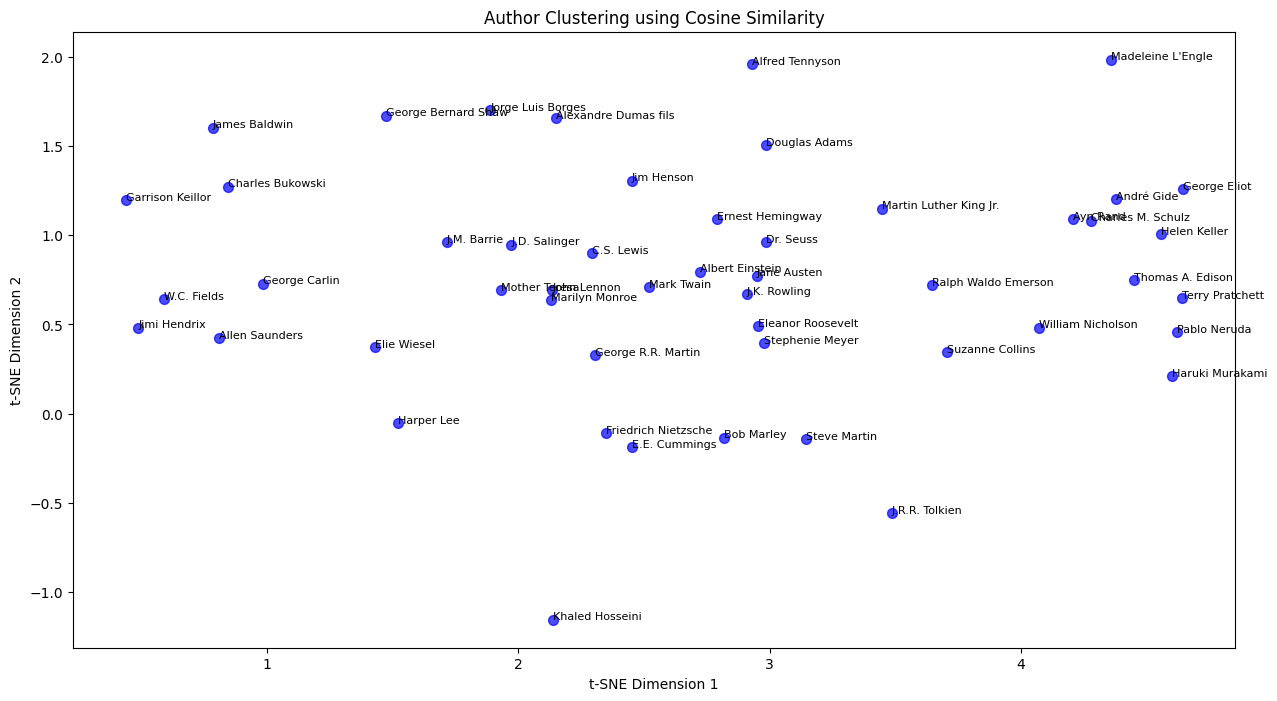

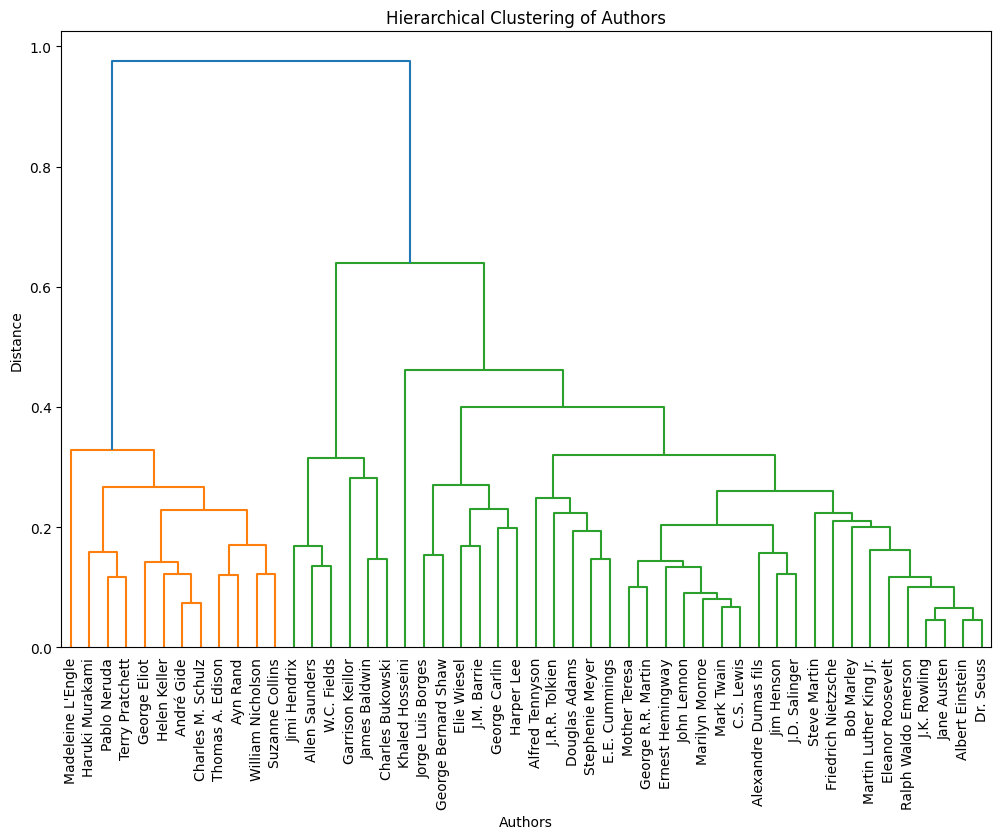

In [64]:
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
np.fill_diagonal(similarity_matrix, 1)
authors = [author for author in author_dictionary.keys()]

cosine_distance_matrix = 1 - similarity_matrix

tsne = TSNE(metric="precomputed", init="random", random_state=42)
reduced_data = tsne.fit_transform(cosine_distance_matrix)

plt.figure(figsize=(15, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50, alpha=0.7)
for i, author in enumerate(authors):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], author, fontsize=8)
plt.title("Author Clustering using Cosine Similarity")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.savefig("1.png")
plt.show()

linkage_matrix = linkage(squareform(cosine_distance_matrix), method="ward")
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=authors, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering of Authors")
plt.xlabel("Authors")
plt.ylabel("Distance")
plt.show()